In [23]:
from collections import defaultdict

class Graph():
    def __init__(self):
        """
        self.edges is a dict of all possible next nodes
        e.g. {'X': ['A', 'B', 'C', 'E'], ...}
        self.weights has all the weights between two nodes,
        with the two nodes as a tuple as the key
        e.g. {('X', 'A'): 7, ('X', 'B'): 2, ...}
        """
        self.edges = defaultdict(list)
        self.weights = {}
    
    def add_edge(self, from_node, to_node, weight):
        # Note: assumes edges are bi-directional
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.weights[(from_node, to_node)] = weight
        self.weights[(to_node, from_node)] = weight

In [24]:
graph = Graph()

# The Graph
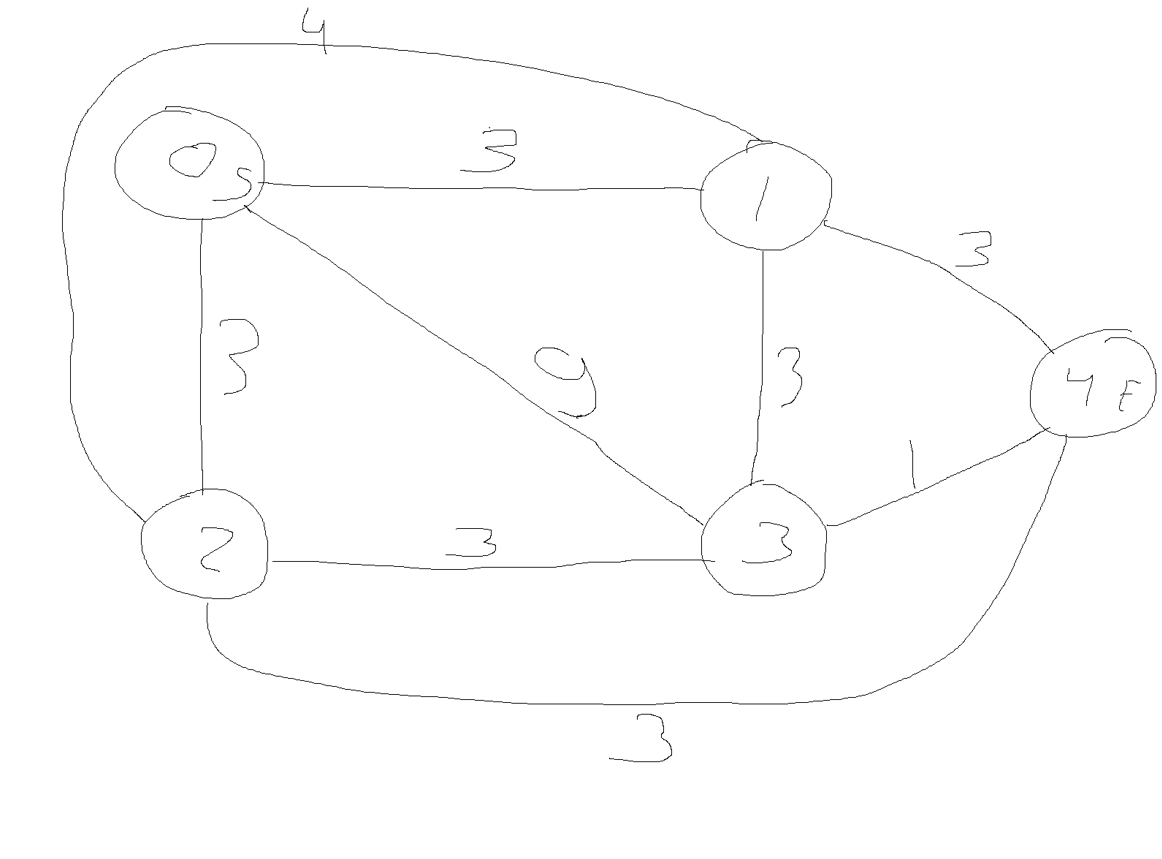

In [25]:
edges = [[0, 1, 3], [0, 2, 3], [0, 3, 9], [1, 2, 4], [1, 3, 3], [1, 4, 3], [2, 3, 3,], [2, 4, 3], [3, 4, 1]]

for edge in edges:
    graph.add_edge(*edge)

In [26]:
def dijsktra(graph, initial, end):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    shortest_paths = {initial: (None, 0)}
    current_node = initial
    visited = set()
    
    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
    
    # Work back through destinations in shortest path
    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    # Reverse path
    path = path[::-1]
    return path

In [27]:
dijsktra(graph, 0, 4)

[0, 1, 4]

# :(
If this was all what was needed, we would be done and this would be the result. But because there are waits, we need to do more.

In [28]:
graph = Graph()

edges = [[0, 4, 2], [0, 7, 8], [0, 9, 7], [0, 11, 7], [0, 22, 2], [0, 34, 3], [0, 35, 2], [0, 57, 8], [0, 71, 8], [0, 79, 8], [0, 83, 8], [0, 107, 7], [0, 116, 5], [0, 125, 6], [0, 126, 5], [0, 130, 9], [0, 131, 9], [0, 135, 7], [0, 153, 4], [0, 158, 7], [0, 180, 9], [0, 181, 7], [0, 228, 5], [0, 254, 7], [0, 257, 7], [0, 295, 7], [0, 297, 7], [0, 320, 8], [0, 323, 2], [0, 327, 2], [0, 333, 4], [0, 346, 8], [0, 349, 5], [0, 355, 4], [0, 367, 8], [0, 376, 7], [0, 378, 7], [0, 399, 4], [0, 401, 7], [0, 423, 5], [0, 429, 3], [0, 433, 8], [0, 434, 3], [0, 449, 4], [0, 466, 9], [0, 476, 7], [0, 482, 8], [0, 485, 4], [0, 498, 6], [1, 5, 8], [1, 6, 5], [1, 20, 9], [1, 41, 3], [1, 42, 5], [1, 50, 4], [1, 65, 2], [1, 83, 7], [1, 89, 7], [1, 126, 5], [1, 141, 9], [1, 142, 8], [1, 147, 2], [1, 164, 8], [1, 175, 2], [1, 181, 2], [1, 193, 6], [1, 201, 9], [1, 229, 4], [1, 230, 9], [1, 241, 3], [1, 247, 5], [1, 258, 5], [1, 265, 8], [1, 269, 9], [1, 270, 3], [1, 271, 3], [1, 284, 3], [1, 289, 9], [1, 309, 2], [1, 313, 2], [1, 314, 5], [1, 358, 4], [1, 382, 2], [1, 390, 9], [1, 412, 2], [1, 420, 6], [1, 441, 7], [1, 462, 6], [1, 465, 8], [1, 478, 3], [1, 493, 8], [1, 499, 3], [2, 18, 2], [2, 32, 8], [2, 61, 7], [2, 69, 3], [2, 70, 3], [2, 79, 3], [2, 80, 9], [2, 100, 7], [2, 110, 7], [2, 114, 5], [2, 116, 9], [2, 128, 2], [2, 132, 3], [2, 141, 8], [2, 157, 4], [2, 182, 3], [2, 185, 2], [2, 190, 7], [2, 191, 2], [2, 196, 4], [2, 202, 3], [2, 209, 3], [2, 222, 9], [2, 232, 3], [2, 244, 4], [2, 248, 6], [2, 275, 5], [2, 329, 3], [2, 374, 9], [2, 397, 8], [2, 400, 6], [2, 438, 8], [2, 450, 7], [2, 457, 2], [2, 458, 7], [2, 489, 3], [2, 496, 8], [3, 8, 3], [3, 11, 9], [3, 20, 5], [3, 49, 8], [3, 53, 3], [3, 55, 3], [3, 74, 2], [3, 89, 8], [3, 91, 6], [3, 97, 7], [3, 108, 6], [3, 109, 9], [3, 116, 3], [3, 121, 2], [3, 134, 2], [3, 135, 9], [3, 138, 5], [3, 144, 2], [3, 161, 8], [3, 179, 2], [3, 185, 8], [3, 230, 9], [3, 240, 4], [3, 241, 2], [3, 254, 4], [3, 258, 5], [3, 264, 7], [3, 280, 8], [3, 286, 8], [3, 291, 4], [3, 308, 9], [3, 311, 7], [3, 330, 7], [3, 347, 9], [3, 362, 4], [3, 366, 5], [3, 370, 6], [3, 383, 7], [3, 394, 4], [3, 398, 7], [3, 404, 6], [3, 415, 7], [3, 427, 7], [3, 434, 8], [3, 441, 9], [3, 445, 6], [3, 453, 4], [3, 485, 2], [3, 494, 5], [3, 497, 2], [4, 10, 2], [4, 57, 8], [4, 68, 4], [4, 71, 6], [4, 96, 3], [4, 133, 8], [4, 134, 6], [4, 188, 8], [4, 193, 8], [4, 217, 4], [4, 218, 2], [4, 231, 9], [4, 238, 5], [4, 268, 8], [4, 276, 7], [4, 328, 2], [4, 341, 6], [4, 357, 5], [4, 358, 8], [4, 363, 4], [4, 374, 5], [4, 378, 5], [4, 381, 9], [4, 403, 2], [4, 410, 6], [4, 419, 8], [4, 451, 3], [4, 461, 6], [4, 462, 3], [4, 474, 2], [4, 483, 6], [5, 9, 6], [5, 27, 4], [5, 31, 8], [5, 61, 9], [5, 72, 6], [5, 103, 3], [5, 121, 3], [5, 124, 8], [5, 147, 5], [5, 161, 6], [5, 175, 6], [5, 181, 9], [5, 192, 9], [5, 197, 4], [5, 204, 6], [5, 207, 7], [5, 210, 2], [5, 221, 4], [5, 242, 9], [5, 252, 5], [5, 259, 5], [5, 276, 8], [5, 281, 5], [5, 295, 4], [5, 312, 4], [5, 314, 8], [5, 321, 3], [5, 325, 6], [5, 355, 3], [5, 364, 5], [5, 366, 2], [5, 377, 7], [5, 390, 8], [5, 394, 8], [5, 437, 6], [5, 440, 5], [5, 453, 7], [5, 457, 6], [5, 462, 7], [5, 487, 4], [5, 488, 5], [5, 493, 3], [6, 17, 7], [6, 29, 2], [6, 36, 5], [6, 77, 7], [6, 105, 2], [6, 108, 3], [6, 123, 8], [6, 141, 2], [6, 148, 5], [6, 163, 2], [6, 170, 6], [6, 176, 3], [6, 180, 8], [6, 190, 2], [6, 200, 9], [6, 207, 7], [6, 218, 5], [6, 234, 3], [6, 237, 8], [6, 239, 9], [6, 264, 8], [6, 266, 7], [6, 281, 3], [6, 315, 9], [6, 321, 7], [6, 329, 2], [6, 336, 9], [6, 372, 7], [6, 382, 9], [6, 393, 7], [6, 397, 4], [6, 405, 6], [6, 482, 3], [6, 484, 6], [7, 11, 6], [7, 30, 6], [7, 45, 8], [7, 59, 5], [7, 68, 8], [7, 76, 6], [7, 106, 3], [7, 144, 4], [7, 151, 3], [7, 179, 2], [7, 206, 6], [7, 218, 7], [7, 221, 5], [7, 225, 2], [7, 229, 9], [7, 243, 3], [7, 245, 5], [7, 248, 3], [7, 262, 3], [7, 289, 4], [7, 291, 3], [7, 301, 3], [7, 323, 8], [7, 334, 5], [7, 338, 4], [7, 342, 3], [7, 345, 6], [7, 364, 4], [7, 366, 7], [7, 378, 6], [7, 387, 6], [7, 391, 4], [7, 392, 2], [7, 402, 8], [7, 415, 7], [7, 423, 4], [7, 424, 2], [7, 428, 4], [7, 430, 9], [7, 454, 7], [7, 455, 6], [7, 470, 3], [7, 495, 4], [8, 33, 4], [8, 45, 3], [8, 56, 2], [8, 57, 5], [8, 58, 6], [8, 78, 4], [8, 85, 2], [8, 100, 5], [8, 101, 5], [8, 126, 2], [8, 130, 3], [8, 142, 9], [8, 147, 6], [8, 166, 8], [8, 176, 7], [8, 179, 3], [8, 200, 5], [8, 209, 9], [8, 229, 4], [8, 233, 7], [8, 248, 9], [8, 261, 5], [8, 264, 5], [8, 283, 4], [8, 293, 9], [8, 299, 3], [8, 323, 3], [8, 327, 2], [8, 336, 9], [8, 357, 9], [8, 361, 5], [8, 362, 8], [8, 365, 5], [8, 370, 2], [8, 381, 2], [8, 395, 6], [8, 423, 4], [8, 445, 4], [8, 448, 8], [8, 463, 7], [8, 482, 5], [8, 489, 6], [8, 497, 6], [9, 11, 4], [9, 56, 5], [9, 100, 2], [9, 113, 2], [9, 116, 8], [9, 117, 3], [9, 148, 4], [9, 189, 9], [9, 208, 5], [9, 227, 8], [9, 231, 8], [9, 263, 3], [9, 275, 3], [9, 302, 8], [9, 328, 6], [9, 330, 4], [9, 334, 2], [9, 354, 8], [9, 355, 4], [9, 357, 9], [9, 380, 8], [9, 383, 4], [9, 400, 3], [9, 404, 2], [9, 477, 4], [9, 486, 6], [9, 491, 3], [10, 64, 9], [10, 84, 6], [10, 85, 5], [10, 97, 6], [10, 98, 9], [10, 103, 3], [10, 108, 4], [10, 121, 5], [10, 152, 3], [10, 153, 8], [10, 173, 5], [10, 190, 6], [10, 196, 7], [10, 209, 4], [10, 224, 2], [10, 246, 5], [10, 251, 6], [10, 261, 4], [10, 272, 3], [10, 273, 7], [10, 331, 9], [10, 333, 7], [10, 374, 8], [10, 377, 2], [10, 384, 3], [10, 395, 8], [10, 413, 9], [10, 420, 2], [10, 437, 9], [10, 484, 6], [11, 36, 6], [11, 45, 2], [11, 55, 7], [11, 57, 9], [11, 58, 3], [11, 99, 5], [11, 127, 3], [11, 161, 9], [11, 164, 8], [11, 177, 7], [11, 186, 8], [11, 200, 7], [11, 207, 9], [11, 213, 2], [11, 232, 5], [11, 236, 9], [11, 249, 4], [11, 263, 7], [11, 265, 3], [11, 287, 9], [11, 302, 2], [11, 308, 3], [11, 313, 5], [11, 317, 7], [11, 330, 7], [11, 338, 7], [11, 375, 2], [11, 389, 5], [11, 438, 7], [11, 441, 6], [11, 444, 9], [11, 448, 5], [11, 461, 6], [12, 25, 2], [12, 27, 9], [12, 46, 8], [12, 48, 5], [12, 56, 3], [12, 60, 2], [12, 74, 9], [12, 94, 4], [12, 105, 8], [12, 108, 9], [12, 110, 2], [12, 133, 9], [12, 142, 7], [12, 159, 6], [12, 199, 5], [12, 209, 5], [12, 268, 8], [12, 291, 4], [12, 311, 3], [12, 321, 6], [12, 322, 7], [12, 329, 7], [12, 333, 9], [12, 335, 9], [12, 361, 4], [12, 378, 2], [12, 380, 3], [12, 390, 9], [12, 394, 6], [12, 431, 9], [12, 437, 4], [12, 440, 6], [12, 467, 3], [12, 481, 2], [13, 32, 6], [13, 40, 9], [13, 42, 6], [13, 53, 6], [13, 59, 8], [13, 62, 5], [13, 74, 3], [13, 76, 2], [13, 82, 5], [13, 102, 4], [13, 107, 8], [13, 152, 2], [13, 159, 6], [13, 165, 9], [13, 184, 2], [13, 186, 3], [13, 218, 7], [13, 265, 7], [13, 268, 5], [13, 284, 6], [13, 295, 7], [13, 314, 9], [13, 336, 6], [13, 338, 7], [13, 413, 3], [13, 429, 3], [13, 430, 6], [13, 458, 4], [13, 470, 2], [13, 472, 5], [13, 477, 5], [13, 489, 5], [13, 499, 2], [14, 15, 2], [14, 28, 8], [14, 42, 7], [14, 56, 5], [14, 67, 7], [14, 78, 2], [14, 89, 8], [14, 93, 6], [14, 112, 7], [14, 122, 2], [14, 131, 4], [14, 135, 4], [14, 141, 7], [14, 193, 2], [14, 200, 8], [14, 201, 5], [14, 202, 9], [14, 204, 4], [14, 216, 5], [14, 221, 7], [14, 237, 3], [14, 245, 5], [14, 248, 4], [14, 252, 6], [14, 260, 7], [14, 269, 7], [14, 285, 3], [14, 304, 4], [14, 308, 4], [14, 327, 8], [14, 337, 7], [14, 345, 8], [14, 347, 2], [14, 351, 7], [14, 358, 2], [14, 362, 9], [14, 379, 8], [14, 380, 5], [14, 384, 8], [14, 414, 7], [14, 422, 4], [14, 465, 5], [14, 471, 2], [14, 479, 7], [14, 488, 3], [15, 17, 6], [15, 21, 6], [15, 37, 9], [15, 52, 3], [15, 69, 6], [15, 86, 5], [15, 104, 3], [15, 113, 6], [15, 115, 3], [15, 120, 7], [15, 131, 6], [15, 149, 4], [15, 150, 5], [15, 160, 8], [15, 168, 3], [15, 189, 3], [15, 209, 2], [15, 211, 7], [15, 225, 5], [15, 237, 3], [15, 246, 6], [15, 251, 3], [15, 255, 2], [15, 272, 6], [15, 273, 9], [15, 284, 8], [15, 289, 4], [15, 312, 8], [15, 322, 3], [15, 339, 4], [15, 341, 7], [15, 360, 6], [15, 366, 2], [15, 382, 2], [15, 389, 5], [15, 392, 8], [15, 402, 6], [15, 406, 4], [15, 407, 3], [15, 414, 6], [15, 436, 5], [15, 437, 9], [15, 439, 2], [15, 457, 2], [15, 461, 9], [15, 478, 7], [16, 54, 3], [16, 87, 8], [16, 98, 3], [16, 110, 2], [16, 114, 3], [16, 115, 3], [16, 122, 8], [16, 126, 6], [16, 131, 4], [16, 162, 3], [16, 163, 6], [16, 213, 6], [16, 219, 8], [16, 224, 8], [16, 247, 5], [16, 269, 4], [16, 272, 8], [16, 276, 8], [16, 312, 3], [16, 320, 9], [16, 333, 4], [16, 343, 5], [16, 350, 3], [16, 375, 4], [16, 380, 4], [16, 383, 2], [16, 395, 2], [16, 406, 6], [16, 419, 8], [16, 420, 8], [16, 451, 6], [16, 473, 2], [16, 476, 3], [16, 488, 6], [16, 495, 6], [16, 500, 9], [17, 30, 7], [17, 41, 9], [17, 85, 6], [17, 96, 9], [17, 107, 5], [17, 113, 4], [17, 120, 6], [17, 138, 3], [17, 150, 8], [17, 157, 9], [17, 160, 4], [17, 171, 5], [17, 216, 3], [17, 219, 3], [17, 223, 9], [17, 240, 9], [17, 242, 2], [17, 249, 4], [17, 257, 9], [17, 259, 2], [17, 286, 6], [17, 291, 9], [17, 301, 2], [17, 321, 4], [17, 336, 8], [17, 358, 4], [17, 364, 4], [17, 370, 2], [17, 375, 6], [17, 389, 2], [17, 401, 4], [17, 410, 4], [17, 419, 6], [17, 428, 6], [17, 445, 4], [17, 460, 9], [17, 469, 2], [17, 489, 7], [18, 24, 3], [18, 30, 4], [18, 32, 4], [18, 37, 3], [18, 38, 6], [18, 41, 4], [18, 60, 3], [18, 83, 5], [18, 90, 2], [18, 111, 4], [18, 120, 3], [18, 136, 6], [18, 137, 9], [18, 157, 5], [18, 159, 8], [18, 163, 3], [18, 192, 5], [18, 195, 4], [18, 199, 5], [18, 228, 6], [18, 231, 2], [18, 267, 7], [18, 284, 4], [18, 301, 4], [18, 313, 5], [18, 320, 9], [18, 327, 4], [18, 336, 9], [18, 348, 4], [18, 352, 8], [18, 354, 7], [18, 359, 6], [18, 410, 7], [18, 419, 8], [18, 424, 7], [18, 446, 7], [18, 456, 3], [18, 461, 9], [18, 467, 4], [18, 471, 2], [18, 480, 4], [18, 497, 7], [19, 32, 7], [19, 34, 8], [19, 48, 5], [19, 53, 5], [19, 67, 6], [19, 95, 6], [19, 110, 3], [19, 112, 2], [19, 154, 9], [19, 158, 4], [19, 164, 7], [19, 170, 8], [19, 178, 7], [19, 183, 9], [19, 184, 9], [19, 202, 3], [19, 241, 4], [19, 250, 6], [19, 280, 5], [19, 286, 3], [19, 289, 8], [19, 290, 4], [19, 305, 4], [19, 314, 3], [19, 323, 3], [19, 350, 7], [19, 356, 2], [19, 364, 7], [19, 367, 4], [19, 395, 9], [19, 401, 9], [19, 455, 7], [19, 461, 5], [19, 470, 4], [19, 474, 9], [19, 476, 6], [19, 478, 6], [19, 491, 6], [19, 497, 2], [20, 32, 8], [20, 40, 9], [20, 74, 4], [20, 85, 2], [20, 119, 6], [20, 128, 6], [20, 161, 7], [20, 166, 6], [20, 169, 7], [20, 201, 3], [20, 209, 6], [20, 247, 5], [20, 254, 8], [20, 268, 8], [20, 301, 2], [20, 319, 9], [20, 347, 3], [20, 372, 4], [20, 377, 2], [20, 387, 7], [20, 394, 2], [20, 416, 3], [20, 417, 3], [20, 428, 9], [20, 454, 3], [20, 476, 8], [20, 477, 7], [20, 479, 9], [20, 481, 7], [21, 22, 2], [21, 63, 7], [21, 79, 6], [21, 84, 4], [21, 93, 4], [21, 102, 3], [21, 103, 6], [21, 106, 3], [21, 109, 4], [21, 146, 6], [21, 152, 3], [21, 153, 3], [21, 170, 6], [21, 178, 4], [21, 182, 6], [21, 189, 9], [21, 194, 3], [21, 253, 4], [21, 270, 5], [21, 310, 7], [21, 314, 2], [21, 371, 9], [21, 399, 4], [21, 424, 4], [21, 452, 7], [21, 462, 5], [21, 467, 8], [21, 474, 7], [21, 484, 7], [21, 485, 9], [21, 489, 2], [21, 492, 5], [21, 494, 7], [22, 26, 6], [22, 43, 5], [22, 52, 8], [22, 58, 2], [22, 74, 7], [22, 86, 4], [22, 103, 7], [22, 106, 6], [22, 131, 5], [22, 142, 6], [22, 169, 8], [22, 182, 4], [22, 188, 3], [22, 207, 7], [22, 221, 6], [22, 230, 4], [22, 257, 4], [22, 266, 6], [22, 267, 5], [22, 286, 4], [22, 289, 3], [22, 328, 2], [22, 341, 5], [22, 347, 9], [22, 352, 2], [22, 359, 7], [22, 361, 2], [22, 363, 7], [22, 384, 6], [22, 388, 9], [22, 395, 5], [22, 402, 9], [22, 405, 3], [22, 407, 4], [22, 437, 4], [22, 448, 6], [22, 473, 4], [22, 476, 2], [22, 477, 4], [22, 481, 8], [22, 482, 5], [22, 493, 5], [23, 83, 8], [23, 85, 8], [23, 100, 4], [23, 171, 3], [23, 174, 2], [23, 181, 2], [23, 182, 9], [23, 195, 4], [23, 202, 6], [23, 205, 5], [23, 206, 4], [23, 209, 9], [23, 218, 4], [23, 245, 6], [23, 247, 3], [23, 249, 3], [23, 257, 3], [23, 272, 9], [23, 295, 6], [23, 296, 3], [23, 342, 7], [23, 348, 9], [23, 386, 6], [23, 390, 5], [23, 391, 8], [23, 421, 7], [23, 422, 8], [23, 423, 9], [23, 432, 8], [23, 441, 3], [23, 447, 5], [23, 451, 8], [23, 454, 8], [23, 464, 7], [23, 466, 4], [23, 489, 7], [24, 43, 2], [24, 68, 3], [24, 71, 3], [24, 76, 2], [24, 84, 2], [24, 96, 6], [24, 103, 2], [24, 104, 6], [24, 121, 7], [24, 148, 5], [24, 162, 5], [24, 181, 8], [24, 202, 8], [24, 204, 2], [24, 226, 8], [24, 235, 8], [24, 236, 4], [24, 248, 2], [24, 308, 6], [24, 310, 8], [24, 317, 2], [24, 326, 6], [24, 331, 8], [24, 344, 8], [24, 347, 7], [24, 355, 9], [24, 358, 9], [24, 371, 6], [24, 375, 8], [24, 402, 5], [24, 405, 2], [24, 414, 9], [24, 419, 8], [24, 451, 9], [24, 468, 4], [24, 491, 4], [25, 34, 8], [25, 53, 4], [25, 72, 7], [25, 80, 6], [25, 83, 6], [25, 92, 7], [25, 115, 4], [25, 123, 2], [25, 158, 7], [25, 162, 5], [25, 164, 3], [25, 174, 3], [25, 187, 3], [25, 189, 9], [25, 202, 5], [25, 212, 2], [25, 219, 4], [25, 243, 9], [25, 282, 2], [25, 289, 9], [25, 296, 5], [25, 304, 9], [25, 305, 3], [25, 334, 7], [25, 369, 4], [25, 385, 7], [25, 392, 8], [25, 408, 9], [25, 414, 3], [25, 417, 2], [25, 418, 5], [25, 419, 6], [25, 422, 2], [25, 424, 9], [25, 447, 3], [25, 456, 9], [25, 461, 5], [25, 481, 2], [25, 494, 2], [25, 496, 8], [26, 30, 3], [26, 43, 5], [26, 51, 3], [26, 73, 5], [26, 101, 6], [26, 127, 2], [26, 143, 6], [26, 145, 9], [26, 162, 9], [26, 164, 9], [26, 173, 6], [26, 174, 2], [26, 179, 2], [26, 190, 7], [26, 199, 3], [26, 220, 7], [26, 225, 6], [26, 237, 6], [26, 246, 9], [26, 260, 8], [26, 264, 6], [26, 275, 6], [26, 281, 7], [26, 287, 2], [26, 290, 4], [26, 298, 4], [26, 302, 8], [26, 315, 9], [26, 322, 8], [26, 325, 6], [26, 370, 4], [26, 377, 6], [26, 388, 9], [26, 402, 5], [26, 405, 3], [26, 421, 3], [26, 446, 8], [26, 452, 7], [26, 476, 3], [27, 65, 2], [27, 73, 8], [27, 75, 9], [27, 92, 5], [27, 95, 4], [27, 108, 9], [27, 112, 6], [27, 119, 2], [27, 126, 9], [27, 163, 7], [27, 167, 4], [27, 207, 6], [27, 218, 6], [27, 223, 6], [27, 225, 6], [27, 250, 5], [27, 251, 2], [27, 261, 9], [27, 300, 8], [27, 308, 8], [27, 309, 6], [27, 311, 8], [27, 316, 2], [27, 334, 6], [27, 336, 2], [27, 344, 6], [27, 364, 4], [27, 365, 6], [27, 375, 3], [27, 391, 6], [27, 402, 3], [27, 411, 3], [27, 422, 3], [27, 425, 3], [27, 427, 3], [27, 430, 2], [27, 441, 9], [27, 449, 8], [27, 452, 4], [27, 453, 9], [28, 50, 2], [28, 54, 2], [28, 76, 9], [28, 79, 5], [28, 132, 2], [28, 134, 6], [28, 135, 8], [28, 152, 2], [28, 160, 2], [28, 197, 5], [28, 210, 9], [28, 215, 4], [28, 224, 7], [28, 232, 5], [28, 235, 5], [28, 238, 8], [28, 267, 9], [28, 271, 2], [28, 299, 3], [28, 313, 9], [28, 326, 6], [28, 336, 3], [28, 350, 5], [28, 396, 3], [28, 409, 7], [28, 411, 3], [28, 422, 7], [28, 438, 5], [28, 481, 3], [29, 43, 9], [29, 63, 6], [29, 65, 8], [29, 67, 8], [29, 97, 8], [29, 102, 3], [29, 103, 7], [29, 108, 3], [29, 121, 4], [29, 129, 5], [29, 134, 3], [29, 136, 2], [29, 148, 3], [29, 177, 2], [29, 189, 2], [29, 190, 9], [29, 192, 4], [29, 196, 5], [29, 206, 2], [29, 210, 9], [29, 215, 3], [29, 255, 3], [29, 263, 2], [29, 265, 3], [29, 281, 2], [29, 314, 4], [29, 319, 9], [29, 322, 3], [29, 330, 8], [29, 337, 9], [29, 341, 2], [29, 346, 2], [29, 365, 6], [29, 371, 5], [29, 382, 6], [29, 388, 7], [29, 394, 4], [29, 405, 3], [29, 415, 5], [29, 418, 5], [29, 424, 9], [29, 427, 7], [29, 431, 3], [29, 458, 9], [29, 468, 8], [29, 473, 2], [30, 57, 6], [30, 86, 9], [30, 106, 8], [30, 112, 3], [30, 170, 2], [30, 183, 2], [30, 185, 6], [30, 190, 3], [30, 198, 3], [30, 224, 4], [30, 246, 7], [30, 263, 2], [30, 282, 8], [30, 293, 9], [30, 307, 6], [30, 324, 9], [30, 337, 6], [30, 341, 4], [30, 344, 5], [30, 346, 5], [30, 347, 4], [30, 357, 3], [30, 369, 3], [30, 377, 3], [30, 378, 4], [30, 392, 4], [30, 428, 9], [30, 434, 8], [30, 449, 4], [30, 453, 5], [30, 470, 7], [30, 487, 3], [30, 500, 6], [31, 44, 4], [31, 65, 5], [31, 66, 2], [31, 82, 8], [31, 85, 9], [31, 130, 3], [31, 137, 5], [31, 140, 8], [31, 212, 3], [31, 214, 4], [31, 227, 7], [31, 239, 3], [31, 270, 9], [31, 274, 4], [31, 290, 5], [31, 300, 9], [31, 310, 8], [31, 311, 3], [31, 318, 3], [31, 326, 7], [31, 347, 9], [31, 349, 5], [31, 388, 6], [31, 454, 5], [31, 470, 4], [31, 489, 9], [31, 495, 2], [32, 53, 6], [32, 55, 5], [32, 68, 3], [32, 75, 5], [32, 115, 7], [32, 124, 6], [32, 141, 2], [32, 148, 2], [32, 164, 7], [32, 170, 9], [32, 188, 3], [32, 194, 4], [32, 203, 4], [32, 216, 2], [32, 229, 9], [32, 230, 8], [32, 232, 6], [32, 243, 3], [32, 258, 5], [32, 265, 7], [32, 271, 7], [32, 279, 7], [32, 297, 7], [32, 308, 4], [32, 324, 6], [32, 336, 5], [32, 347, 2], [32, 357, 3], [32, 373, 2], [32, 375, 9], [32, 379, 6], [32, 393, 7], [32, 396, 6], [32, 416, 6], [32, 425, 3], [32, 465, 5], [33, 52, 3], [33, 56, 4], [33, 63, 4], [33, 72, 7], [33, 93, 5], [33, 121, 6], [33, 140, 4], [33, 160, 8], [33, 168, 7], [33, 174, 2], [33, 195, 3], [33, 202, 4], [33, 204, 5], [33, 218, 7], [33, 235, 9], [33, 251, 4], [33, 261, 3], [33, 273, 6], [33, 295, 7], [33, 307, 7], [33, 314, 2], [33, 318, 8], [33, 337, 3], [33, 354, 8], [33, 371, 3], [33, 400, 4], [33, 415, 9], [33, 416, 8], [33, 428, 3], [33, 434, 9], [33, 454, 4], [33, 468, 5], [33, 481, 3], [33, 483, 2], [33, 493, 4], [34, 46, 2], [34, 47, 3], [34, 58, 8], [34, 78, 9], [34, 85, 8], [34, 87, 7], [34, 107, 2], [34, 108, 6], [34, 139, 8], [34, 148, 3], [34, 167, 6], [34, 176, 7], [34, 194, 3], [34, 197, 6], [34, 199, 3], [34, 208, 8], [34, 214, 9], [34, 234, 4], [34, 243, 2], [34, 257, 2], [34, 269, 8], [34, 279, 9], [34, 338, 5], [34, 345, 5], [34, 350, 6], [34, 385, 6], [34, 390, 2], [34, 391, 3], [34, 393, 8], [34, 406, 5], [34, 419, 9], [34, 426, 8], [34, 442, 6], [34, 443, 3], [34, 474, 5], [34, 489, 7], [34, 491, 4], [35, 55, 2], [35, 73, 8], [35, 78, 6], [35, 89, 2], [35, 116, 7], [35, 150, 4], [35, 153, 2], [35, 154, 4], [35, 164, 2], [35, 168, 5], [35, 174, 4], [35, 192, 7], [35, 214, 3], [35, 235, 3], [35, 257, 6], [35, 258, 8], [35, 259, 2], [35, 293, 5], [35, 297, 7], [35, 325, 9], [35, 331, 6], [35, 345, 5], [35, 358, 3], [35, 378, 6], [35, 397, 9], [35, 400, 6], [35, 401, 2], [35, 405, 5], [35, 408, 9], [35, 413, 9], [35, 415, 9], [35, 441, 4], [35, 457, 6], [35, 467, 6], [35, 482, 2], [35, 493, 7], [36, 77, 4], [36, 84, 6], [36, 101, 3], [36, 126, 5], [36, 136, 6], [36, 140, 3], [36, 150, 3], [36, 151, 2], [36, 157, 7], [36, 168, 3], [36, 199, 4], [36, 214, 5], [36, 267, 9], [36, 290, 3], [36, 312, 8], [36, 345, 7], [36, 359, 4], [36, 389, 7], [36, 391, 3], [36, 397, 9], [36, 414, 7], [36, 418, 3], [36, 430, 6], [36, 476, 2], [36, 479, 9], [36, 482, 5], [36, 487, 4], [36, 498, 2], [37, 41, 7], [37, 61, 7], [37, 86, 6], [37, 91, 6], [37, 116, 9], [37, 146, 3], [37, 151, 9], [37, 152, 9], [37, 186, 3], [37, 193, 4], [37, 206, 9], [37, 226, 6], [37, 236, 4], [37, 238, 8], [37, 241, 9], [37, 242, 7], [37, 259, 3], [37, 264, 9], [37, 267, 8], [37, 284, 8], [37, 300, 9], [37, 313, 6], [37, 316, 2], [37, 318, 7], [37, 326, 2], [37, 336, 4], [37, 402, 4], [37, 413, 5], [37, 422, 8], [37, 444, 3], [37, 445, 2], [37, 464, 8], [37, 484, 9], [37, 490, 6], [37, 495, 9], [38, 51, 5], [38, 67, 6], [38, 71, 2], [38, 73, 7], [38, 79, 8], [38, 82, 5], [38, 88, 9], [38, 114, 3], [38, 116, 3], [38, 122, 8], [38, 137, 7], [38, 140, 6], [38, 143, 5], [38, 146, 9], [38, 149, 2], [38, 154, 3], [38, 167, 5], [38, 177, 7], [38, 183, 7], [38, 186, 4], [38, 205, 8], [38, 215, 4], [38, 219, 5], [38, 252, 2], [38, 259, 2], [38, 299, 9], [38, 318, 9], [38, 372, 5], [38, 404, 3], [38, 412, 2], [38, 422, 3], [38, 448, 9], [38, 460, 9], [38, 463, 5], [38, 486, 3], [38, 489, 9], [39, 43, 8], [39, 48, 6], [39, 50, 8], [39, 58, 8], [39, 67, 7], [39, 81, 5], [39, 102, 5], [39, 105, 7], [39, 107, 2], [39, 116, 4], [39, 138, 7], [39, 146, 4], [39, 148, 3], [39, 157, 5], [39, 162, 2], [39, 169, 8], [39, 190, 8], [39, 196, 4], [39, 204, 6], [39, 213, 9], [39, 238, 5], [39, 252, 4], [39, 265, 8], [39, 275, 7], [39, 278, 9], [39, 287, 9], [39, 291, 3], [39, 293, 7], [39, 299, 9], [39, 303, 8], [39, 317, 4], [39, 325, 9], [39, 327, 8], [39, 329, 3], [39, 336, 4], [39, 347, 2], [39, 357, 6], [39, 375, 5], [39, 387, 7], [39, 390, 5], [39, 398, 6], [39, 400, 4], [39, 410, 7], [39, 421, 2], [39, 431, 6], [39, 444, 5], [39, 467, 2], [39, 479, 7], [39, 480, 7], [40, 55, 4], [40, 62, 2], [40, 73, 8], [40, 79, 5], [40, 88, 9], [40, 98, 9], [40, 117, 5], [40, 133, 5], [40, 134, 4], [40, 143, 4], [40, 148, 6], [40, 192, 6], [40, 196, 9], [40, 198, 5], [40, 200, 5], [40, 204, 6], [40, 212, 3], [40, 223, 8], [40, 258, 8], [40, 268, 2], [40, 275, 8], [40, 287, 9], [40, 304, 5], [40, 307, 6], [40, 311, 2], [40, 318, 2], [40, 357, 3], [40, 363, 8], [40, 376, 2], [40, 391, 2], [40, 406, 6], [40, 422, 7], [40, 426, 9], [40, 431, 4], [40, 433, 9], [40, 434, 6], [40, 449, 6], [40, 466, 9], [40, 495, 5], [41, 42, 6], [41, 51, 3], [41, 54, 6], [41, 58, 9], [41, 68, 8], [41, 70, 9], [41, 72, 5], [41, 76, 4], [41, 104, 7], [41, 118, 2], [41, 134, 3], [41, 162, 2], [41, 165, 6], [41, 169, 3], [41, 172, 5], [41, 181, 7], [41, 208, 3], [41, 221, 4], [41, 237, 9], [41, 240, 7], [41, 251, 6], [41, 279, 9], [41, 287, 4], [41, 292, 3], [41, 308, 8], [41, 333, 2], [41, 335, 5], [41, 339, 3], [41, 342, 7], [41, 348, 4], [41, 355, 8], [41, 360, 7], [41, 364, 5], [41, 378, 3], [41, 389, 2], [41, 393, 8], [41, 420, 5], [41, 424, 9], [41, 441, 8], [41, 454, 7], [41, 462, 7], [41, 465, 2], [41, 484, 6], [41, 488, 8], [42, 53, 5], [42, 56, 4], [42, 59, 7], [42, 79, 2], [42, 82, 3], [42, 93, 9], [42, 95, 9], [42, 98, 4], [42, 113, 3], [42, 138, 3], [42, 140, 3], [42, 148, 5], [42, 154, 8], [42, 156, 9], [42, 157, 8], [42, 167, 4], [42, 205, 4], [42, 211, 9], [42, 212, 9], [42, 216, 9], [42, 229, 3], [42, 255, 3], [42, 271, 7], [42, 275, 7], [42, 287, 4], [42, 289, 5], [42, 300, 7], [42, 318, 3], [42, 333, 8], [42, 339, 3], [42, 392, 6], [42, 414, 2], [42, 424, 7], [42, 444, 5], [42, 445, 5], [42, 456, 4], [42, 467, 2], [42, 474, 6], [42, 486, 9], [42, 488, 6], [43, 46, 3], [43, 57, 9], [43, 78, 3], [43, 85, 5], [43, 93, 2], [43, 113, 7], [43, 118, 8], [43, 125, 5], [43, 153, 7], [43, 168, 6], [43, 173, 9], [43, 179, 5], [43, 181, 8], [43, 182, 8], [43, 187, 3], [43, 198, 3], [43, 205, 4], [43, 214, 6], [43, 239, 8], [43, 242, 8], [43, 244, 8], [43, 245, 8], [43, 256, 6], [43, 300, 3], [43, 308, 4], [43, 335, 2], [43, 338, 7], [43, 343, 2], [43, 352, 9], [43, 361, 2], [43, 375, 4], [43, 384, 7], [43, 391, 7], [43, 395, 8], [43, 400, 7], [43, 404, 5], [43, 430, 8], [43, 451, 2], [43, 473, 2], [44, 51, 4], [44, 56, 7], [44, 88, 6], [44, 93, 2], [44, 102, 7], [44, 108, 2], [44, 126, 6], [44, 129, 3], [44, 151, 7], [44, 177, 2], [44, 190, 9], [44, 200, 7], [44, 226, 2], [44, 245, 5], [44, 252, 9], [44, 253, 7], [44, 267, 7], [44, 270, 8], [44, 295, 4], [44, 310, 8], [44, 331, 3], [44, 379, 3], [44, 381, 9], [44, 414, 6], [44, 464, 7], [44, 484, 5], [44, 486, 3], [44, 488, 9], [45, 55, 7], [45, 63, 5], [45, 89, 9], [45, 125, 2], [45, 135, 8], [45, 141, 4], [45, 153, 7], [45, 182, 7], [45, 237, 6], [45, 239, 3], [45, 256, 3], [45, 258, 8], [45, 282, 3], [45, 283, 3], [45, 284, 4], [45, 285, 8], [45, 302, 7], [45, 316, 4], [45, 334, 5], [45, 335, 5], [45, 337, 5], [45, 360, 3], [45, 364, 6], [45, 395, 5], [45, 422, 7], [45, 431, 5], [45, 433, 3], [45, 439, 8], [45, 441, 4], [45, 449, 9], [45, 451, 8], [45, 471, 2], [45, 494, 8], [45, 500, 5], [46, 47, 6], [46, 76, 6], [46, 80, 9], [46, 81, 2], [46, 86, 4], [46, 104, 4], [46, 110, 9], [46, 137, 4], [46, 148, 8], [46, 154, 5], [46, 155, 3], [46, 176, 5], [46, 184, 8], [46, 194, 9], [46, 199, 3], [46, 213, 9], [46, 220, 4], [46, 235, 5], [46, 246, 3], [46, 268, 3], [46, 286, 4], [46, 287, 5], [46, 290, 2], [46, 291, 2], [46, 295, 4], [46, 306, 5], [46, 372, 8], [46, 373, 2], [46, 390, 4], [46, 400, 7], [46, 404, 9], [46, 409, 4], [46, 411, 8], [46, 424, 6], [46, 431, 5], [46, 441, 8], [46, 467, 9], [46, 468, 6], [46, 486, 4], [47, 62, 4], [47, 68, 4], [47, 74, 4], [47, 76, 3], [47, 107, 2], [47, 113, 9], [47, 125, 9], [47, 153, 9], [47, 163, 3], [47, 168, 9], [47, 178, 5], [47, 203, 2], [47, 213, 7], [47, 214, 9], [47, 223, 5], [47, 226, 3], [47, 228, 2], [47, 231, 8], [47, 246, 7], [47, 259, 8], [47, 291, 8], [47, 313, 2], [47, 316, 6], [47, 349, 4], [47, 413, 3], [47, 422, 4], [47, 441, 4], [47, 457, 9], [47, 466, 8], [47, 499, 9], [48, 51, 5], [48, 53, 3], [48, 58, 6], [48, 85, 4], [48, 102, 2], [48, 114, 3], [48, 115, 4], [48, 116, 5], [48, 125, 9], [48, 136, 6], [48, 143, 2], [48, 167, 6], [48, 168, 3], [48, 178, 5], [48, 197, 4], [48, 216, 5], [48, 217, 7], [48, 231, 6], [48, 247, 9], [48, 270, 6], [48, 281, 2], [48, 290, 3], [48, 297, 3], [48, 304, 4], [48, 328, 7], [48, 332, 4], [48, 336, 3], [48, 376, 2], [48, 382, 6], [48, 397, 8], [48, 399, 5], [48, 413, 7], [48, 423, 7], [48, 444, 9], [48, 460, 6], [48, 471, 8], [48, 482, 4], [48, 489, 8], [48, 497, 4], [49, 59, 5], [49, 83, 9], [49, 85, 4], [49, 100, 6], [49, 105, 9], [49, 109, 7], [49, 111, 7], [49, 114, 7], [49, 121, 7], [49, 122, 5], [49, 130, 3], [49, 136, 2], [49, 139, 6], [49, 148, 7], [49, 155, 7], [49, 163, 4], [49, 166, 8], [49, 184, 7], [49, 188, 3], [49, 200, 2], [49, 205, 9], [49, 218, 3], [49, 251, 9], [49, 254, 6], [49, 255, 4], [49, 267, 9], [49, 282, 6], [49, 290, 2], [49, 315, 6], [49, 316, 2], [49, 318, 8], [49, 321, 6], [49, 344, 8], [49, 355, 5], [49, 358, 5], [49, 366, 3], [49, 370, 4], [49, 375, 9], [49, 380, 9], [49, 382, 2], [49, 388, 2], [49, 403, 6], [49, 438, 3], [49, 442, 2], [49, 456, 9], [49, 457, 7], [49, 486, 3], [49, 494, 8], [50, 66, 7], [50, 69, 2], [50, 72, 4], [50, 78, 6], [50, 79, 9], [50, 106, 8], [50, 123, 5], [50, 127, 5], [50, 144, 3], [50, 157, 4], [50, 163, 3], [50, 197, 3], [50, 207, 5], [50, 214, 4], [50, 216, 9], [50, 222, 4], [50, 223, 8], [50, 228, 2], [50, 249, 8], [50, 274, 7], [50, 279, 6], [50, 280, 7], [50, 290, 3], [50, 295, 4], [50, 304, 6], [50, 324, 3], [50, 329, 6], [50, 330, 7], [50, 333, 4], [50, 336, 5], [50, 362, 2], [50, 370, 9], [50, 384, 5], [50, 404, 6], [50, 424, 3], [50, 429, 3], [50, 435, 9], [50, 464, 3], [50, 473, 9], [50, 475, 6], [50, 484, 9], [51, 81, 3], [51, 89, 2], [51, 105, 3], [51, 115, 3], [51, 116, 9], [51, 135, 6], [51, 151, 4], [51, 153, 6], [51, 161, 2], [51, 168, 8], [51, 177, 9], [51, 199, 4], [51, 208, 5], [51, 219, 4], [51, 225, 8], [51, 241, 4], [51, 242, 9], [51, 256, 8], [51, 270, 7], [51, 273, 4], [51, 292, 5], [51, 307, 4], [51, 318, 6], [51, 326, 4], [51, 329, 9], [51, 353, 9], [51, 364, 6], [51, 369, 2], [51, 387, 6], [51, 434, 6], [52, 56, 9], [52, 61, 7], [52, 65, 6], [52, 80, 4], [52, 83, 4], [52, 87, 2], [52, 96, 4], [52, 109, 9], [52, 111, 2], [52, 115, 7], [52, 133, 4], [52, 138, 6], [52, 154, 3], [52, 166, 2], [52, 168, 5], [52, 169, 3], [52, 172, 6], [52, 180, 9], [52, 192, 4], [52, 202, 3], [52, 208, 3], [52, 212, 9], [52, 226, 5], [52, 242, 5], [52, 245, 7], [52, 259, 8], [52, 262, 6], [52, 280, 2], [52, 282, 5], [52, 284, 3], [52, 291, 8], [52, 293, 4], [52, 306, 3], [52, 328, 7], [52, 339, 8], [52, 350, 7], [52, 374, 2], [52, 376, 8], [52, 396, 6], [52, 421, 5], [52, 431, 9], [52, 445, 4], [52, 474, 9], [52, 477, 6], [52, 480, 6], [52, 485, 9], [52, 489, 6], [53, 58, 7], [53, 67, 7], [53, 76, 7], [53, 79, 8], [53, 88, 9], [53, 108, 8], [53, 109, 2], [53, 129, 5], [53, 154, 2], [53, 155, 8], [53, 170, 9], [53, 193, 3], [53, 223, 9], [53, 230, 8], [53, 247, 3], [53, 259, 5], [53, 269, 8], [53, 276, 7], [53, 287, 4], [53, 299, 5], [53, 365, 6], [53, 388, 6], [53, 390, 4], [53, 400, 9], [53, 417, 5], [53, 435, 4], [53, 439, 6], [53, 446, 3], [53, 448, 6], [53, 475, 2], [53, 476, 5], [53, 477, 2], [54, 79, 8], [54, 118, 2], [54, 145, 4], [54, 148, 7], [54, 181, 7], [54, 186, 8], [54, 197, 3], [54, 209, 3], [54, 222, 8], [54, 245, 4], [54, 246, 4], [54, 260, 9], [54, 266, 5], [54, 276, 6], [54, 290, 2], [54, 300, 9], [54, 325, 9], [54, 336, 8], [54, 337, 8], [54, 354, 6], [54, 362, 9], [54, 369, 2], [54, 370, 5], [54, 401, 3], [54, 403, 5], [54, 415, 2], [54, 430, 5], [54, 447, 8], [54, 451, 9], [54, 459, 2], [54, 481, 5], [54, 496, 8], [55, 92, 2], [55, 108, 6], [55, 112, 6], [55, 113, 6], [55, 117, 3], [55, 126, 4], [55, 134, 3], [55, 138, 5], [55, 146, 8], [55, 149, 4], [55, 172, 2], [55, 176, 8], [55, 178, 7], [55, 179, 9], [55, 181, 8], [55, 183, 4], [55, 205, 6], [55, 217, 8], [55, 221, 5], [55, 237, 8], [55, 249, 6], [55, 252, 9], [55, 290, 4], [55, 354, 3], [55, 381, 9], [55, 383, 9], [55, 384, 3], [55, 411, 6], [55, 439, 8], [55, 442, 2], [55, 452, 7], [55, 458, 5], [55, 479, 6], [55, 493, 6], [55, 499, 8], [56, 63, 5], [56, 67, 9], [56, 80, 2], [56, 100, 2], [56, 111, 7], [56, 114, 5], [56, 118, 5], [56, 128, 6], [56, 150, 7], [56, 155, 2], [56, 168, 4], [56, 175, 4], [56, 181, 4], [56, 195, 8], [56, 218, 7], [56, 220, 7], [56, 229, 6], [56, 235, 2], [56, 242, 6], [56, 276, 8], [56, 278, 7], [56, 286, 9], [56, 291, 9], [56, 295, 6], [56, 301, 8], [56, 303, 8], [56, 311, 7], [56, 323, 5], [56, 328, 8], [56, 329, 8], [56, 345, 3], [56, 362, 4], [56, 372, 2], [56, 389, 6], [56, 411, 2], [56, 435, 7], [56, 441, 8], [56, 445, 7], [56, 447, 3], [56, 449, 9], [56, 451, 6], [56, 454, 2], [56, 455, 9], [56, 470, 4], [56, 473, 2], [56, 481, 5], [56, 483, 2], [56, 486, 2], [56, 488, 3], [56, 498, 3], [57, 66, 8], [57, 85, 7], [57, 129, 2], [57, 147, 7], [57, 149, 4], [57, 166, 3], [57, 176, 4], [57, 196, 6], [57, 200, 9], [57, 212, 2], [57, 237, 3], [57, 252, 3], [57, 271, 3], [57, 285, 5], [57, 295, 2], [57, 301, 7], [57, 316, 8], [57, 317, 8], [57, 350, 9], [57, 354, 2], [57, 387, 4], [57, 399, 7], [57, 404, 8], [57, 407, 9], [57, 415, 4], [57, 419, 9], [57, 434, 4], [57, 442, 2], [57, 448, 3], [57, 458, 4], [57, 481, 8], [57, 482, 9], [57, 485, 8], [57, 492, 4], [58, 68, 5], [58, 87, 3], [58, 114, 5], [58, 116, 7], [58, 124, 9], [58, 152, 8], [58, 182, 8], [58, 205, 6], [58, 208, 4], [58, 244, 8], [58, 251, 2], [58, 252, 6], [58, 262, 6], [58, 264, 7], [58, 265, 2], [58, 282, 3], [58, 285, 5], [58, 298, 4], [58, 308, 4], [58, 324, 3], [58, 327, 4], [58, 332, 7], [58, 334, 9], [58, 342, 4], [58, 362, 5], [58, 364, 9], [58, 369, 5], [58, 393, 9], [58, 417, 5], [58, 443, 4], [58, 448, 7], [59, 69, 2], [59, 78, 9], [59, 89, 7], [59, 98, 7], [59, 111, 6], [59, 114, 4], [59, 120, 6], [59, 191, 9], [59, 194, 6], [59, 217, 9], [59, 225, 4], [59, 246, 8], [59, 253, 6], [59, 255, 3], [59, 267, 4], [59, 289, 3], [59, 305, 2], [59, 308, 4], [59, 310, 9], [59, 319, 9], [59, 321, 4], [59, 329, 8], [59, 378, 9], [59, 381, 7], [59, 403, 5], [59, 412, 9], [59, 414, 3], [59, 434, 2], [59, 440, 8], [59, 455, 3], [59, 471, 7], [59, 473, 8], [59, 477, 5], [59, 482, 9], [59, 483, 2], [59, 484, 6], [59, 499, 6], [60, 64, 7], [60, 70, 7], [60, 101, 9], [60, 119, 8], [60, 122, 4], [60, 138, 4], [60, 146, 3], [60, 156, 7], [60, 160, 4], [60, 173, 7], [60, 176, 3], [60, 200, 6], [60, 203, 5], [60, 226, 6], [60, 241, 8], [60, 242, 4], [60, 246, 4], [60, 261, 9], [60, 270, 4], [60, 273, 8], [60, 284, 4], [60, 296, 3], [60, 300, 7], [60, 313, 5], [60, 315, 3], [60, 335, 4], [60, 337, 6], [60, 351, 8], [60, 356, 9], [60, 357, 7], [60, 368, 2], [60, 376, 7], [60, 381, 8], [60, 382, 7], [60, 397, 5], [60, 400, 2], [60, 409, 6], [60, 411, 4], [60, 415, 9], [60, 471, 7], [60, 474, 2], [60, 480, 7], [60, 498, 5], [61, 65, 9], [61, 88, 7], [61, 103, 6], [61, 115, 6], [61, 121, 5], [61, 135, 3], [61, 145, 2], [61, 158, 3], [61, 190, 3], [61, 211, 7], [61, 247, 9], [61, 249, 4], [61, 260, 3], [61, 289, 2], [61, 311, 9], [61, 336, 4], [61, 340, 4], [61, 344, 7], [61, 359, 3], [61, 364, 2], [61, 378, 8], [61, 388, 5], [61, 390, 3], [61, 404, 6], [61, 413, 5], [61, 415, 6], [61, 433, 9], [61, 444, 7], [61, 445, 8], [61, 454, 2], [61, 465, 6], [61, 492, 5], [61, 494, 5], [62, 64, 2], [62, 73, 6], [62, 78, 9], [62, 79, 4], [62, 100, 3], [62, 108, 6], [62, 112, 5], [62, 140, 7], [62, 141, 7], [62, 144, 4], [62, 145, 7], [62, 155, 2], [62, 208, 3], [62, 231, 9], [62, 233, 9], [62, 267, 2], [62, 274, 3], [62, 281, 2], [62, 286, 7], [62, 287, 9], [62, 288, 7], [62, 300, 7], [62, 317, 8], [62, 332, 5], [62, 352, 2], [62, 371, 9], [62, 404, 2], [62, 410, 3], [62, 412, 3], [62, 417, 2], [62, 427, 5], [62, 431, 3], [62, 465, 4], [62, 467, 6], [62, 489, 8], [63, 84, 6], [63, 94, 3], [63, 129, 2], [63, 141, 8], [63, 155, 2], [63, 156, 3], [63, 160, 8], [63, 161, 7], [63, 179, 6], [63, 184, 4], [63, 196, 4], [63, 201, 8], [63, 217, 4], [63, 221, 6], [63, 224, 4], [63, 228, 2], [63, 239, 8], [63, 264, 9], [63, 268, 3], [63, 294, 8], [63, 305, 3], [63, 309, 4], [63, 310, 8], [63, 327, 3], [63, 328, 4], [63, 334, 4], [63, 336, 9], [63, 337, 3], [63, 348, 7], [63, 354, 9], [63, 357, 6], [63, 369, 8], [63, 377, 2], [63, 387, 3], [63, 388, 2], [63, 423, 2], [63, 454, 8], [63, 455, 7], [63, 457, 8], [63, 462, 9], [63, 471, 4], [63, 487, 2], [64, 72, 7], [64, 75, 9], [64, 77, 6], [64, 83, 5], [64, 86, 9], [64, 111, 2], [64, 117, 5], [64, 128, 2], [64, 152, 2], [64, 162, 3], [64, 170, 2], [64, 177, 8], [64, 212, 6], [64, 213, 9], [64, 214, 6], [64, 232, 7], [64, 262, 3], [64, 268, 3], [64, 276, 7], [64, 286, 3], [64, 290, 3], [64, 293, 3], [64, 294, 2], [64, 339, 9], [64, 347, 7], [64, 365, 6], [64, 380, 4], [64, 386, 6], [64, 388, 7], [64, 413, 3], [64, 426, 5], [64, 429, 5], [64, 438, 6], [64, 446, 8], [64, 452, 5], [64, 492, 6], [65, 66, 7], [65, 78, 4], [65, 84, 4], [65, 87, 8], [65, 89, 8], [65, 111, 8], [65, 125, 2], [65, 150, 2], [65, 160, 3], [65, 174, 2], [65, 202, 8], [65, 207, 9], [65, 208, 6], [65, 221, 5], [65, 230, 5], [65, 234, 7], [65, 247, 3], [65, 248, 9], [65, 251, 9], [65, 254, 7], [65, 267, 8], [65, 271, 7], [65, 285, 6], [65, 302, 4], [65, 303, 4], [65, 304, 7], [65, 317, 6], [65, 341, 9], [65, 347, 3], [65, 362, 4], [65, 363, 4], [65, 376, 4], [65, 389, 6], [65, 392, 3], [65, 398, 5], [65, 412, 7], [65, 413, 7], [65, 416, 9], [65, 428, 3], [65, 436, 9], [65, 438, 8], [65, 454, 7], [65, 456, 6], [65, 493, 4], [66, 88, 9], [66, 105, 7], [66, 130, 8], [66, 154, 9], [66, 193, 7], [66, 203, 2], [66, 217, 4], [66, 232, 3], [66, 234, 6], [66, 260, 6], [66, 274, 4], [66, 278, 5], [66, 291, 9], [66, 331, 5], [66, 348, 5], [66, 350, 8], [66, 354, 5], [66, 356, 5], [66, 382, 3], [66, 390, 8], [66, 397, 9], [66, 415, 6], [66, 416, 7], [66, 434, 9], [66, 446, 4], [66, 453, 8], [66, 455, 6], [66, 460, 6], [66, 462, 4], [66, 463, 5], [66, 473, 9], [66, 487, 3], [67, 86, 5], [67, 96, 2], [67, 105, 3], [67, 122, 6], [67, 127, 8], [67, 137, 7], [67, 159, 8], [67, 175, 9], [67, 180, 8], [67, 181, 7], [67, 183, 4], [67, 186, 5], [67, 187, 9], [67, 193, 3], [67, 226, 6], [67, 237, 4], [67, 244, 9], [67, 248, 5], [67, 273, 3], [67, 298, 2], [67, 327, 8], [67, 338, 5], [67, 352, 8], [67, 358, 2], [67, 359, 8], [67, 394, 2], [67, 417, 5], [67, 419, 5], [67, 427, 5], [67, 444, 3], [68, 75, 8], [68, 99, 2], [68, 105, 5], [68, 112, 3], [68, 116, 4], [68, 126, 7], [68, 159, 2], [68, 173, 5], [68, 176, 4], [68, 227, 2], [68, 245, 8], [68, 247, 7], [68, 249, 6], [68, 250, 3], [68, 276, 3], [68, 289, 4], [68, 300, 8], [68, 314, 8], [68, 316, 6], [68, 332, 5], [68, 356, 9], [68, 397, 2], [68, 399, 7], [68, 420, 2], [68, 427, 6], [68, 430, 9], [68, 441, 9], [68, 442, 8], [68, 460, 8], [68, 461, 9], [68, 462, 2], [68, 475, 8], [68, 490, 8], [68, 497, 6], [69, 84, 5], [69, 109, 5], [69, 138, 8], [69, 141, 2], [69, 146, 9], [69, 160, 3], [69, 173, 5], [69, 191, 8], [69, 221, 9], [69, 229, 8], [69, 247, 5], [69, 251, 4], [69, 282, 6], [69, 293, 8], [69, 295, 7], [69, 322, 6], [69, 334, 7], [69, 348, 2], [69, 350, 9], [69, 357, 7], [69, 360, 9], [69, 372, 2], [69, 381, 2], [69, 389, 3], [69, 403, 3], [69, 404, 6], [69, 409, 6], [69, 423, 9], [69, 426, 3], [69, 448, 2], [69, 449, 2], [69, 454, 7], [69, 459, 6], [69, 497, 7], [70, 76, 7], [70, 92, 4], [70, 101, 9], [70, 118, 2], [70, 119, 3], [70, 125, 8], [70, 149, 4], [70, 161, 3], [70, 174, 7], [70, 196, 5], [70, 212, 9], [70, 230, 3], [70, 254, 5], [70, 271, 3], [70, 283, 4], [70, 290, 9], [70, 292, 6], [70, 294, 2], [70, 305, 3], [70, 339, 3], [70, 350, 7], [70, 352, 2], [70, 353, 9], [70, 359, 6], [70, 368, 8], [70, 383, 8], [70, 387, 8], [70, 418, 5], [70, 432, 2], [70, 446, 8], [70, 455, 3], [70, 487, 2], [70, 488, 2], [70, 490, 8], [70, 496, 9], [71, 77, 6], [71, 116, 5], [71, 117, 9], [71, 146, 7], [71, 149, 8], [71, 154, 8], [71, 158, 5], [71, 162, 4], [71, 169, 3], [71, 174, 2], [71, 194, 9], [71, 202, 5], [71, 205, 4], [71, 212, 7], [71, 214, 8], [71, 219, 5], [71, 220, 8], [71, 225, 4], [71, 231, 6], [71, 236, 6], [71, 237, 5], [71, 262, 9], [71, 286, 9], [71, 332, 2], [71, 337, 9], [71, 338, 5], [71, 379, 7], [71, 380, 6], [71, 409, 5], [71, 424, 2], [71, 431, 3], [71, 445, 9], [71, 451, 9], [71, 467, 3], [71, 474, 5], [71, 476, 7], [71, 495, 8], [72, 74, 3], [72, 75, 6], [72, 80, 9], [72, 114, 4], [72, 117, 8], [72, 121, 9], [72, 136, 3], [72, 173, 3], [72, 201, 3], [72, 217, 4], [72, 226, 3], [72, 278, 7], [72, 316, 4], [72, 317, 8], [72, 327, 4], [72, 333, 6], [72, 344, 9], [72, 378, 7], [72, 386, 9], [72, 389, 7], [72, 391, 6], [72, 394, 2], [72, 402, 9], [72, 424, 5], [72, 429, 8], [72, 479, 9], [73, 76, 3], [73, 77, 4], [73, 97, 3], [73, 101, 7], [73, 103, 6], [73, 114, 8], [73, 120, 2], [73, 128, 3], [73, 137, 5], [73, 140, 4], [73, 159, 4], [73, 183, 4], [73, 185, 4], [73, 194, 7], [73, 208, 8], [73, 222, 2], [73, 237, 4], [73, 245, 7], [73, 248, 9], [73, 250, 6], [73, 263, 3], [73, 265, 8], [73, 272, 6], [73, 285, 7], [73, 298, 8], [73, 308, 5], [73, 312, 7], [73, 342, 2], [73, 355, 7], [73, 360, 9], [73, 363, 3], [73, 375, 4], [73, 377, 9], [73, 378, 5], [73, 381, 7], [73, 383, 6], [73, 384, 9], [73, 388, 3], [73, 389, 6], [73, 399, 6], [73, 419, 4], [73, 423, 9], [73, 432, 7], [73, 482, 8], [73, 491, 2], [73, 497, 5], [73, 498, 2], [74, 76, 9], [74, 101, 2], [74, 117, 3], [74, 137, 3], [74, 161, 7], [74, 175, 6], [74, 189, 8], [74, 201, 2], [74, 242, 5], [74, 250, 5], [74, 278, 4], [74, 281, 4], [74, 286, 7], [74, 320, 4], [74, 321, 7], [74, 322, 4], [74, 333, 3], [74, 343, 4], [74, 363, 2], [74, 373, 7], [74, 384, 5], [74, 388, 7], [74, 408, 9], [74, 409, 9], [74, 417, 6], [74, 421, 7], [74, 435, 8], [74, 450, 7], [74, 459, 6], [74, 471, 9], [74, 486, 9], [74, 492, 7], [75, 82, 4], [75, 83, 7], [75, 95, 6], [75, 113, 5], [75, 146, 4], [75, 175, 6], [75, 188, 7], [75, 220, 2], [75, 222, 3], [75, 229, 4], [75, 236, 7], [75, 239, 9], [75, 244, 7], [75, 248, 4], [75, 250, 4], [75, 283, 3], [75, 287, 4], [75, 367, 3], [75, 373, 3], [75, 413, 9], [75, 456, 3], [75, 457, 8], [75, 473, 2], [75, 491, 9], [75, 496, 4], [76, 92, 4], [76, 122, 8], [76, 130, 5], [76, 150, 7], [76, 156, 9], [76, 168, 5], [76, 182, 7], [76, 184, 7], [76, 192, 9], [76, 209, 2], [76, 225, 8], [76, 238, 8], [76, 265, 8], [76, 267, 4], [76, 272, 5], [76, 277, 5], [76, 279, 7], [76, 285, 5], [76, 287, 8], [76, 294, 7], [76, 295, 8], [76, 311, 4], [76, 318, 9], [76, 338, 6], [76, 347, 7], [76, 353, 5], [76, 360, 4], [76, 366, 3], [76, 382, 8], [76, 398, 9], [76, 416, 2], [76, 417, 4], [76, 432, 4], [76, 459, 8], [76, 460, 8], [76, 476, 2], [76, 487, 5], [77, 85, 6], [77, 101, 3], [77, 113, 9], [77, 153, 3], [77, 157, 7], [77, 162, 8], [77, 191, 5], [77, 202, 7], [77, 232, 5], [77, 248, 9], [77, 262, 4], [77, 291, 8], [77, 303, 9], [77, 304, 8], [77, 311, 5], [77, 322, 4], [77, 339, 4], [77, 363, 9], [77, 366, 6], [77, 368, 3], [77, 375, 2], [77, 380, 9], [77, 394, 3], [77, 408, 9], [77, 412, 6], [77, 425, 8], [77, 445, 6], [77, 449, 2], [77, 486, 3], [78, 82, 8], [78, 84, 9], [78, 98, 5], [78, 108, 9], [78, 120, 7], [78, 163, 4], [78, 212, 5], [78, 235, 7], [78, 245, 7], [78, 258, 4], [78, 283, 8], [78, 284, 6], [78, 285, 4], [78, 301, 5], [78, 305, 4], [78, 327, 9], [78, 330, 7], [78, 333, 7], [78, 339, 5], [78, 356, 7], [78, 375, 7], [78, 379, 8], [78, 395, 5], [78, 403, 8], [78, 406, 7], [78, 417, 7], [78, 418, 8], [78, 419, 5], [78, 433, 9], [78, 481, 2], [78, 482, 2], [78, 494, 8], [79, 92, 9], [79, 114, 8], [79, 131, 7], [79, 145, 2], [79, 153, 2], [79, 166, 6], [79, 180, 8], [79, 185, 4], [79, 186, 3], [79, 194, 9], [79, 200, 3], [79, 209, 8], [79, 236, 9], [79, 250, 4], [79, 282, 5], [79, 287, 7], [79, 296, 3], [79, 311, 5], [79, 313, 9], [79, 339, 7], [79, 349, 9], [79, 355, 7], [79, 376, 5], [79, 378, 4], [79, 404, 4], [79, 435, 4], [79, 469, 6], [79, 471, 8], [79, 485, 8], [79, 487, 5], [79, 489, 5], [80, 86, 3], [80, 104, 2], [80, 110, 6], [80, 115, 2], [80, 120, 5], [80, 134, 3], [80, 158, 9], [80, 173, 3], [80, 181, 3], [80, 188, 8], [80, 189, 4], [80, 207, 2], [80, 210, 3], [80, 228, 3], [80, 236, 6], [80, 257, 6], [80, 261, 9], [80, 277, 4], [80, 279, 3], [80, 280, 7], [80, 291, 2], [80, 312, 4], [80, 314, 2], [80, 326, 2], [80, 344, 4], [80, 348, 2], [80, 366, 5], [80, 375, 9], [80, 380, 3], [80, 389, 7], [80, 405, 9], [80, 412, 6], [80, 439, 6], [80, 455, 4], [80, 460, 2], [80, 473, 6], [81, 110, 5], [81, 112, 8], [81, 117, 7], [81, 123, 6], [81, 138, 8], [81, 156, 5], [81, 158, 6], [81, 161, 8], [81, 176, 7], [81, 186, 4], [81, 188, 3], [81, 203, 5], [81, 223, 5], [81, 236, 8], [81, 245, 6], [81, 269, 9], [81, 279, 7], [81, 294, 3], [81, 304, 3], [81, 317, 4], [81, 331, 5], [81, 375, 8], [81, 377, 3], [81, 382, 6], [81, 388, 5], [81, 430, 7], [81, 457, 9], [81, 458, 8], [81, 459, 3], [81, 461, 6], [81, 470, 3], [81, 478, 6], [82, 93, 7], [82, 102, 4], [82, 103, 9], [82, 141, 5], [82, 144, 3], [82, 187, 4], [82, 189, 9], [82, 201, 7], [82, 208, 8], [82, 212, 6], [82, 226, 6], [82, 228, 6], [82, 238, 5], [82, 244, 6], [82, 321, 7], [82, 335, 7], [82, 346, 6], [82, 347, 3], [82, 373, 8], [82, 374, 7], [82, 378, 9], [82, 389, 5], [82, 406, 4], [82, 410, 4], [82, 412, 4], [82, 428, 9], [82, 430, 5], [82, 433, 5], [82, 442, 8], [82, 449, 7], [82, 456, 8], [83, 96, 2], [83, 118, 4], [83, 129, 4], [83, 133, 9], [83, 134, 4], [83, 136, 8], [83, 191, 3], [83, 192, 6], [83, 204, 6], [83, 207, 3], [83, 225, 9], [83, 249, 2], [83, 291, 4], [83, 318, 5], [83, 323, 8], [83, 362, 3], [83, 402, 2], [83, 420, 2], [83, 423, 4], [83, 431, 2], [83, 458, 6], [83, 484, 5], [83, 488, 9], [83, 491, 7], [84, 92, 2], [84, 94, 3], [84, 96, 6], [84, 107, 2], [84, 114, 6], [84, 117, 5], [84, 121, 4], [84, 124, 8], [84, 125, 9], [84, 130, 5], [84, 138, 7], [84, 147, 2], [84, 183, 2], [84, 185, 3], [84, 194, 5], [84, 195, 3], [84, 208, 4], [84, 217, 5], [84, 226, 9], [84, 249, 2], [84, 250, 9], [84, 258, 3], [84, 290, 7], [84, 306, 7], [84, 308, 7], [84, 312, 6], [84, 314, 6], [84, 316, 3], [84, 317, 6], [84, 330, 3], [84, 340, 7], [84, 343, 7], [84, 346, 9], [84, 360, 7], [84, 369, 5], [84, 379, 7], [84, 403, 5], [84, 438, 6], [84, 444, 7], [84, 456, 2], [84, 463, 9], [85, 88, 9], [85, 93, 7], [85, 100, 7], [85, 101, 9], [85, 110, 7], [85, 115, 5], [85, 128, 9], [85, 134, 6], [85, 163, 9], [85, 166, 9], [85, 184, 4], [85, 187, 7], [85, 204, 9], [85, 221, 2], [85, 227, 2], [85, 270, 3], [85, 281, 8], [85, 287, 9], [85, 288, 8], [85, 296, 9], [85, 312, 4], [85, 345, 5], [85, 367, 3], [85, 385, 9], [85, 392, 5], [85, 428, 8], [85, 429, 3], [85, 459, 2], [86, 89, 2], [86, 92, 7], [86, 94, 5], [86, 101, 3], [86, 115, 5], [86, 139, 7], [86, 140, 6], [86, 157, 8], [86, 170, 4], [86, 177, 2], [86, 184, 8], [86, 201, 7], [86, 217, 9], [86, 231, 8], [86, 234, 4], [86, 262, 6], [86, 280, 8], [86, 334, 7], [86, 378, 3], [86, 429, 5], [86, 431, 5], [86, 442, 3], [86, 464, 5], [86, 467, 7], [86, 470, 3], [86, 483, 2], [86, 495, 6], [87, 88, 3], [87, 98, 5], [87, 100, 7], [87, 101, 7], [87, 121, 5], [87, 127, 7], [87, 133, 9], [87, 137, 6], [87, 147, 8], [87, 160, 8], [87, 168, 8], [87, 174, 4], [87, 191, 8], [87, 196, 4], [87, 199, 3], [87, 206, 3], [87, 209, 8], [87, 215, 7], [87, 218, 4], [87, 221, 7], [87, 230, 7], [87, 235, 3], [87, 257, 9], [87, 266, 2], [87, 268, 9], [87, 271, 7], [87, 272, 3], [87, 275, 9], [87, 281, 2], [87, 283, 3], [87, 296, 8], [87, 306, 4], [87, 307, 9], [87, 311, 9], [87, 332, 9], [87, 353, 4], [87, 360, 4], [87, 378, 4], [87, 390, 6], [87, 410, 6], [87, 426, 3], [87, 443, 8], [87, 453, 8], [87, 462, 6], [87, 471, 9], [88, 91, 3], [88, 100, 4], [88, 104, 9], [88, 113, 6], [88, 118, 8], [88, 148, 2], [88, 157, 3], [88, 186, 5], [88, 237, 3], [88, 245, 5], [88, 253, 8], [88, 265, 4], [88, 296, 2], [88, 313, 2], [88, 344, 7], [88, 345, 3], [88, 361, 7], [88, 365, 6], [88, 383, 9], [88, 393, 5], [88, 403, 4], [88, 413, 5], [88, 432, 5], [88, 436, 6], [88, 440, 8], [88, 447, 3], [88, 448, 7], [88, 465, 8], [88, 484, 4], [88, 493, 8], [89, 97, 3], [89, 138, 8], [89, 178, 8], [89, 179, 4], [89, 181, 2], [89, 191, 6], [89, 203, 3], [89, 216, 3], [89, 222, 5], [89, 226, 6], [89, 242, 3], [89, 256, 5], [89, 260, 5], [89, 287, 6], [89, 294, 4], [89, 319, 3], [89, 320, 3], [89, 333, 9], [89, 340, 3], [89, 359, 4], [89, 379, 2], [89, 397, 7], [89, 448, 7], [89, 452, 7], [89, 453, 3], [89, 486, 6], [89, 490, 3], [89, 492, 4], [90, 95, 4], [90, 109, 5], [90, 141, 4], [90, 171, 4], [90, 172, 6], [90, 178, 5], [90, 180, 7], [90, 237, 9], [90, 241, 2], [90, 251, 8], [90, 268, 3], [90, 273, 6], [90, 282, 5], [90, 284, 5], [90, 303, 3], [90, 313, 5], [90, 329, 3], [90, 344, 3], [90, 352, 8], [90, 353, 3], [90, 404, 4], [90, 414, 4], [90, 417, 7], [90, 418, 9], [90, 432, 6], [90, 438, 2], [90, 448, 9], [90, 477, 7], [91, 95, 4], [91, 107, 2], [91, 115, 2], [91, 119, 6], [91, 121, 6], [91, 129, 8], [91, 147, 4], [91, 163, 4], [91, 164, 7], [91, 167, 5], [91, 172, 8], [91, 176, 2], [91, 221, 5], [91, 223, 6], [91, 238, 5], [91, 249, 5], [91, 257, 4], [91, 265, 6], [91, 280, 4], [91, 333, 4], [91, 346, 5], [91, 358, 8], [91, 369, 6], [91, 374, 7], [91, 378, 8], [91, 380, 2], [91, 402, 3], [91, 413, 5], [91, 422, 2], [91, 424, 8], [91, 430, 3], [91, 437, 4], [91, 451, 7], [91, 458, 3], [91, 471, 6], [91, 473, 7], [91, 497, 3], [92, 120, 6], [92, 127, 3], [92, 130, 3], [92, 135, 3], [92, 141, 6], [92, 143, 9], [92, 153, 7], [92, 157, 3], [92, 161, 3], [92, 165, 6], [92, 170, 6], [92, 189, 6], [92, 203, 9], [92, 221, 6], [92, 265, 9], [92, 268, 6], [92, 281, 5], [92, 300, 9], [92, 302, 9], [92, 346, 8], [92, 347, 6], [92, 351, 5], [92, 357, 5], [92, 364, 3], [92, 410, 7], [92, 414, 6], [92, 431, 6], [92, 443, 3], [92, 456, 5], [92, 476, 4], [92, 477, 4], [92, 488, 9], [93, 105, 2], [93, 118, 7], [93, 166, 5], [93, 171, 5], [93, 198, 4], [93, 207, 8], [93, 210, 2], [93, 228, 8], [93, 237, 6], [93, 260, 9], [93, 267, 6], [93, 275, 2], [93, 284, 6], [93, 290, 7], [93, 301, 3], [93, 309, 8], [93, 314, 8], [93, 318, 4], [93, 323, 7], [93, 324, 8], [93, 325, 9], [93, 326, 2], [93, 362, 5], [93, 365, 7], [93, 370, 4], [93, 390, 8], [93, 424, 4], [93, 426, 5], [93, 448, 3], [93, 453, 3], [93, 460, 9], [93, 469, 5], [93, 477, 8], [93, 493, 3], [93, 495, 4], [94, 149, 6], [94, 151, 2], [94, 155, 5], [94, 160, 3], [94, 163, 9], [94, 170, 6], [94, 172, 7], [94, 202, 6], [94, 210, 8], [94, 223, 8], [94, 230, 7], [94, 251, 5], [94, 270, 4], [94, 292, 7], [94, 302, 3], [94, 358, 9], [94, 366, 5], [94, 379, 9], [94, 389, 8], [94, 393, 6], [94, 420, 2], [94, 440, 8], [94, 441, 4], [94, 447, 2], [94, 449, 6], [94, 477, 3], [94, 497, 7], [94, 499, 6], [95, 99, 7], [95, 117, 9], [95, 124, 5], [95, 126, 4], [95, 129, 5], [95, 146, 2], [95, 150, 9], [95, 161, 4], [95, 171, 3], [95, 182, 3], [95, 194, 9], [95, 201, 9], [95, 203, 9], [95, 231, 3], [95, 243, 4], [95, 248, 6], [95, 251, 2], [95, 258, 2], [95, 261, 2], [95, 287, 2], [95, 294, 5], [95, 301, 6], [95, 307, 6], [95, 317, 7], [95, 337, 4], [95, 338, 9], [95, 341, 3], [95, 352, 7], [95, 356, 5], [95, 358, 4], [95, 360, 3], [95, 362, 7], [95, 372, 7], [95, 379, 5], [95, 397, 3], [95, 406, 4], [95, 407, 6], [95, 433, 4], [95, 436, 9], [95, 440, 3], [95, 465, 3], [95, 475, 4], [95, 476, 9], [95, 491, 8], [95, 500, 9], [96, 100, 2], [96, 108, 4], [96, 113, 2], [96, 117, 3], [96, 119, 4], [96, 121, 9], [96, 143, 7], [96, 199, 9], [96, 209, 6], [96, 215, 3], [96, 243, 9], [96, 249, 7], [96, 254, 6], [96, 271, 3], [96, 289, 6], [96, 327, 9], [96, 333, 8], [96, 379, 4], [96, 381, 4], [96, 382, 9], [96, 405, 5], [96, 430, 5], [96, 457, 3], [96, 472, 5], [97, 98, 2], [97, 112, 2], [97, 128, 3], [97, 144, 6], [97, 146, 8], [97, 166, 3], [97, 191, 6], [97, 192, 7], [97, 219, 2], [97, 233, 2], [97, 250, 3], [97, 256, 5], [97, 277, 4], [97, 301, 4], [97, 347, 9], [97, 357, 5], [97, 373, 7], [97, 382, 7], [97, 395, 7], [97, 407, 4], [97, 411, 3], [97, 413, 5], [97, 427, 9], [97, 438, 8], [97, 456, 2], [97, 458, 5], [97, 466, 8], [97, 491, 7], [97, 499, 2], [98, 101, 3], [98, 107, 6], [98, 131, 2], [98, 141, 7], [98, 166, 7], [98, 170, 5], [98, 174, 6], [98, 179, 4], [98, 187, 6], [98, 219, 2], [98, 224, 4], [98, 242, 9], [98, 247, 4], [98, 259, 4], [98, 275, 6], [98, 285, 8], [98, 290, 6], [98, 303, 9], [98, 316, 2], [98, 318, 4], [98, 335, 2], [98, 341, 2], [98, 358, 3], [98, 359, 7], [98, 380, 7], [98, 389, 5], [98, 400, 9], [98, 419, 4], [98, 437, 6], [98, 478, 9], [98, 483, 9], [98, 488, 8], [99, 118, 5], [99, 136, 6], [99, 186, 8], [99, 196, 8], [99, 202, 7], [99, 234, 8], [99, 236, 6], [99, 242, 4], [99, 261, 9], [99, 275, 9], [99, 278, 4], [99, 288, 3], [99, 296, 5], [99, 305, 6], [99, 329, 4], [99, 336, 4], [99, 340, 4], [99, 348, 8], [99, 363, 4], [99, 402, 8], [99, 462, 8], [99, 475, 7], [99, 477, 9], [99, 482, 3], [99, 499, 4], [100, 114, 6], [100, 123, 6], [100, 148, 6], [100, 151, 8], [100, 163, 6], [100, 173, 4], [100, 174, 8], [100, 178, 3], [100, 181, 6], [100, 199, 2], [100, 206, 8], [100, 220, 9], [100, 223, 8], [100, 230, 4], [100, 247, 2], [100, 264, 3], [100, 286, 2], [100, 301, 5], [100, 302, 8], [100, 303, 8], [100, 307, 8], [100, 327, 8], [100, 331, 6], [100, 374, 7], [100, 425, 5], [100, 457, 7], [100, 465, 7], [100, 480, 9], [100, 494, 2], [101, 131, 9], [101, 156, 7], [101, 194, 2], [101, 229, 4], [101, 248, 8], [101, 254, 7], [101, 259, 9], [101, 267, 9], [101, 273, 8], [101, 281, 5], [101, 328, 5], [101, 339, 9], [101, 341, 9], [101, 348, 7], [101, 356, 4], [101, 362, 5], [101, 377, 2], [101, 391, 4], [101, 394, 7], [101, 437, 7], [101, 452, 6], [101, 453, 3], [101, 456, 8], [101, 460, 8], [101, 473, 6], [102, 110, 4], [102, 127, 5], [102, 189, 4], [102, 225, 4], [102, 242, 5], [102, 246, 3], [102, 256, 6], [102, 289, 6], [102, 295, 4], [102, 303, 2], [102, 304, 4], [102, 310, 6], [102, 312, 6], [102, 316, 6], [102, 320, 7], [102, 358, 2], [102, 384, 6], [102, 410, 7], [102, 411, 4], [102, 423, 5], [102, 433, 9], [102, 440, 6], [102, 446, 4], [102, 462, 3], [102, 468, 8], [102, 492, 6], [103, 106, 7], [103, 132, 8], [103, 138, 4], [103, 156, 2], [103, 163, 4], [103, 165, 3], [103, 171, 5], [103, 184, 4], [103, 187, 9], [103, 190, 2], [103, 192, 9], [103, 225, 2], [103, 234, 2], [103, 253, 3], [103, 257, 9], [103, 270, 3], [103, 290, 6], [103, 294, 4], [103, 303, 2], [103, 323, 2], [103, 331, 6], [103, 336, 3], [103, 340, 7], [103, 347, 7], [103, 359, 9], [103, 389, 6], [103, 395, 3], [103, 404, 7], [103, 421, 3], [103, 426, 3], [103, 449, 9], [103, 476, 6], [103, 479, 8], [103, 480, 2], [104, 111, 4], [104, 119, 2], [104, 126, 8], [104, 128, 6], [104, 130, 3], [104, 139, 9], [104, 148, 5], [104, 150, 7], [104, 156, 9], [104, 169, 7], [104, 240, 4], [104, 245, 6], [104, 251, 3], [104, 265, 2], [104, 268, 6], [104, 272, 2], [104, 273, 7], [104, 276, 5], [104, 290, 4], [104, 340, 4], [104, 342, 4], [104, 346, 2], [104, 357, 6], [104, 362, 6], [104, 365, 7], [104, 411, 8], [104, 412, 4], [104, 418, 6], [104, 425, 5], [104, 428, 3], [104, 436, 2], [104, 437, 7], [104, 472, 7], [104, 489, 7], [105, 119, 3], [105, 120, 6], [105, 123, 5], [105, 131, 6], [105, 151, 2], [105, 166, 3], [105, 178, 5], [105, 194, 4], [105, 195, 6], [105, 217, 6], [105, 241, 4], [105, 253, 4], [105, 258, 5], [105, 274, 4], [105, 277, 9], [105, 288, 3], [105, 310, 8], [105, 330, 4], [105, 339, 9], [105, 349, 4], [105, 353, 7], [105, 375, 5], [105, 378, 9], [105, 383, 7], [105, 399, 3], [105, 412, 8], [105, 417, 5], [105, 432, 8], [105, 460, 8], [106, 113, 4], [106, 121, 9], [106, 140, 9], [106, 149, 8], [106, 151, 3], [106, 160, 8], [106, 173, 7], [106, 181, 2], [106, 201, 6], [106, 203, 5], [106, 207, 2], [106, 233, 3], [106, 243, 9], [106, 248, 8], [106, 279, 3], [106, 287, 4], [106, 297, 5], [106, 307, 4], [106, 325, 8], [106, 343, 8], [106, 347, 9], [106, 382, 5], [106, 388, 9], [106, 394, 7], [106, 408, 2], [106, 413, 9], [106, 422, 2], [106, 426, 2], [106, 473, 7], [106, 495, 5], [107, 109, 6], [107, 112, 8], [107, 119, 4], [107, 124, 9], [107, 129, 7], [107, 134, 9], [107, 137, 8], [107, 139, 8], [107, 165, 4], [107, 171, 3], [107, 173, 3], [107, 177, 4], [107, 185, 4], [107, 212, 2], [107, 219, 2], [107, 233, 8], [107, 245, 4], [107, 262, 3], [107, 265, 9], [107, 278, 3], [107, 279, 9], [107, 281, 9], [107, 286, 4], [107, 306, 9], [107, 307, 3], [107, 313, 2], [107, 334, 8], [107, 337, 9], [107, 342, 3], [107, 346, 2], [107, 348, 3], [107, 350, 3], [107, 352, 2], [107, 357, 6], [107, 365, 5], [107, 373, 4], [107, 410, 6], [107, 411, 9], [107, 415, 9], [107, 421, 8], [107, 436, 5], [107, 445, 5], [107, 462, 5], [107, 469, 4], [107, 472, 8], [107, 473, 3], [107, 477, 3], [107, 482, 7], [108, 139, 8], [108, 152, 3], [108, 158, 9], [108, 163, 6], [108, 167, 3], [108, 176, 2], [108, 188, 7], [108, 198, 3], [108, 206, 5], [108, 209, 5], [108, 212, 9], [108, 253, 6], [108, 258, 5], [108, 270, 9], [108, 283, 9], [108, 284, 9], [108, 286, 3], [108, 315, 2], [108, 325, 4], [108, 345, 4], [108, 348, 5], [108, 349, 4], [108, 388, 6], [108, 398, 6], [108, 401, 5], [108, 433, 9], [108, 456, 3], [108, 457, 2], [108, 470, 9], [108, 490, 2], [109, 116, 4], [109, 141, 9], [109, 154, 5], [109, 166, 2], [109, 204, 3], [109, 215, 4], [109, 222, 3], [109, 226, 2], [109, 230, 7], [109, 239, 7], [109, 240, 7], [109, 248, 3], [109, 253, 2], [109, 254, 9], [109, 268, 9], [109, 271, 6], [109, 274, 6], [109, 279, 4], [109, 280, 6], [109, 287, 6], [109, 291, 2], [109, 297, 2], [109, 351, 8], [109, 354, 8], [109, 362, 7], [109, 367, 7], [109, 368, 9], [109, 388, 2], [109, 391, 6], [109, 412, 4], [109, 413, 2], [109, 429, 8], [109, 458, 2], [109, 462, 7], [109, 470, 2], [109, 478, 7], [109, 487, 6], [110, 138, 4], [110, 140, 4], [110, 154, 6], [110, 158, 5], [110, 173, 8], [110, 186, 5], [110, 187, 7], [110, 193, 4], [110, 205, 3], [110, 206, 3], [110, 218, 4], [110, 223, 4], [110, 253, 2], [110, 254, 2], [110, 282, 2], [110, 285, 7], [110, 320, 8], [110, 322, 2], [110, 347, 3], [110, 351, 3], [110, 373, 5], [110, 380, 6], [110, 384, 7], [110, 394, 8], [110, 397, 8], [110, 399, 6], [110, 411, 5], [110, 418, 2], [110, 444, 6], [110, 451, 2], [110, 487, 7], [111, 134, 9], [111, 142, 6], [111, 156, 7], [111, 159, 9], [111, 169, 5], [111, 177, 3], [111, 180, 4], [111, 207, 6], [111, 208, 8], [111, 237, 4], [111, 250, 4], [111, 256, 5], [111, 272, 7], [111, 278, 7], [111, 279, 3], [111, 302, 2], [111, 307, 5], [111, 317, 5], [111, 331, 7], [111, 352, 3], [111, 366, 5], [111, 371, 3], [111, 377, 2], [111, 384, 5], [111, 389, 2], [111, 407, 5], [111, 408, 4], [111, 417, 2], [111, 422, 7], [111, 428, 3], [111, 437, 4], [111, 447, 8], [111, 453, 3], [111, 462, 3], [112, 134, 7], [112, 138, 6], [112, 156, 9], [112, 161, 8], [112, 170, 9], [112, 172, 2], [112, 219, 3], [112, 226, 3], [112, 227, 2], [112, 247, 6], [112, 254, 6], [112, 256, 9], [112, 269, 5], [112, 270, 8], [112, 276, 6], [112, 314, 5], [112, 319, 5], [112, 327, 9], [112, 337, 7], [112, 353, 7], [112, 357, 8], [112, 372, 5], [112, 383, 2], [112, 401, 2], [112, 423, 5], [112, 425, 6], [112, 445, 7], [112, 459, 8], [112, 466, 3], [112, 475, 5], [112, 476, 8], [112, 499, 2], [112, 500, 7], [113, 139, 8], [113, 142, 4], [113, 145, 2], [113, 147, 4], [113, 151, 5], [113, 159, 5], [113, 168, 3], [113, 169, 6], [113, 197, 9], [113, 208, 4], [113, 215, 6], [113, 243, 7], [113, 252, 5], [113, 268, 9], [113, 284, 9], [113, 285, 8], [113, 286, 9], [113, 319, 9], [113, 325, 5], [113, 373, 4], [113, 390, 6], [113, 419, 2], [113, 424, 9], [113, 444, 2], [113, 461, 9], [113, 484, 2], [113, 499, 8], [114, 118, 5], [114, 139, 6], [114, 144, 8], [114, 198, 7], [114, 199, 4], [114, 204, 4], [114, 219, 4], [114, 220, 8], [114, 247, 3], [114, 258, 6], [114, 261, 3], [114, 269, 5], [114, 296, 9], [114, 299, 8], [114, 300, 8], [114, 317, 2], [114, 329, 8], [114, 340, 9], [114, 361, 5], [114, 404, 6], [114, 408, 5], [114, 425, 9], [114, 428, 9], [114, 432, 6], [114, 451, 9], [114, 455, 3], [114, 456, 2], [114, 463, 4], [114, 467, 9], [114, 474, 2], [114, 477, 5], [114, 478, 6], [114, 494, 6], [114, 497, 2], [115, 116, 7], [115, 118, 9], [115, 119, 5], [115, 136, 7], [115, 163, 4], [115, 170, 5], [115, 177, 2], [115, 180, 4], [115, 199, 8], [115, 207, 6], [115, 244, 8], [115, 246, 8], [115, 255, 6], [115, 267, 7], [115, 268, 8], [115, 280, 8], [115, 292, 4], [115, 322, 3], [115, 323, 2], [115, 325, 4], [115, 329, 5], [115, 342, 8], [115, 356, 6], [115, 373, 2], [115, 376, 8], [115, 379, 9], [115, 384, 8], [115, 394, 9], [115, 396, 7], [115, 400, 8], [115, 403, 8], [115, 435, 2], [115, 442, 2], [115, 445, 5], [115, 462, 5], [115, 465, 3], [115, 471, 2], [115, 476, 3], [115, 498, 3], [116, 117, 9], [116, 119, 6], [116, 147, 6], [116, 153, 5], [116, 154, 5], [116, 161, 8], [116, 173, 3], [116, 185, 3], [116, 210, 9], [116, 229, 2], [116, 246, 8], [116, 263, 6], [116, 266, 7], [116, 269, 8], [116, 285, 7], [116, 286, 8], [116, 292, 8], [116, 300, 7], [116, 312, 5], [116, 323, 9], [116, 327, 5], [116, 355, 4], [116, 357, 8], [116, 401, 7], [116, 404, 5], [116, 409, 9], [116, 411, 5], [116, 441, 9], [116, 487, 5], [116, 497, 6], [117, 124, 9], [117, 126, 8], [117, 159, 4], [117, 162, 2], [117, 163, 3], [117, 178, 6], [117, 188, 4], [117, 196, 2], [117, 231, 4], [117, 243, 4], [117, 244, 5], [117, 254, 2], [117, 269, 7], [117, 276, 8], [117, 280, 7], [117, 326, 8], [117, 329, 9], [117, 338, 7], [117, 350, 7], [117, 356, 7], [117, 362, 5], [117, 363, 3], [117, 366, 8], [117, 376, 9], [117, 381, 3], [117, 392, 4], [117, 397, 7], [117, 398, 9], [117, 400, 7], [117, 408, 4], [117, 414, 8], [117, 416, 3], [117, 417, 9], [117, 427, 7], [117, 441, 4], [117, 446, 5], [117, 451, 2], [117, 454, 7], [117, 479, 7], [117, 486, 9], [117, 494, 9], [118, 126, 2], [118, 128, 7], [118, 130, 7], [118, 131, 4], [118, 147, 2], [118, 169, 2], [118, 201, 2], [118, 210, 5], [118, 221, 8], [118, 234, 4], [118, 246, 6], [118, 247, 6], [118, 252, 6], [118, 255, 6], [118, 256, 6], [118, 257, 6], [118, 263, 6], [118, 275, 4], [118, 294, 3], [118, 308, 3], [118, 324, 8], [118, 346, 2], [118, 350, 9], [118, 382, 6], [118, 406, 9], [118, 416, 3], [118, 417, 5], [118, 419, 2], [118, 435, 4], [118, 437, 6], [118, 456, 3], [118, 486, 9], [119, 120, 4], [119, 129, 6], [119, 138, 9], [119, 143, 7], [119, 146, 7], [119, 155, 3], [119, 204, 6], [119, 231, 4], [119, 268, 5], [119, 274, 7], [119, 275, 9], [119, 281, 8], [119, 287, 4], [119, 296, 8], [119, 320, 6], [119, 357, 3], [119, 385, 3], [119, 417, 5], [119, 433, 3], [119, 456, 2], [119, 457, 6], [119, 479, 8], [119, 483, 8], [120, 125, 7], [120, 126, 5], [120, 136, 8], [120, 171, 5], [120, 192, 9], [120, 195, 9], [120, 202, 5], [120, 213, 8], [120, 223, 8], [120, 246, 7], [120, 247, 7], [120, 254, 4], [120, 259, 7], [120, 267, 5], [120, 272, 8], [120, 283, 9], [120, 322, 4], [120, 365, 6], [120, 378, 9], [120, 408, 9], [120, 412, 2], [120, 419, 2], [120, 458, 2], [120, 466, 4], [121, 127, 8], [121, 131, 2], [121, 137, 6], [121, 140, 4], [121, 141, 6], [121, 146, 6], [121, 171, 7], [121, 175, 3], [121, 180, 7], [121, 183, 5], [121, 215, 4], [121, 240, 2], [121, 251, 2], [121, 253, 5], [121, 257, 9], [121, 263, 7], [121, 270, 7], [121, 273, 5], [121, 297, 4], [121, 324, 4], [121, 370, 4], [121, 378, 5], [121, 386, 7], [121, 390, 9], [121, 392, 8], [121, 423, 3], [121, 440, 2], [121, 446, 2], [121, 450, 5], [121, 457, 5], [121, 458, 8], [121, 471, 7], [121, 487, 8], [121, 494, 2], [122, 125, 9], [122, 127, 4], [122, 135, 9], [122, 139, 3], [122, 146, 7], [122, 147, 7], [122, 148, 9], [122, 170, 9], [122, 179, 7], [122, 186, 9], [122, 200, 4], [122, 223, 4], [122, 227, 9], [122, 229, 9], [122, 266, 8], [122, 281, 2], [122, 300, 8], [122, 309, 7], [122, 316, 9], [122, 329, 9], [122, 342, 6], [122, 347, 7], [122, 349, 2], [122, 364, 2], [122, 388, 3], [122, 404, 9], [122, 416, 6], [122, 421, 6], [122, 432, 2], [122, 441, 2], [122, 461, 8], [122, 473, 6], [122, 483, 6], [122, 485, 2], [122, 487, 5], [122, 500, 3], [123, 139, 2], [123, 148, 8], [123, 166, 4], [123, 182, 8], [123, 214, 3], [123, 220, 9], [123, 224, 4], [123, 256, 4], [123, 258, 2], [123, 302, 9], [123, 316, 7], [123, 321, 3], [123, 328, 9], [123, 368, 6], [123, 405, 2], [123, 407, 5], [123, 413, 8], [123, 439, 4], [123, 440, 2], [123, 442, 4], [123, 444, 9], [123, 445, 6], [123, 446, 3], [123, 458, 2], [123, 488, 5], [123, 490, 5], [123, 499, 3], [124, 139, 4], [124, 143, 9], [124, 148, 4], [124, 179, 3], [124, 184, 3], [124, 199, 3], [124, 226, 5], [124, 228, 2], [124, 272, 9], [124, 286, 9], [124, 290, 6], [124, 303, 3], [124, 311, 9], [124, 316, 8], [124, 338, 5], [124, 348, 8], [124, 350, 8], [124, 356, 6], [124, 366, 3], [124, 370, 2], [124, 380, 7], [124, 381, 8], [124, 391, 6], [124, 395, 7], [124, 399, 5], [124, 415, 9], [124, 441, 7], [124, 442, 8], [124, 481, 6], [124, 490, 8], [124, 494, 9], [125, 127, 8], [125, 145, 9], [125, 167, 2], [125, 182, 8], [125, 217, 6], [125, 225, 2], [125, 227, 6], [125, 228, 8], [125, 255, 6], [125, 262, 7], [125, 274, 6], [125, 278, 4], [125, 302, 6], [125, 312, 6], [125, 340, 7], [125, 341, 7], [125, 347, 8], [125, 349, 8], [125, 353, 2], [125, 393, 7], [125, 404, 4], [125, 466, 7], [125, 471, 8], [126, 142, 7], [126, 153, 7], [126, 164, 7], [126, 181, 7], [126, 195, 9], [126, 210, 8], [126, 226, 5], [126, 244, 6], [126, 257, 8], [126, 263, 3], [126, 280, 7], [126, 281, 3], [126, 289, 8], [126, 298, 5], [126, 306, 2], [126, 308, 8], [126, 309, 7], [126, 335, 4], [126, 357, 6], [126, 391, 7], [126, 410, 5], [126, 420, 4], [126, 422, 7], [126, 431, 6], [126, 459, 8], [126, 462, 3], [126, 467, 5], [126, 473, 2], [126, 476, 4], [126, 485, 9], [126, 496, 6], [127, 131, 7], [127, 133, 2], [127, 136, 3], [127, 140, 8], [127, 145, 6], [127, 157, 2], [127, 173, 3], [127, 191, 6], [127, 199, 2], [127, 212, 6], [127, 222, 3], [127, 224, 9], [127, 239, 9], [127, 246, 6], [127, 272, 8], [127, 281, 5], [127, 284, 8], [127, 286, 7], [127, 287, 8], [127, 312, 8], [127, 329, 2], [127, 360, 3], [127, 378, 9], [127, 380, 2], [127, 381, 4], [127, 413, 2], [127, 423, 4], [127, 429, 9], [127, 441, 7], [127, 443, 9], [127, 448, 4], [127, 450, 3], [127, 461, 3], [127, 468, 7], [127, 475, 4], [127, 478, 4], [127, 491, 2], [127, 494, 2], [128, 132, 8], [128, 135, 2], [128, 163, 3], [128, 168, 6], [128, 186, 5], [128, 266, 2], [128, 298, 2], [128, 300, 4], [128, 302, 6], [128, 312, 7], [128, 328, 7], [128, 339, 6], [128, 356, 4], [128, 358, 4], [128, 404, 4], [128, 418, 7], [128, 420, 7], [128, 421, 5], [128, 432, 4], [128, 448, 8], [128, 456, 7], [128, 468, 9], [128, 471, 3], [128, 472, 2], [128, 488, 9], [128, 498, 9], [128, 500, 4], [129, 131, 5], [129, 151, 4], [129, 171, 9], [129, 174, 7], [129, 218, 5], [129, 220, 2], [129, 228, 3], [129, 240, 6], [129, 245, 3], [129, 252, 4], [129, 281, 9], [129, 318, 5], [129, 345, 2], [129, 348, 4], [129, 374, 5], [129, 398, 4], [129, 400, 4], [129, 413, 9], [129, 429, 5], [129, 435, 5], [129, 445, 7], [129, 447, 6], [129, 452, 3], [129, 455, 3], [129, 476, 9], [129, 477, 7], [130, 145, 3], [130, 149, 9], [130, 164, 7], [130, 186, 4], [130, 188, 8], [130, 195, 4], [130, 202, 2], [130, 210, 5], [130, 248, 6], [130, 272, 4], [130, 289, 3], [130, 314, 3], [130, 319, 4], [130, 332, 8], [130, 335, 9], [130, 353, 5], [130, 355, 2], [130, 356, 8], [130, 366, 5], [130, 381, 5], [130, 386, 6], [130, 403, 2], [130, 424, 9], [130, 442, 3], [130, 449, 8], [130, 453, 8], [130, 461, 5], [130, 470, 4], [130, 498, 7], [131, 140, 4], [131, 146, 4], [131, 175, 3], [131, 189, 5], [131, 201, 8], [131, 205, 6], [131, 212, 3], [131, 214, 6], [131, 215, 2], [131, 236, 4], [131, 247, 2], [131, 248, 9], [131, 268, 4], [131, 270, 9], [131, 280, 5], [131, 316, 8], [131, 332, 8], [131, 335, 3], [131, 353, 3], [131, 359, 6], [131, 374, 6], [131, 397, 6], [131, 401, 9], [131, 426, 7], [131, 427, 8], [131, 430, 8], [131, 432, 9], [131, 434, 6], [131, 452, 7], [131, 476, 3], [131, 477, 3], [131, 478, 7], [132, 160, 4], [132, 162, 4], [132, 194, 8], [132, 196, 8], [132, 208, 2], [132, 215, 3], [132, 225, 5], [132, 228, 5], [132, 247, 7], [132, 295, 7], [132, 306, 5], [132, 325, 2], [132, 351, 8], [132, 357, 2], [132, 374, 4], [132, 391, 9], [132, 392, 5], [132, 404, 3], [132, 438, 5], [132, 455, 8], [132, 465, 2], [132, 468, 5], [132, 480, 9], [132, 489, 9], [132, 492, 7], [132, 500, 2], [133, 145, 8], [133, 150, 8], [133, 167, 8], [133, 195, 9], [133, 206, 8], [133, 209, 2], [133, 211, 4], [133, 220, 8], [133, 291, 5], [133, 315, 5], [133, 354, 4], [133, 364, 6], [133, 389, 2], [133, 396, 5], [133, 407, 4], [133, 413, 7], [133, 444, 3], [133, 448, 8], [133, 449, 2], [133, 458, 8], [133, 460, 3], [133, 491, 3], [133, 492, 3], [133, 497, 2], [134, 153, 9], [134, 170, 7], [134, 187, 6], [134, 205, 7], [134, 213, 7], [134, 214, 3], [134, 218, 2], [134, 223, 5], [134, 244, 2], [134, 248, 7], [134, 258, 8], [134, 266, 4], [134, 268, 9], [134, 277, 8], [134, 286, 3], [134, 293, 4], [134, 307, 4], [134, 314, 7], [134, 340, 8], [134, 342, 2], [134, 360, 7], [134, 377, 5], [134, 386, 6], [134, 396, 2], [134, 401, 9], [134, 411, 5], [134, 440, 6], [134, 471, 3], [134, 476, 3], [135, 150, 6], [135, 159, 6], [135, 160, 8], [135, 177, 9], [135, 191, 5], [135, 196, 3], [135, 208, 4], [135, 225, 2], [135, 230, 7], [135, 233, 3], [135, 248, 7], [135, 350, 7], [135, 360, 9], [135, 361, 7], [135, 364, 6], [135, 374, 6], [135, 382, 9], [135, 404, 5], [135, 415, 7], [135, 441, 5], [135, 452, 8], [135, 458, 5], [135, 461, 8], [135, 489, 4], [136, 137, 3], [136, 144, 2], [136, 151, 4], [136, 172, 2], [136, 177, 2], [136, 184, 7], [136, 193, 2], [136, 221, 7], [136, 222, 9], [136, 227, 4], [136, 259, 2], [136, 304, 8], [136, 324, 8], [136, 328, 2], [136, 329, 2], [136, 357, 8], [136, 361, 3], [136, 390, 2], [136, 393, 8], [136, 395, 5], [136, 411, 3], [136, 418, 6], [136, 440, 7], [136, 453, 4], [136, 499, 8], [137, 156, 6], [137, 166, 6], [137, 172, 8], [137, 190, 8], [137, 208, 7], [137, 223, 7], [137, 240, 5], [137, 254, 9], [137, 265, 4], [137, 276, 2], [137, 281, 9], [137, 293, 7], [137, 306, 5], [137, 311, 8], [137, 314, 4], [137, 322, 5], [137, 328, 6], [137, 360, 6], [137, 377, 4], [137, 379, 7], [137, 381, 7], [137, 409, 6], [137, 414, 9], [137, 415, 3], [137, 444, 9], [137, 454, 6], [137, 482, 6], [138, 166, 5], [138, 215, 8], [138, 223, 9], [138, 224, 7], [138, 231, 4], [138, 238, 3], [138, 299, 8], [138, 301, 6], [138, 304, 2], [138, 305, 9], [138, 315, 2], [138, 328, 7], [138, 339, 6], [138, 358, 2], [138, 371, 4], [138, 390, 6], [138, 402, 4], [138, 408, 3], [138, 415, 9], [138, 419, 2], [138, 436, 8], [138, 453, 4], [138, 459, 4], [138, 471, 2], [138, 476, 3], [138, 481, 5], [138, 482, 2], [138, 483, 5], [138, 490, 2], [139, 182, 3], [139, 200, 8], [139, 201, 4], [139, 207, 7], [139, 253, 8], [139, 270, 4], [139, 281, 8], [139, 307, 5], [139, 318, 8], [139, 327, 4], [139, 334, 4], [139, 338, 6], [139, 339, 3], [139, 346, 8], [139, 353, 2], [139, 364, 8], [139, 365, 5], [139, 368, 5], [139, 390, 5], [139, 394, 6], [139, 395, 9], [139, 409, 5], [139, 423, 4], [139, 425, 5], [139, 431, 4], [139, 460, 9], [139, 483, 4], [140, 145, 6], [140, 158, 5], [140, 171, 2], [140, 194, 9], [140, 196, 6], [140, 210, 9], [140, 242, 8], [140, 266, 8], [140, 278, 6], [140, 310, 8], [140, 314, 8], [140, 327, 9], [140, 345, 6], [140, 350, 2], [140, 377, 4], [140, 379, 7], [140, 388, 8], [140, 411, 7], [140, 419, 7], [140, 437, 4], [140, 441, 2], [140, 445, 5], [140, 452, 9], [140, 478, 6], [140, 494, 7], [141, 163, 2], [141, 179, 4], [141, 180, 8], [141, 187, 6], [141, 193, 9], [141, 197, 9], [141, 202, 9], [141, 208, 5], [141, 287, 4], [141, 289, 5], [141, 323, 2], [141, 341, 4], [141, 350, 8], [141, 381, 8], [141, 384, 6], [141, 386, 7], [141, 387, 9], [141, 397, 6], [141, 415, 9], [141, 421, 3], [141, 423, 8], [141, 466, 3], [141, 481, 2], [141, 488, 8], [141, 492, 5], [141, 494, 9], [142, 185, 6], [142, 186, 8], [142, 190, 4], [142, 195, 7], [142, 199, 7], [142, 232, 9], [142, 249, 6], [142, 254, 2], [142, 260, 8], [142, 261, 5], [142, 287, 6], [142, 298, 3], [142, 307, 3], [142, 319, 9], [142, 362, 6], [142, 396, 5], [142, 403, 2], [142, 407, 8], [142, 409, 8], [142, 414, 3], [142, 421, 7], [142, 426, 9], [142, 430, 7], [142, 434, 5], [142, 478, 5], [143, 147, 6], [143, 148, 2], [143, 175, 2], [143, 204, 2], [143, 209, 5], [143, 234, 2], [143, 239, 5], [143, 246, 3], [143, 247, 6], [143, 250, 7], [143, 288, 4], [143, 298, 8], [143, 344, 3], [143, 355, 9], [143, 368, 6], [143, 370, 9], [143, 381, 2], [143, 388, 4], [143, 400, 9], [143, 451, 4], [143, 460, 7], [144, 155, 9], [144, 162, 2], [144, 175, 7], [144, 184, 4], [144, 189, 5], [144, 194, 2], [144, 207, 5], [144, 220, 9], [144, 272, 4], [144, 279, 3], [144, 311, 9], [144, 351, 8], [144, 355, 6], [144, 358, 7], [144, 366, 3], [144, 400, 8], [144, 405, 9], [144, 433, 4], [144, 448, 5], [144, 470, 7], [144, 474, 4], [144, 486, 6], [145, 160, 3], [145, 168, 2], [145, 173, 5], [145, 180, 2], [145, 186, 2], [145, 196, 7], [145, 221, 5], [145, 225, 4], [145, 226, 6], [145, 261, 4], [145, 267, 3], [145, 273, 8], [145, 282, 3], [145, 284, 9], [145, 289, 4], [145, 310, 6], [145, 349, 8], [145, 384, 2], [145, 400, 5], [145, 402, 2], [145, 413, 3], [145, 433, 8], [145, 437, 4], [145, 444, 2], [145, 469, 7], [145, 473, 6], [145, 494, 5], [146, 148, 6], [146, 168, 4], [146, 170, 8], [146, 193, 4], [146, 208, 8], [146, 216, 8], [146, 221, 2], [146, 223, 2], [146, 225, 9], [146, 229, 6], [146, 235, 3], [146, 241, 3], [146, 273, 6], [146, 275, 5], [146, 303, 6], [146, 305, 9], [146, 346, 5], [146, 350, 4], [146, 393, 8], [146, 417, 6], [146, 430, 2], [146, 440, 3], [146, 456, 8], [146, 458, 3], [146, 463, 5], [147, 150, 2], [147, 153, 9], [147, 154, 4], [147, 170, 9], [147, 182, 7], [147, 183, 2], [147, 189, 2], [147, 221, 9], [147, 245, 4], [147, 276, 8], [147, 291, 5], [147, 292, 5], [147, 302, 3], [147, 304, 7], [147, 308, 3], [147, 309, 8], [147, 315, 6], [147, 344, 9], [147, 350, 4], [147, 364, 7], [147, 382, 4], [147, 386, 6], [147, 412, 4], [147, 419, 6], [147, 431, 9], [147, 447, 4], [147, 452, 7], [147, 482, 3], [147, 487, 5], [147, 490, 9], [148, 157, 7], [148, 161, 9], [148, 166, 6], [148, 168, 5], [148, 181, 6], [148, 188, 6], [148, 190, 4], [148, 202, 7], [148, 203, 8], [148, 216, 7], [148, 221, 4], [148, 258, 9], [148, 264, 9], [148, 265, 7], [148, 266, 6], [148, 271, 3], [148, 292, 6], [148, 296, 2], [148, 300, 4], [148, 303, 8], [148, 330, 7], [148, 333, 6], [148, 336, 4], [148, 339, 7], [148, 340, 2], [148, 345, 3], [148, 362, 9], [148, 373, 2], [148, 386, 8], [148, 403, 8], [148, 407, 9], [148, 409, 8], [148, 412, 8], [148, 415, 8], [148, 420, 5], [148, 451, 6], [148, 460, 5], [148, 473, 3], [149, 150, 3], [149, 154, 8], [149, 165, 2], [149, 173, 6], [149, 226, 7], [149, 234, 7], [149, 245, 9], [149, 269, 3], [149, 276, 6], [149, 282, 4], [149, 291, 2], [149, 315, 5], [149, 317, 6], [149, 321, 4], [149, 327, 2], [149, 342, 7], [149, 351, 8], [149, 356, 9], [149, 363, 9], [149, 401, 4], [149, 424, 6], [149, 426, 4], [149, 444, 2], [149, 449, 8], [149, 464, 4], [149, 469, 7], [149, 483, 7], [149, 485, 5], [149, 499, 3], [150, 151, 8], [150, 159, 4], [150, 171, 5], [150, 177, 4], [150, 180, 3], [150, 186, 8], [150, 213, 4], [150, 245, 9], [150, 246, 6], [150, 248, 5], [150, 250, 5], [150, 261, 4], [150, 292, 4], [150, 295, 6], [150, 307, 7], [150, 308, 5], [150, 311, 4], [150, 345, 5], [150, 385, 7], [150, 407, 3], [150, 412, 6], [150, 413, 7], [150, 459, 7], [150, 466, 5], [150, 471, 3], [151, 166, 4], [151, 178, 3], [151, 183, 8], [151, 190, 9], [151, 209, 9], [151, 214, 4], [151, 215, 8], [151, 223, 7], [151, 225, 5], [151, 248, 7], [151, 249, 8], [151, 261, 4], [151, 262, 5], [151, 281, 9], [151, 285, 6], [151, 295, 6], [151, 331, 9], [151, 345, 6], [151, 354, 2], [151, 361, 2], [151, 362, 6], [151, 367, 6], [151, 371, 8], [151, 383, 5], [151, 399, 5], [151, 401, 4], [151, 405, 2], [151, 429, 7], [151, 442, 4], [151, 444, 4], [151, 450, 3], [151, 456, 9], [151, 462, 7], [151, 467, 2], [151, 478, 8], [151, 489, 9], [152, 192, 8], [152, 215, 4], [152, 237, 5], [152, 250, 8], [152, 264, 4], [152, 265, 9], [152, 267, 6], [152, 274, 4], [152, 289, 5], [152, 303, 5], [152, 313, 6], [152, 373, 5], [152, 403, 5], [152, 411, 8], [152, 426, 6], [152, 453, 9], [152, 495, 5], [152, 497, 3], [153, 170, 9], [153, 177, 4], [153, 191, 3], [153, 216, 2], [153, 227, 2], [153, 236, 3], [153, 250, 3], [153, 265, 6], [153, 278, 7], [153, 288, 6], [153, 299, 5], [153, 301, 2], [153, 304, 2], [153, 309, 4], [153, 321, 7], [153, 340, 4], [153, 343, 9], [153, 352, 3], [153, 385, 8], [153, 403, 9], [153, 414, 7], [153, 426, 3], [153, 427, 2], [153, 445, 7], [153, 446, 4], [153, 453, 6], [153, 456, 4], [153, 468, 9], [153, 475, 2], [153, 477, 2], [153, 496, 6], [153, 497, 5], [154, 155, 7], [154, 159, 2], [154, 168, 7], [154, 183, 2], [154, 188, 2], [154, 193, 7], [154, 199, 3], [154, 214, 4], [154, 215, 5], [154, 217, 2], [154, 251, 3], [154, 267, 8], [154, 292, 5], [154, 296, 8], [154, 297, 6], [154, 303, 5], [154, 319, 2], [154, 323, 5], [154, 329, 9], [154, 343, 8], [154, 349, 8], [154, 378, 3], [154, 382, 7], [154, 385, 7], [154, 386, 5], [154, 425, 7], [154, 445, 2], [154, 451, 9], [154, 457, 2], [154, 470, 4], [154, 498, 8], [155, 161, 8], [155, 162, 9], [155, 175, 7], [155, 176, 7], [155, 185, 3], [155, 190, 2], [155, 192, 9], [155, 194, 5], [155, 196, 4], [155, 209, 2], [155, 213, 4], [155, 230, 6], [155, 232, 9], [155, 233, 2], [155, 239, 8], [155, 277, 3], [155, 297, 9], [155, 300, 6], [155, 311, 6], [155, 312, 3], [155, 353, 2], [155, 359, 6], [155, 364, 5], [155, 372, 6], [155, 374, 4], [155, 394, 9], [155, 405, 3], [155, 415, 9], [155, 420, 3], [155, 451, 4], [155, 468, 6], [155, 471, 7], [155, 478, 9], [155, 497, 5], [156, 160, 3], [156, 183, 4], [156, 193, 7], [156, 197, 2], [156, 201, 5], [156, 208, 8], [156, 213, 7], [156, 228, 5], [156, 251, 5], [156, 256, 9], [156, 280, 7], [156, 283, 7], [156, 297, 5], [156, 304, 3], [156, 319, 3], [156, 339, 2], [156, 340, 7], [156, 341, 9], [156, 356, 9], [156, 363, 9], [156, 374, 7], [156, 379, 9], [156, 399, 6], [156, 401, 9], [156, 404, 3], [156, 425, 2], [156, 432, 7], [156, 434, 3], [156, 448, 2], [156, 459, 9], [156, 494, 2], [157, 173, 9], [157, 184, 6], [157, 196, 6], [157, 208, 4], [157, 210, 5], [157, 230, 5], [157, 247, 8], [157, 249, 7], [157, 258, 2], [157, 271, 8], [157, 277, 4], [157, 286, 2], [157, 297, 2], [157, 307, 8], [157, 366, 8], [157, 386, 3], [157, 429, 9], [157, 439, 9], [157, 454, 6], [157, 468, 4], [157, 482, 9], [157, 487, 5], [157, 488, 6], [158, 170, 2], [158, 191, 4], [158, 198, 8], [158, 207, 5], [158, 230, 5], [158, 231, 4], [158, 235, 8], [158, 251, 4], [158, 259, 7], [158, 266, 3], [158, 279, 3], [158, 284, 5], [158, 292, 4], [158, 307, 6], [158, 308, 9], [158, 346, 4], [158, 375, 5], [158, 378, 5], [158, 394, 5], [158, 397, 3], [158, 399, 2], [158, 412, 4], [158, 422, 6], [158, 445, 7], [158, 461, 9], [158, 466, 6], [158, 476, 3], [159, 176, 7], [159, 183, 9], [159, 203, 4], [159, 212, 2], [159, 217, 5], [159, 218, 6], [159, 226, 4], [159, 237, 5], [159, 260, 7], [159, 263, 2], [159, 285, 7], [159, 292, 2], [159, 314, 5], [159, 325, 2], [159, 364, 6], [159, 384, 5], [159, 390, 4], [159, 392, 9], [159, 399, 8], [159, 400, 4], [159, 422, 8], [159, 432, 6], [159, 449, 3], [159, 460, 4], [159, 493, 5], [159, 496, 5], [159, 499, 3], [160, 164, 6], [160, 174, 5], [160, 176, 3], [160, 207, 2], [160, 218, 9], [160, 232, 3], [160, 244, 5], [160, 248, 3], [160, 253, 3], [160, 256, 2], [160, 258, 3], [160, 264, 4], [160, 286, 7], [160, 328, 4], [160, 333, 4], [160, 348, 7], [160, 357, 7], [160, 375, 3], [160, 394, 5], [160, 414, 4], [160, 421, 5], [160, 451, 7], [160, 461, 2], [160, 470, 4], [160, 471, 3], [160, 489, 8], [160, 492, 3], [161, 165, 9], [161, 172, 2], [161, 179, 8], [161, 199, 3], [161, 204, 6], [161, 210, 8], [161, 214, 8], [161, 226, 3], [161, 227, 3], [161, 229, 8], [161, 242, 3], [161, 246, 2], [161, 259, 7], [161, 261, 2], [161, 284, 7], [161, 295, 5], [161, 307, 8], [161, 310, 4], [161, 314, 6], [161, 332, 7], [161, 355, 4], [161, 378, 8], [161, 418, 2], [161, 430, 2], [161, 434, 6], [161, 443, 2], [161, 445, 8], [161, 462, 5], [161, 477, 5], [161, 478, 8], [162, 175, 9], [162, 197, 2], [162, 207, 7], [162, 221, 6], [162, 231, 5], [162, 244, 3], [162, 285, 5], [162, 286, 8], [162, 308, 6], [162, 313, 2], [162, 314, 9], [162, 315, 7], [162, 339, 7], [162, 353, 6], [162, 364, 2], [162, 368, 8], [162, 376, 7], [162, 385, 7], [162, 412, 8], [162, 435, 4], [162, 447, 5], [162, 449, 2], [162, 456, 4], [162, 465, 6], [162, 474, 5], [162, 483, 5], [162, 486, 8], [163, 191, 4], [163, 223, 5], [163, 224, 2], [163, 254, 2], [163, 282, 7], [163, 294, 4], [163, 298, 5], [163, 348, 8], [163, 350, 3], [163, 377, 6], [163, 378, 7], [163, 404, 2], [163, 432, 9], [163, 438, 8], [163, 442, 8], [163, 460, 8], [163, 461, 5], [163, 492, 5], [164, 166, 5], [164, 182, 4], [164, 186, 9], [164, 239, 9], [164, 240, 2], [164, 256, 9], [164, 260, 5], [164, 280, 5], [164, 358, 3], [164, 365, 2], [164, 409, 7], [164, 410, 8], [164, 426, 6], [164, 428, 7], [164, 439, 7], [164, 440, 2], [164, 443, 8], [164, 446, 8], [164, 451, 5], [164, 461, 2], [164, 464, 5], [164, 465, 6], [164, 475, 3], [164, 487, 2], [165, 182, 2], [165, 210, 4], [165, 217, 5], [165, 234, 3], [165, 251, 2], [165, 254, 3], [165, 261, 8], [165, 262, 7], [165, 265, 5], [165, 281, 4], [165, 299, 5], [165, 312, 4], [165, 323, 8], [165, 326, 6], [165, 340, 8], [165, 343, 9], [165, 344, 7], [165, 349, 3], [165, 365, 2], [165, 377, 3], [165, 386, 5], [165, 390, 4], [165, 412, 8], [165, 416, 9], [165, 421, 2], [165, 430, 6], [165, 439, 5], [165, 459, 9], [165, 469, 6], [165, 473, 6], [165, 481, 3], [165, 482, 7], [165, 484, 8], [165, 487, 2], [166, 187, 3], [166, 210, 9], [166, 232, 4], [166, 242, 2], [166, 247, 7], [166, 255, 2], [166, 270, 8], [166, 272, 3], [166, 283, 4], [166, 291, 5], [166, 295, 9], [166, 299, 9], [166, 305, 4], [166, 311, 7], [166, 312, 5], [166, 318, 5], [166, 340, 4], [166, 343, 6], [166, 355, 9], [166, 358, 7], [166, 372, 9], [166, 374, 5], [166, 378, 9], [166, 409, 9], [166, 411, 7], [166, 432, 6], [166, 453, 8], [166, 455, 9], [166, 456, 2], [166, 458, 8], [166, 464, 6], [166, 475, 2], [166, 494, 4], [166, 497, 3], [166, 498, 2], [167, 169, 7], [167, 170, 8], [167, 182, 3], [167, 196, 9], [167, 228, 2], [167, 259, 9], [167, 275, 9], [167, 303, 6], [167, 316, 6], [167, 324, 2], [167, 329, 6], [167, 357, 6], [167, 360, 9], [167, 367, 8], [167, 371, 9], [167, 375, 3], [167, 380, 2], [167, 426, 5], [167, 428, 5], [167, 457, 9], [167, 483, 3], [167, 488, 9], [167, 491, 3], [168, 169, 7], [168, 186, 7], [168, 259, 4], [168, 261, 8], [168, 281, 4], [168, 283, 6], [168, 292, 5], [168, 304, 4], [168, 319, 3], [168, 321, 8], [168, 345, 7], [168, 347, 7], [168, 348, 2], [168, 356, 5], [168, 372, 3], [168, 394, 8], [168, 405, 3], [168, 410, 8], [168, 438, 5], [168, 443, 9], [168, 458, 5], [168, 463, 2], [168, 469, 9], [168, 470, 8], [169, 193, 7], [169, 231, 7], [169, 254, 5], [169, 261, 5], [169, 276, 6], [169, 281, 4], [169, 320, 2], [169, 328, 3], [169, 332, 5], [169, 342, 3], [169, 347, 9], [169, 348, 8], [169, 350, 4], [169, 352, 9], [169, 359, 2], [169, 394, 3], [169, 411, 9], [169, 416, 5], [169, 448, 3], [169, 456, 2], [169, 459, 6], [169, 491, 4], [169, 499, 4], [170, 178, 7], [170, 198, 8], [170, 220, 5], [170, 223, 2], [170, 235, 3], [170, 248, 2], [170, 256, 2], [170, 298, 5], [170, 303, 3], [170, 312, 7], [170, 331, 7], [170, 342, 9], [170, 348, 3], [170, 349, 3], [170, 370, 6], [170, 386, 5], [170, 388, 7], [170, 399, 6], [170, 406, 4], [170, 420, 4], [170, 437, 4], [170, 441, 7], [170, 442, 4], [170, 455, 2], [170, 473, 5], [170, 483, 5], [171, 186, 4], [171, 194, 5], [171, 199, 4], [171, 203, 8], [171, 207, 3], [171, 218, 5], [171, 223, 5], [171, 228, 9], [171, 231, 4], [171, 232, 6], [171, 234, 4], [171, 294, 4], [171, 296, 7], [171, 307, 9], [171, 308, 6], [171, 310, 6], [171, 313, 3], [171, 331, 3], [171, 378, 5], [171, 384, 3], [171, 386, 6], [171, 400, 3], [171, 401, 2], [171, 408, 8], [171, 411, 7], [171, 412, 2], [171, 427, 6], [171, 435, 9], [171, 437, 5], [171, 456, 6], [172, 174, 6], [172, 178, 4], [172, 181, 6], [172, 208, 4], [172, 236, 8], [172, 237, 9], [172, 297, 8], [172, 299, 3], [172, 304, 5], [172, 317, 6], [172, 323, 8], [172, 334, 7], [172, 349, 9], [172, 356, 2], [172, 374, 6], [172, 380, 6], [172, 385, 3], [172, 400, 7], [172, 421, 5], [172, 440, 3], [172, 441, 7], [172, 455, 4], [172, 460, 2], [172, 478, 4], [172, 479, 7], [172, 481, 6], [172, 491, 7], [172, 498, 9], [173, 176, 8], [173, 193, 9], [173, 197, 9], [173, 208, 5], [173, 218, 9], [173, 232, 6], [173, 252, 4], [173, 258, 3], [173, 280, 7], [173, 282, 9], [173, 284, 3], [173, 290, 7], [173, 308, 2], [173, 312, 6], [173, 313, 2], [173, 314, 8], [173, 323, 6], [173, 334, 5], [173, 357, 9], [173, 381, 3], [173, 435, 2], [173, 458, 9], [173, 460, 9], [173, 473, 8], [173, 475, 3], [173, 478, 3], [173, 484, 3], [173, 486, 4], [173, 492, 5], [174, 192, 5], [174, 196, 7], [174, 248, 5], [174, 249, 2], [174, 254, 2], [174, 255, 4], [174, 272, 2], [174, 286, 4], [174, 305, 7], [174, 308, 6], [174, 311, 8], [174, 338, 2], [174, 359, 6], [174, 365, 4], [174, 383, 3], [174, 405, 6], [174, 413, 7], [174, 436, 9], [174, 442, 7], [174, 465, 7], [174, 467, 2], [174, 471, 6], [174, 488, 3], [174, 494, 5], [174, 499, 3], [174, 500, 2], [175, 228, 6], [175, 249, 6], [175, 255, 2], [175, 264, 9], [175, 270, 5], [175, 307, 3], [175, 317, 7], [175, 318, 5], [175, 323, 2], [175, 333, 5], [175, 346, 4], [175, 347, 7], [175, 389, 2], [175, 441, 8], [175, 444, 9], [175, 447, 9], [175, 472, 2], [175, 475, 6], [175, 482, 3], [175, 493, 9], [176, 207, 4], [176, 212, 5], [176, 246, 6], [176, 256, 5], [176, 258, 8], [176, 285, 6], [176, 286, 5], [176, 287, 6], [176, 299, 4], [176, 308, 8], [176, 330, 3], [176, 332, 6], [176, 347, 6], [176, 355, 4], [176, 367, 8], [176, 388, 2], [176, 392, 6], [176, 407, 5], [176, 431, 5], [176, 445, 4], [176, 459, 5], [176, 460, 8], [176, 486, 9], [177, 198, 9], [177, 199, 5], [177, 205, 5], [177, 215, 2], [177, 222, 6], [177, 233, 3], [177, 244, 5], [177, 290, 2], [177, 297, 6], [177, 302, 5], [177, 305, 6], [177, 345, 8], [177, 354, 9], [177, 357, 2], [177, 358, 2], [177, 382, 5], [177, 387, 8], [177, 411, 8], [177, 433, 5], [177, 444, 4], [177, 461, 8], [177, 462, 6], [177, 472, 2], [177, 477, 9], [177, 480, 6], [177, 486, 6], [177, 492, 5], [177, 493, 2], [177, 499, 6], [178, 191, 3], [178, 201, 2], [178, 206, 5], [178, 213, 2], [178, 215, 5], [178, 219, 4], [178, 245, 3], [178, 261, 8], [178, 263, 8], [178, 269, 8], [178, 274, 4], [178, 278, 2], [178, 280, 3], [178, 294, 2], [178, 295, 6], [178, 301, 8], [178, 310, 5], [178, 313, 6], [178, 337, 8], [178, 338, 2], [178, 360, 3], [178, 367, 2], [178, 377, 5], [178, 381, 7], [178, 410, 5], [178, 418, 4], [178, 432, 4], [178, 446, 2], [178, 451, 9], [178, 472, 3], [178, 486, 9], [179, 191, 9], [179, 196, 6], [179, 205, 6], [179, 226, 9], [179, 260, 4], [179, 261, 2], [179, 262, 4], [179, 266, 9], [179, 273, 3], [179, 302, 2], [179, 303, 8], [179, 312, 5], [179, 333, 8], [179, 370, 7], [179, 373, 5], [179, 391, 2], [179, 396, 6], [179, 399, 2], [179, 412, 7], [179, 449, 3], [179, 454, 2], [179, 456, 4], [179, 474, 9], [179, 485, 2], [180, 186, 6], [180, 207, 3], [180, 217, 6], [180, 219, 9], [180, 226, 9], [180, 239, 6], [180, 267, 6], [180, 274, 3], [180, 291, 5], [180, 299, 2], [180, 310, 2], [180, 335, 3], [180, 336, 2], [180, 372, 3], [180, 380, 3], [180, 433, 5], [180, 453, 4], [180, 470, 7], [181, 189, 2], [181, 200, 8], [181, 213, 6], [181, 217, 7], [181, 230, 7], [181, 236, 3], [181, 255, 6], [181, 256, 5], [181, 263, 2], [181, 281, 4], [181, 327, 2], [181, 339, 3], [181, 340, 5], [181, 404, 4], [181, 408, 2], [181, 417, 6], [181, 423, 4], [181, 433, 8], [181, 474, 5], [181, 491, 6], [182, 186, 7], [182, 187, 6], [182, 188, 7], [182, 200, 3], [182, 241, 4], [182, 251, 6], [182, 254, 9], [182, 256, 3], [182, 272, 4], [182, 286, 5], [182, 300, 8], [182, 303, 3], [182, 332, 7], [182, 338, 7], [182, 345, 5], [182, 346, 6], [182, 355, 3], [182, 362, 9], [182, 366, 8], [182, 382, 4], [182, 394, 6], [182, 415, 5], [182, 429, 9], [182, 435, 7], [182, 451, 4], [182, 455, 5], [182, 460, 4], [182, 494, 3], [183, 197, 4], [183, 201, 8], [183, 207, 8], [183, 223, 4], [183, 246, 4], [183, 255, 6], [183, 263, 9], [183, 280, 5], [183, 281, 7], [183, 286, 9], [183, 292, 9], [183, 310, 4], [183, 321, 4], [183, 330, 3], [183, 392, 3], [183, 397, 8], [183, 413, 2], [183, 414, 9], [183, 434, 7], [183, 439, 8], [183, 459, 4], [183, 467, 4], [183, 474, 2], [183, 477, 4], [183, 489, 5], [184, 187, 7], [184, 202, 7], [184, 204, 9], [184, 207, 9], [184, 211, 6], [184, 223, 8], [184, 236, 9], [184, 253, 6], [184, 256, 7], [184, 297, 8], [184, 310, 3], [184, 312, 3], [184, 351, 4], [184, 355, 2], [184, 361, 9], [184, 370, 3], [184, 377, 7], [184, 405, 9], [184, 407, 2], [184, 434, 8], [184, 439, 6], [185, 197, 4], [185, 205, 6], [185, 268, 9], [185, 293, 7], [185, 305, 9], [185, 315, 5], [185, 329, 2], [185, 340, 5], [185, 354, 7], [185, 364, 7], [185, 399, 4], [185, 413, 3], [185, 414, 9], [185, 428, 5], [185, 440, 9], [185, 464, 2], [185, 465, 8], [185, 466, 8], [185, 475, 2], [185, 477, 3], [185, 484, 7], [185, 494, 5], [185, 496, 5], [186, 188, 8], [186, 192, 3], [186, 194, 6], [186, 200, 2], [186, 203, 9], [186, 225, 3], [186, 239, 9], [186, 243, 3], [186, 259, 3], [186, 268, 8], [186, 269, 8], [186, 306, 9], [186, 321, 5], [186, 331, 5], [186, 335, 8], [186, 336, 3], [186, 338, 3], [186, 349, 8], [186, 355, 7], [186, 361, 3], [186, 371, 5], [186, 401, 3], [186, 433, 5], [186, 441, 5], [186, 447, 7], [186, 451, 6], [186, 453, 7], [186, 458, 6], [186, 460, 9], [186, 463, 9], [186, 468, 8], [186, 474, 2], [186, 478, 9], [186, 482, 9], [187, 195, 2], [187, 201, 8], [187, 212, 4], [187, 253, 4], [187, 284, 5], [187, 289, 2], [187, 305, 3], [187, 310, 8], [187, 340, 5], [187, 362, 8], [187, 367, 8], [187, 376, 4], [187, 396, 9], [187, 398, 4], [187, 403, 7], [187, 405, 3], [187, 411, 3], [187, 435, 9], [187, 447, 5], [187, 461, 9], [187, 464, 8], [187, 465, 3], [188, 222, 9], [188, 232, 9], [188, 249, 7], [188, 254, 3], [188, 265, 2], [188, 269, 8], [188, 271, 7], [188, 288, 6], [188, 303, 2], [188, 333, 2], [188, 357, 8], [188, 359, 9], [188, 363, 8], [188, 370, 2], [188, 387, 4], [188, 397, 8], [188, 435, 4], [188, 443, 4], [188, 448, 5], [188, 455, 7], [188, 495, 2], [189, 200, 2], [189, 210, 6], [189, 211, 6], [189, 226, 7], [189, 240, 7], [189, 248, 2], [189, 285, 5], [189, 311, 5], [189, 324, 9], [189, 336, 2], [189, 373, 5], [189, 375, 3], [189, 380, 7], [189, 382, 3], [189, 400, 5], [189, 433, 4], [189, 440, 4], [189, 445, 4], [189, 446, 3], [189, 448, 5], [189, 475, 8], [189, 478, 8], [189, 483, 6], [189, 493, 3], [190, 200, 5], [190, 216, 6], [190, 231, 9], [190, 304, 4], [190, 306, 9], [190, 311, 5], [190, 316, 6], [190, 359, 4], [190, 361, 3], [190, 386, 4], [190, 412, 7], [190, 421, 4], [190, 452, 2], [190, 453, 4], [190, 473, 4], [190, 482, 7], [190, 486, 4], [190, 488, 5], [190, 489, 8], [190, 490, 7], [190, 496, 6], [191, 204, 5], [191, 227, 6], [191, 228, 3], [191, 231, 4], [191, 234, 6], [191, 239, 9], [191, 252, 9], [191, 256, 6], [191, 287, 2], [191, 288, 3], [191, 304, 3], [191, 318, 4], [191, 329, 6], [191, 332, 9], [191, 361, 8], [191, 366, 6], [191, 378, 7], [191, 432, 2], [191, 433, 3], [191, 439, 7], [191, 470, 4], [191, 483, 7], [191, 495, 2], [192, 207, 2], [192, 215, 6], [192, 240, 4], [192, 244, 9], [192, 245, 9], [192, 246, 5], [192, 265, 9], [192, 270, 7], [192, 272, 6], [192, 274, 4], [192, 284, 8], [192, 299, 7], [192, 309, 9], [192, 316, 7], [192, 322, 3], [192, 323, 3], [192, 324, 6], [192, 332, 8], [192, 371, 7], [192, 379, 5], [192, 404, 6], [192, 406, 8], [192, 419, 7], [192, 433, 9], [192, 455, 8], [192, 461, 3], [192, 485, 2], [193, 211, 6], [193, 212, 5], [193, 223, 7], [193, 243, 6], [193, 254, 3], [193, 274, 8], [193, 275, 2], [193, 280, 7], [193, 285, 2], [193, 318, 6], [193, 319, 4], [193, 332, 3], [193, 340, 6], [193, 365, 7], [193, 373, 5], [193, 383, 2], [193, 411, 5], [193, 424, 8], [193, 442, 3], [193, 464, 2], [193, 492, 2], [194, 217, 9], [194, 225, 5], [194, 226, 5], [194, 238, 5], [194, 262, 3], [194, 272, 3], [194, 273, 6], [194, 274, 5], [194, 290, 4], [194, 296, 7], [194, 317, 7], [194, 323, 4], [194, 335, 4], [194, 338, 6], [194, 350, 4], [194, 365, 5], [194, 367, 7], [194, 376, 9], [194, 377, 7], [194, 379, 2], [194, 386, 2], [194, 396, 7], [194, 401, 6], [194, 431, 7], [194, 438, 2], [194, 445, 9], [194, 455, 9], [194, 465, 2], [194, 473, 9], [194, 483, 3], [194, 489, 6], [195, 209, 5], [195, 212, 7], [195, 234, 5], [195, 270, 7], [195, 276, 9], [195, 300, 6], [195, 305, 2], [195, 313, 5], [195, 316, 3], [195, 341, 5], [195, 353, 3], [195, 356, 3], [195, 361, 9], [195, 365, 3], [195, 371, 6], [195, 372, 6], [195, 379, 6], [195, 390, 3], [195, 413, 9], [195, 415, 4], [195, 446, 6], [195, 449, 4], [195, 451, 6], [195, 457, 6], [195, 471, 3], [195, 479, 5], [195, 496, 7], [195, 498, 9], [196, 214, 5], [196, 219, 6], [196, 221, 6], [196, 255, 9], [196, 259, 4], [196, 262, 9], [196, 266, 6], [196, 281, 6], [196, 284, 5], [196, 302, 2], [196, 310, 6], [196, 323, 8], [196, 332, 9], [196, 375, 3], [196, 381, 9], [196, 402, 2], [196, 407, 8], [196, 432, 3], [196, 436, 7], [196, 460, 6], [196, 464, 3], [196, 470, 2], [196, 472, 5], [196, 479, 8], [197, 218, 9], [197, 219, 6], [197, 230, 6], [197, 241, 7], [197, 244, 7], [197, 245, 8], [197, 253, 2], [197, 255, 9], [197, 257, 7], [197, 294, 6], [197, 298, 8], [197, 306, 3], [197, 308, 4], [197, 320, 5], [197, 327, 4], [197, 329, 8], [197, 358, 5], [197, 385, 4], [197, 394, 5], [197, 434, 7], [197, 448, 7], [197, 458, 8], [197, 464, 7], [197, 484, 7], [197, 487, 7], [197, 492, 7], [197, 494, 7], [198, 207, 3], [198, 224, 6], [198, 230, 8], [198, 234, 2], [198, 241, 2], [198, 247, 6], [198, 250, 4], [198, 265, 4], [198, 271, 4], [198, 302, 7], [198, 307, 5], [198, 332, 3], [198, 360, 8], [198, 363, 4], [198, 365, 4], [198, 372, 9], [198, 388, 6], [198, 392, 6], [198, 395, 6], [198, 410, 8], [198, 411, 6], [198, 427, 2], [198, 438, 7], [198, 444, 7], [198, 456, 4], [198, 467, 5], [199, 261, 3], [199, 263, 7], [199, 269, 6], [199, 277, 9], [199, 278, 2], [199, 307, 4], [199, 309, 3], [199, 316, 9], [199, 323, 2], [199, 324, 8], [199, 331, 9], [199, 344, 2], [199, 346, 8], [199, 380, 2], [199, 384, 7], [199, 400, 8], [199, 402, 6], [199, 412, 3], [199, 425, 4], [199, 427, 4], [199, 437, 9], [199, 439, 9], [199, 440, 4], [199, 446, 2], [199, 467, 9], [199, 472, 9], [199, 477, 4], [200, 234, 3], [200, 251, 4], [200, 265, 4], [200, 288, 3], [200, 290, 7], [200, 291, 4], [200, 295, 2], [200, 317, 3], [200, 329, 2], [200, 340, 8], [200, 341, 5], [200, 363, 3], [200, 378, 5], [200, 395, 6], [200, 414, 8], [200, 428, 8], [200, 434, 4], [200, 440, 7], [200, 443, 4], [200, 448, 5], [200, 458, 8], [200, 464, 2], [200, 468, 6], [200, 493, 7], [200, 496, 9], [201, 217, 4], [201, 231, 7], [201, 278, 5], [201, 285, 9], [201, 297, 5], [201, 304, 5], [201, 308, 4], [201, 311, 9], [201, 329, 9], [201, 345, 9], [201, 347, 9], [201, 365, 7], [201, 373, 3], [201, 379, 3], [201, 405, 9], [201, 413, 8], [201, 415, 7], [201, 418, 3], [201, 419, 8], [201, 426, 4], [201, 432, 4], [201, 434, 8], [201, 437, 3], [201, 443, 4], [201, 457, 7], [201, 476, 8], [201, 485, 3], [201, 494, 8], [202, 207, 3], [202, 211, 6], [202, 215, 3], [202, 217, 3], [202, 218, 3], [202, 230, 4], [202, 233, 8], [202, 277, 2], [202, 282, 5], [202, 288, 5], [202, 292, 5], [202, 294, 2], [202, 305, 4], [202, 315, 5], [202, 328, 3], [202, 342, 8], [202, 353, 9], [202, 359, 2], [202, 365, 8], [202, 390, 3], [202, 415, 2], [202, 426, 9], [202, 430, 7], [202, 450, 2], [202, 453, 2], [202, 458, 3], [202, 462, 8], [202, 477, 7], [202, 478, 8], [202, 480, 5], [203, 233, 7], [203, 249, 7], [203, 255, 9], [203, 256, 5], [203, 257, 6], [203, 263, 5], [203, 285, 7], [203, 336, 8], [203, 366, 2], [203, 378, 7], [203, 379, 8], [203, 382, 4], [203, 387, 9], [203, 396, 2], [203, 399, 3], [203, 404, 3], [203, 420, 9], [203, 450, 5], [203, 454, 8], [203, 463, 6], [203, 487, 2], [204, 216, 6], [204, 219, 7], [204, 245, 8], [204, 247, 7], [204, 259, 6], [204, 277, 3], [204, 320, 7], [204, 322, 2], [204, 332, 9], [204, 338, 7], [204, 346, 6], [204, 351, 2], [204, 353, 3], [204, 356, 5], [204, 358, 5], [204, 371, 2], [204, 373, 6], [204, 380, 8], [204, 386, 3], [204, 390, 8], [204, 391, 8], [204, 398, 6], [204, 404, 8], [204, 416, 2], [204, 457, 7], [204, 460, 7], [204, 472, 3], [204, 484, 5], [204, 485, 2], [204, 486, 5], [204, 498, 9], [205, 231, 9], [205, 248, 9], [205, 249, 9], [205, 257, 7], [205, 266, 2], [205, 299, 7], [205, 304, 6], [205, 365, 3], [205, 373, 6], [205, 401, 4], [205, 403, 3], [205, 407, 9], [205, 423, 8], [205, 428, 7], [205, 441, 8], [205, 442, 9], [205, 463, 6], [205, 464, 3], [205, 473, 4], [205, 476, 9], [205, 488, 9], [205, 495, 6], [206, 216, 6], [206, 229, 3], [206, 243, 6], [206, 245, 4], [206, 311, 5], [206, 329, 2], [206, 336, 9], [206, 338, 5], [206, 351, 9], [206, 362, 3], [206, 366, 5], [206, 403, 2], [206, 423, 5], [206, 429, 6], [206, 435, 2], [206, 439, 7], [206, 466, 6], [206, 478, 4], [206, 483, 5], [206, 488, 8], [206, 492, 6], [207, 210, 9], [207, 212, 9], [207, 236, 5], [207, 239, 8], [207, 263, 6], [207, 315, 4], [207, 320, 6], [207, 346, 2], [207, 361, 3], [207, 365, 4], [207, 372, 2], [207, 408, 8], [207, 411, 3], [207, 427, 7], [207, 429, 8], [207, 432, 2], [207, 476, 8], [207, 486, 2], [207, 487, 7], [207, 500, 2], [208, 209, 4], [208, 250, 3], [208, 259, 4], [208, 262, 8], [208, 268, 6], [208, 279, 7], [208, 286, 5], [208, 317, 3], [208, 331, 8], [208, 359, 2], [208, 373, 4], [208, 396, 2], [208, 402, 8], [208, 405, 8], [208, 435, 6], [208, 436, 8], [208, 458, 6], [208, 478, 6], [208, 495, 6], [208, 500, 3], [209, 240, 4], [209, 244, 3], [209, 257, 5], [209, 267, 5], [209, 287, 7], [209, 288, 9], [209, 291, 6], [209, 316, 9], [209, 347, 5], [209, 373, 8], [209, 390, 8], [209, 395, 2], [209, 396, 5], [209, 427, 9], [209, 435, 8], [209, 442, 6], [209, 472, 4], [209, 477, 9], [209, 481, 5], [210, 240, 4], [210, 250, 5], [210, 273, 5], [210, 292, 4], [210, 319, 2], [210, 329, 2], [210, 337, 6], [210, 349, 3], [210, 358, 5], [210, 360, 9], [210, 407, 3], [210, 410, 2], [210, 432, 6], [210, 434, 3], [210, 443, 2], [210, 450, 9], [210, 467, 3], [210, 472, 8], [210, 473, 4], [210, 476, 3], [210, 478, 3], [210, 484, 9], [210, 496, 6], [211, 234, 8], [211, 251, 3], [211, 253, 8], [211, 262, 9], [211, 278, 2], [211, 286, 8], [211, 287, 7], [211, 316, 7], [211, 347, 9], [211, 349, 6], [211, 370, 2], [211, 383, 6], [211, 390, 8], [211, 416, 9], [211, 419, 9], [211, 422, 6], [211, 427, 4], [211, 437, 7], [211, 440, 5], [211, 449, 8], [211, 455, 4], [211, 467, 5], [212, 218, 8], [212, 221, 9], [212, 228, 7], [212, 245, 7], [212, 250, 7], [212, 266, 9], [212, 277, 3], [212, 284, 7], [212, 293, 6], [212, 294, 2], [212, 298, 2], [212, 308, 9], [212, 343, 7], [212, 352, 5], [212, 354, 4], [212, 358, 4], [212, 373, 3], [212, 375, 6], [212, 388, 9], [212, 397, 8], [212, 407, 5], [212, 414, 6], [212, 440, 3], [213, 231, 6], [213, 257, 5], [213, 263, 3], [213, 283, 3], [213, 321, 9], [213, 329, 8], [213, 342, 7], [213, 354, 3], [213, 370, 3], [213, 379, 2], [213, 382, 3], [213, 391, 6], [213, 393, 5], [213, 401, 7], [213, 416, 6], [213, 432, 6], [213, 441, 7], [213, 447, 2], [213, 450, 2], [213, 497, 4], [214, 237, 3], [214, 240, 6], [214, 248, 2], [214, 256, 9], [214, 267, 3], [214, 279, 2], [214, 282, 8], [214, 307, 5], [214, 315, 6], [214, 319, 5], [214, 335, 4], [214, 355, 7], [214, 357, 9], [214, 366, 4], [214, 377, 5], [214, 378, 8], [214, 394, 9], [214, 407, 7], [214, 409, 9], [214, 415, 5], [214, 428, 7], [214, 455, 9], [214, 459, 2], [214, 480, 7], [214, 486, 8], [214, 494, 6], [214, 499, 7], [215, 225, 4], [215, 230, 8], [215, 231, 7], [215, 233, 7], [215, 271, 8], [215, 291, 2], [215, 303, 3], [215, 313, 7], [215, 346, 4], [215, 347, 3], [215, 350, 5], [215, 369, 2], [215, 377, 5], [215, 380, 7], [215, 381, 3], [215, 395, 8], [215, 399, 2], [215, 418, 9], [215, 456, 7], [215, 459, 7], [215, 472, 6], [215, 489, 5], [215, 493, 5], [215, 495, 7], [215, 500, 4], [216, 225, 9], [216, 227, 2], [216, 232, 2], [216, 242, 3], [216, 248, 7], [216, 251, 6], [216, 265, 6], [216, 279, 3], [216, 281, 6], [216, 283, 4], [216, 285, 7], [216, 292, 5], [216, 301, 2], [216, 308, 3], [216, 311, 7], [216, 327, 2], [216, 331, 4], [216, 341, 6], [216, 349, 6], [216, 360, 7], [216, 371, 7], [216, 376, 3], [216, 377, 7], [216, 387, 7], [216, 402, 4], [216, 405, 2], [216, 406, 5], [216, 413, 8], [216, 427, 2], [216, 434, 9], [216, 458, 5], [216, 479, 9], [216, 487, 7], [217, 218, 3], [217, 248, 3], [217, 250, 2], [217, 260, 7], [217, 274, 5], [217, 287, 4], [217, 289, 6], [217, 299, 6], [217, 334, 2], [217, 353, 4], [217, 355, 2], [217, 361, 2], [217, 378, 5], [217, 412, 8], [217, 416, 3], [217, 431, 3], [217, 442, 5], [217, 457, 2], [217, 458, 2], [217, 462, 2], [217, 468, 9], [217, 471, 9], [217, 477, 6], [217, 493, 6], [217, 494, 6], [217, 498, 6], [218, 251, 4], [218, 273, 9], [218, 276, 3], [218, 283, 8], [218, 301, 5], [218, 305, 5], [218, 312, 5], [218, 316, 9], [218, 327, 5], [218, 333, 7], [218, 340, 9], [218, 342, 7], [218, 344, 3], [218, 349, 8], [218, 379, 2], [218, 386, 5], [218, 391, 9], [218, 402, 3], [218, 406, 9], [218, 419, 4], [218, 425, 5], [218, 431, 4], [218, 440, 9], [218, 452, 6], [218, 454, 9], [218, 463, 9], [218, 477, 7], [218, 483, 4], [218, 488, 6], [219, 227, 5], [219, 239, 4], [219, 250, 3], [219, 252, 3], [219, 263, 9], [219, 265, 5], [219, 266, 9], [219, 271, 6], [219, 281, 7], [219, 305, 5], [219, 306, 5], [219, 310, 5], [219, 314, 9], [219, 357, 9], [219, 374, 7], [219, 381, 4], [219, 448, 3], [219, 449, 4], [219, 456, 3], [219, 466, 9], [219, 493, 4], [219, 499, 9], [220, 235, 3], [220, 245, 9], [220, 247, 4], [220, 255, 7], [220, 256, 8], [220, 279, 8], [220, 283, 9], [220, 285, 2], [220, 292, 5], [220, 307, 8], [220, 322, 5], [220, 355, 2], [220, 361, 9], [220, 370, 8], [220, 376, 9], [220, 381, 4], [220, 382, 6], [220, 403, 2], [220, 409, 7], [220, 433, 3], [220, 446, 2], [220, 447, 9], [220, 468, 2], [220, 471, 4], [220, 478, 5], [220, 487, 5], [220, 500, 6], [221, 224, 3], [221, 230, 3], [221, 235, 5], [221, 237, 5], [221, 244, 8], [221, 245, 2], [221, 251, 9], [221, 255, 7], [221, 279, 4], [221, 280, 3], [221, 293, 3], [221, 301, 4], [221, 325, 3], [221, 338, 7], [221, 348, 5], [221, 355, 4], [221, 358, 5], [221, 400, 4], [221, 410, 4], [221, 419, 9], [221, 422, 5], [221, 430, 8], [221, 458, 2], [221, 470, 4], [221, 487, 8], [221, 498, 6], [222, 235, 8], [222, 265, 9], [222, 269, 7], [222, 273, 9], [222, 277, 4], [222, 287, 2], [222, 289, 8], [222, 302, 5], [222, 326, 4], [222, 329, 8], [222, 331, 7], [222, 333, 7], [222, 341, 3], [222, 352, 5], [222, 364, 7], [222, 365, 6], [222, 369, 5], [222, 374, 6], [222, 380, 5], [222, 397, 5], [222, 403, 3], [222, 413, 2], [222, 421, 8], [222, 437, 2], [222, 458, 2], [222, 485, 6], [222, 495, 8], [223, 229, 3], [223, 239, 9], [223, 253, 3], [223, 257, 4], [223, 258, 2], [223, 284, 5], [223, 326, 2], [223, 335, 4], [223, 343, 7], [223, 347, 5], [223, 368, 6], [223, 376, 9], [223, 379, 3], [223, 383, 4], [223, 391, 6], [223, 414, 8], [223, 429, 3], [223, 435, 7], [223, 478, 8], [223, 485, 7], [223, 488, 5], [224, 229, 3], [224, 232, 7], [224, 253, 3], [224, 290, 5], [224, 297, 4], [224, 327, 3], [224, 329, 2], [224, 334, 6], [224, 344, 2], [224, 352, 9], [224, 355, 2], [224, 368, 3], [224, 375, 4], [224, 422, 6], [224, 426, 9], [224, 454, 8], [224, 472, 5], [224, 483, 6], [224, 485, 9], [224, 486, 2], [225, 228, 2], [225, 238, 3], [225, 256, 9], [225, 267, 8], [225, 276, 2], [225, 312, 7], [225, 369, 5], [225, 376, 7], [225, 379, 3], [225, 385, 3], [225, 394, 9], [225, 396, 2], [225, 403, 2], [225, 414, 2], [225, 419, 8], [225, 420, 4], [225, 454, 2], [225, 458, 3], [225, 459, 2], [225, 466, 9], [225, 472, 6], [225, 481, 7], [225, 483, 6], [225, 493, 2], [226, 228, 2], [226, 240, 4], [226, 259, 2], [226, 266, 4], [226, 270, 9], [226, 277, 8], [226, 284, 9], [226, 285, 2], [226, 313, 7], [226, 319, 4], [226, 331, 6], [226, 340, 8], [226, 349, 7], [226, 359, 8], [226, 360, 2], [226, 362, 6], [226, 373, 4], [226, 399, 7], [226, 401, 2], [226, 430, 7], [226, 444, 3], [226, 499, 2], [227, 232, 3], [227, 241, 4], [227, 251, 5], [227, 266, 9], [227, 271, 7], [227, 281, 8], [227, 306, 7], [227, 320, 8], [227, 335, 6], [227, 380, 2], [227, 381, 9], [227, 406, 2], [227, 408, 7], [227, 414, 3], [227, 436, 7], [227, 456, 9], [227, 471, 9], [227, 476, 6], [227, 482, 9], [227, 484, 3], [228, 251, 6], [228, 267, 5], [228, 304, 8], [228, 306, 6], [228, 309, 6], [228, 315, 6], [228, 338, 6], [228, 340, 8], [228, 343, 2], [228, 349, 4], [228, 351, 5], [228, 366, 7], [228, 367, 3], [228, 378, 8], [228, 393, 4], [228, 406, 7], [228, 413, 7], [228, 423, 6], [228, 440, 4], [228, 447, 4], [228, 455, 5], [228, 473, 8], [228, 487, 8], [228, 490, 2], [229, 231, 6], [229, 239, 7], [229, 288, 5], [229, 296, 8], [229, 298, 5], [229, 316, 8], [229, 321, 2], [229, 329, 7], [229, 338, 6], [229, 344, 3], [229, 367, 4], [229, 408, 2], [229, 411, 6], [229, 425, 8], [229, 427, 5], [229, 442, 7], [229, 455, 4], [229, 463, 5], [229, 468, 3], [229, 484, 6], [229, 486, 5], [230, 235, 3], [230, 252, 8], [230, 274, 8], [230, 276, 6], [230, 285, 6], [230, 286, 9], [230, 343, 3], [230, 352, 2], [230, 370, 3], [230, 385, 3], [230, 401, 2], [230, 404, 3], [230, 427, 5], [230, 430, 5], [230, 445, 2], [230, 447, 7], [230, 459, 2], [231, 237, 7], [231, 238, 5], [231, 241, 6], [231, 256, 9], [231, 259, 8], [231, 267, 5], [231, 293, 7], [231, 304, 3], [231, 308, 6], [231, 323, 6], [231, 334, 5], [231, 362, 5], [231, 387, 2], [231, 388, 7], [231, 403, 3], [231, 440, 3], [231, 458, 7], [231, 472, 9], [231, 473, 6], [231, 499, 5], [232, 240, 6], [232, 242, 5], [232, 261, 9], [232, 262, 2], [232, 274, 5], [232, 283, 8], [232, 294, 5], [232, 330, 7], [232, 335, 2], [232, 337, 3], [232, 340, 4], [232, 346, 6], [232, 365, 9], [232, 451, 6], [232, 455, 3], [232, 495, 7], [233, 235, 6], [233, 240, 4], [233, 244, 5], [233, 246, 8], [233, 260, 7], [233, 279, 6], [233, 280, 8], [233, 294, 3], [233, 334, 6], [233, 353, 5], [233, 356, 7], [233, 358, 2], [233, 368, 8], [233, 382, 9], [233, 385, 5], [233, 395, 7], [233, 398, 9], [233, 399, 8], [233, 402, 7], [233, 420, 5], [233, 431, 8], [233, 437, 3], [233, 438, 7], [233, 448, 2], [233, 449, 7], [233, 480, 9], [233, 493, 5], [234, 254, 8], [234, 275, 2], [234, 279, 7], [234, 281, 3], [234, 294, 5], [234, 297, 4], [234, 355, 4], [234, 362, 2], [234, 369, 5], [234, 439, 4], [234, 440, 5], [234, 463, 5], [234, 470, 6], [234, 476, 3], [234, 481, 2], [234, 485, 9], [234, 488, 9], [235, 247, 2], [235, 259, 3], [235, 300, 9], [235, 307, 8], [235, 317, 4], [235, 319, 4], [235, 329, 3], [235, 335, 9], [235, 343, 4], [235, 352, 7], [235, 357, 6], [235, 364, 6], [235, 392, 5], [235, 397, 5], [235, 398, 2], [235, 431, 9], [235, 433, 3], [235, 451, 9], [235, 476, 4], [236, 239, 3], [236, 241, 4], [236, 248, 7], [236, 261, 7], [236, 274, 9], [236, 279, 5], [236, 285, 7], [236, 302, 3], [236, 331, 5], [236, 334, 5], [236, 337, 9], [236, 342, 4], [236, 346, 8], [236, 351, 8], [236, 358, 2], [236, 373, 4], [236, 378, 9], [236, 395, 9], [236, 426, 8], [236, 429, 8], [236, 456, 9], [236, 464, 6], [236, 478, 5], [236, 484, 2], [236, 500, 3], [237, 239, 3], [237, 247, 8], [237, 251, 8], [237, 254, 6], [237, 259, 3], [237, 269, 6], [237, 274, 2], [237, 279, 3], [237, 281, 7], [237, 321, 2], [237, 330, 9], [237, 335, 4], [237, 372, 5], [237, 388, 9], [237, 408, 5], [237, 415, 7], [237, 449, 4], [237, 457, 9], [237, 458, 5], [237, 463, 9], [237, 473, 2], [237, 474, 3], [237, 475, 4], [237, 480, 9], [237, 483, 8], [237, 488, 4], [237, 495, 2], [237, 498, 9], [237, 499, 6], [238, 243, 8], [238, 259, 5], [238, 262, 6], [238, 271, 2], [238, 296, 3], [238, 305, 4], [238, 339, 9], [238, 343, 8], [238, 357, 7], [238, 358, 2], [238, 373, 8], [238, 433, 8], [238, 434, 7], [238, 439, 8], [238, 443, 4], [238, 473, 8], [238, 483, 2], [238, 486, 4], [238, 487, 7], [238, 490, 5], [239, 246, 7], [239, 266, 3], [239, 275, 6], [239, 351, 8], [239, 355, 3], [239, 359, 8], [239, 368, 8], [239, 395, 3], [239, 402, 9], [239, 428, 3], [239, 429, 6], [239, 432, 2], [239, 438, 3], [239, 447, 6], [239, 449, 7], [239, 462, 6], [239, 463, 4], [239, 468, 4], [239, 489, 2], [239, 492, 7], [240, 260, 7], [240, 280, 6], [240, 317, 2], [240, 322, 4], [240, 333, 2], [240, 342, 5], [240, 350, 6], [240, 370, 4], [240, 372, 4], [240, 378, 6], [240, 413, 8], [240, 429, 7], [240, 461, 6], [240, 487, 5], [240, 500, 8], [241, 246, 2], [241, 251, 2], [241, 256, 4], [241, 262, 2], [241, 273, 4], [241, 283, 5], [241, 297, 2], [241, 307, 8], [241, 317, 2], [241, 318, 8], [241, 330, 9], [241, 333, 3], [241, 338, 8], [241, 373, 5], [241, 393, 9], [241, 397, 6], [241, 416, 8], [241, 417, 8], [241, 450, 5], [241, 456, 5], [241, 467, 9], [241, 480, 8], [241, 488, 5], [241, 494, 3], [242, 258, 6], [242, 264, 3], [242, 275, 6], [242, 307, 5], [242, 335, 4], [242, 336, 7], [242, 364, 4], [242, 379, 2], [242, 427, 2], [242, 428, 4], [242, 437, 5], [242, 439, 7], [242, 442, 4], [242, 470, 6], [242, 473, 4], [242, 487, 6], [242, 496, 6], [243, 250, 8], [243, 255, 8], [243, 276, 6], [243, 284, 4], [243, 298, 2], [243, 303, 7], [243, 307, 6], [243, 317, 7], [243, 323, 9], [243, 334, 6], [243, 346, 5], [243, 358, 4], [243, 360, 4], [243, 437, 6], [243, 441, 5], [243, 468, 8], [243, 470, 5], [243, 472, 8], [243, 490, 6], [243, 491, 3], [244, 248, 4], [244, 256, 6], [244, 263, 4], [244, 267, 6], [244, 271, 8], [244, 290, 2], [244, 319, 5], [244, 327, 2], [244, 343, 9], [244, 345, 7], [244, 348, 2], [244, 361, 7], [244, 371, 6], [244, 372, 9], [244, 381, 7], [244, 388, 4], [244, 412, 4], [244, 429, 9], [244, 434, 9], [244, 445, 4], [244, 447, 8], [244, 461, 9], [244, 473, 6], [244, 496, 2], [245, 255, 5], [245, 260, 9], [245, 263, 3], [245, 309, 9], [245, 327, 9], [245, 331, 2], [245, 338, 5], [245, 340, 8], [245, 349, 7], [245, 363, 2], [245, 375, 9], [245, 418, 7], [245, 459, 3], [245, 473, 9], [246, 251, 6], [246, 253, 8], [246, 264, 9], [246, 282, 9], [246, 287, 7], [246, 304, 9], [246, 326, 4], [246, 346, 3], [246, 359, 9], [246, 372, 2], [246, 395, 3], [246, 402, 9], [246, 413, 5], [246, 424, 9], [246, 437, 9], [246, 451, 4], [246, 469, 5], [246, 484, 7], [246, 494, 8], [246, 499, 5], [247, 251, 7], [247, 262, 4], [247, 267, 4], [247, 274, 8], [247, 278, 6], [247, 301, 2], [247, 305, 8], [247, 322, 8], [247, 324, 4], [247, 340, 5], [247, 346, 2], [247, 359, 2], [247, 375, 4], [247, 398, 8], [247, 424, 8], [247, 446, 9], [247, 451, 2], [247, 452, 5], [247, 463, 3], [247, 470, 6], [247, 500, 3], [248, 253, 4], [248, 308, 6], [248, 314, 2], [248, 326, 7], [248, 328, 8], [248, 350, 6], [248, 357, 8], [248, 367, 8], [248, 379, 2], [248, 383, 3], [248, 392, 7], [248, 399, 9], [248, 409, 6], [248, 410, 8], [248, 414, 7], [248, 423, 6], [248, 424, 3], [248, 432, 5], [248, 468, 6], [248, 469, 5], [248, 475, 4], [248, 498, 6], [248, 499, 6], [249, 267, 9], [249, 276, 9], [249, 293, 9], [249, 307, 3], [249, 308, 6], [249, 344, 5], [249, 350, 8], [249, 353, 3], [249, 395, 7], [249, 396, 3], [249, 398, 3], [249, 401, 9], [249, 410, 2], [249, 411, 9], [249, 422, 3], [249, 425, 7], [249, 442, 4], [249, 473, 7], [249, 500, 2], [250, 254, 6], [250, 259, 4], [250, 284, 9], [250, 297, 4], [250, 304, 6], [250, 305, 3], [250, 321, 4], [250, 336, 7], [250, 355, 5], [250, 366, 2], [250, 379, 6], [250, 387, 7], [250, 393, 6], [250, 395, 9], [250, 401, 7], [250, 406, 9], [250, 428, 8], [250, 473, 6], [250, 500, 6], [251, 255, 9], [251, 257, 9], [251, 262, 8], [251, 308, 2], [251, 316, 9], [251, 330, 5], [251, 337, 3], [251, 338, 2], [251, 349, 9], [251, 356, 6], [251, 386, 8], [251, 388, 8], [251, 397, 5], [251, 405, 6], [251, 406, 2], [251, 410, 9], [251, 415, 9], [251, 458, 8], [251, 463, 3], [251, 476, 9], [251, 480, 8], [251, 484, 9], [251, 491, 2], [251, 499, 7], [252, 266, 9], [252, 290, 4], [252, 292, 9], [252, 314, 9], [252, 316, 4], [252, 344, 5], [252, 346, 6], [252, 361, 3], [252, 372, 4], [252, 393, 8], [252, 395, 8], [252, 408, 9], [252, 427, 3], [252, 434, 5], [252, 438, 3], [252, 460, 8], [253, 264, 4], [253, 271, 8], [253, 291, 5], [253, 297, 7], [253, 302, 4], [253, 308, 4], [253, 309, 6], [253, 324, 5], [253, 328, 5], [253, 343, 2], [253, 348, 5], [253, 377, 9], [253, 378, 5], [253, 422, 9], [253, 435, 6], [253, 438, 8], [253, 439, 4], [253, 441, 4], [253, 442, 6], [253, 448, 2], [253, 458, 6], [253, 471, 8], [254, 260, 5], [254, 324, 7], [254, 342, 4], [254, 350, 3], [254, 356, 6], [254, 374, 7], [254, 406, 5], [254, 411, 9], [254, 428, 2], [254, 447, 4], [254, 449, 2], [254, 455, 3], [254, 490, 4], [254, 495, 3], [255, 273, 2], [255, 279, 9], [255, 303, 3], [255, 310, 9], [255, 333, 9], [255, 339, 7], [255, 355, 4], [255, 363, 3], [255, 374, 2], [255, 376, 6], [255, 380, 2], [255, 386, 6], [255, 414, 6], [255, 423, 4], [255, 424, 5], [255, 430, 7], [255, 437, 8], [255, 452, 8], [255, 456, 5], [255, 457, 7], [255, 471, 6], [255, 494, 4], [256, 258, 6], [256, 276, 3], [256, 288, 4], [256, 290, 6], [256, 305, 7], [256, 311, 5], [256, 318, 3], [256, 388, 6], [256, 392, 3], [256, 412, 5], [256, 415, 2], [256, 427, 5], [256, 434, 8], [256, 446, 5], [256, 448, 6], [256, 449, 2], [256, 452, 8], [256, 459, 2], [256, 479, 4], [257, 282, 8], [257, 297, 6], [257, 298, 3], [257, 305, 6], [257, 306, 4], [257, 308, 7], [257, 310, 6], [257, 322, 2], [257, 348, 9], [257, 363, 4], [257, 367, 7], [257, 381, 8], [257, 382, 6], [257, 383, 7], [257, 396, 4], [257, 428, 5], [257, 442, 2], [257, 452, 2], [257, 455, 5], [257, 460, 3], [257, 462, 6], [257, 477, 4], [257, 480, 6], [257, 499, 4], [257, 500, 8], [258, 265, 3], [258, 267, 9], [258, 286, 4], [258, 321, 3], [258, 339, 6], [258, 341, 3], [258, 350, 4], [258, 360, 7], [258, 373, 4], [258, 374, 7], [258, 378, 5], [258, 395, 9], [258, 417, 6], [258, 420, 2], [258, 428, 2], [258, 433, 9], [258, 435, 5], [258, 442, 7], [258, 465, 2], [258, 484, 8], [258, 490, 4], [259, 262, 7], [259, 307, 5], [259, 310, 3], [259, 319, 5], [259, 354, 5], [259, 376, 4], [259, 385, 9], [259, 391, 6], [259, 395, 2], [259, 411, 6], [259, 415, 2], [259, 420, 2], [259, 441, 6], [259, 443, 9], [259, 444, 4], [259, 475, 5], [259, 478, 2], [259, 488, 9], [260, 272, 3], [260, 275, 9], [260, 281, 3], [260, 293, 3], [260, 337, 4], [260, 346, 7], [260, 347, 4], [260, 349, 6], [260, 365, 2], [260, 366, 8], [260, 404, 9], [260, 409, 5], [260, 416, 2], [260, 425, 6], [260, 433, 2], [260, 440, 2], [260, 443, 9], [260, 447, 8], [260, 454, 3], [260, 498, 4], [261, 267, 4], [261, 277, 5], [261, 287, 8], [261, 314, 2], [261, 331, 2], [261, 356, 6], [261, 360, 6], [261, 362, 4], [261, 365, 6], [261, 383, 6], [261, 392, 2], [261, 421, 5], [261, 443, 2], [261, 456, 8], [261, 469, 2], [261, 492, 8], [261, 499, 9], [262, 263, 7], [262, 288, 8], [262, 315, 9], [262, 345, 3], [262, 360, 9], [262, 383, 3], [262, 404, 9], [262, 415, 9], [262, 419, 7], [262, 448, 8], [262, 457, 4], [262, 479, 3], [262, 485, 2], [263, 267, 2], [263, 269, 8], [263, 275, 2], [263, 276, 9], [263, 284, 4], [263, 291, 2], [263, 297, 2], [263, 347, 7], [263, 357, 8], [263, 375, 8], [263, 387, 5], [263, 392, 2], [263, 412, 2], [263, 426, 6], [263, 427, 7], [263, 435, 6], [263, 440, 9], [263, 441, 3], [263, 447, 4], [263, 455, 6], [263, 479, 6], [263, 481, 8], [263, 484, 3], [264, 269, 8], [264, 310, 5], [264, 326, 9], [264, 330, 6], [264, 340, 9], [264, 341, 4], [264, 367, 6], [264, 380, 8], [264, 388, 6], [264, 391, 3], [264, 408, 9], [264, 432, 2], [264, 439, 7], [264, 450, 2], [264, 467, 4], [264, 491, 8], [264, 499, 3], [265, 267, 8], [265, 268, 4], [265, 273, 4], [265, 291, 5], [265, 295, 6], [265, 297, 5], [265, 310, 4], [265, 311, 9], [265, 319, 3], [265, 324, 5], [265, 333, 4], [265, 348, 9], [265, 350, 3], [265, 352, 2], [265, 357, 5], [265, 405, 4], [265, 419, 7], [265, 438, 2], [265, 444, 7], [265, 454, 4], [265, 458, 3], [265, 470, 9], [265, 472, 6], [265, 477, 7], [266, 267, 6], [266, 270, 3], [266, 295, 2], [266, 317, 6], [266, 337, 7], [266, 340, 6], [266, 343, 5], [266, 349, 2], [266, 367, 5], [266, 374, 9], [266, 380, 4], [266, 387, 3], [266, 390, 7], [266, 395, 9], [266, 404, 3], [266, 410, 4], [266, 415, 8], [266, 427, 2], [266, 443, 9], [266, 444, 7], [266, 450, 5], [266, 460, 6], [266, 467, 2], [266, 473, 8], [266, 479, 4], [267, 271, 3], [267, 275, 6], [267, 285, 3], [267, 287, 2], [267, 303, 9], [267, 307, 9], [267, 308, 7], [267, 315, 7], [267, 319, 9], [267, 349, 5], [267, 366, 2], [267, 372, 3], [267, 373, 6], [267, 378, 3], [267, 424, 7], [267, 440, 3], [267, 474, 2], [267, 498, 4], [268, 269, 9], [268, 271, 9], [268, 286, 6], [268, 294, 9], [268, 295, 5], [268, 297, 5], [268, 307, 8], [268, 327, 9], [268, 335, 9], [268, 349, 6], [268, 402, 4], [268, 404, 3], [268, 412, 3], [268, 420, 9], [268, 439, 4], [268, 458, 3], [268, 468, 2], [268, 473, 5], [268, 474, 7], [268, 485, 4], [268, 489, 4], [268, 498, 7], [268, 499, 7], [269, 270, 9], [269, 277, 3], [269, 281, 2], [269, 283, 9], [269, 293, 6], [269, 307, 3], [269, 314, 6], [269, 332, 2], [269, 333, 9], [269, 337, 7], [269, 339, 4], [269, 340, 9], [269, 372, 2], [269, 377, 6], [269, 407, 2], [269, 414, 2], [269, 434, 5], [269, 456, 9], [269, 462, 8], [269, 464, 9], [270, 271, 3], [270, 292, 2], [270, 300, 5], [270, 303, 2], [270, 305, 8], [270, 335, 9], [270, 342, 3], [270, 345, 6], [270, 349, 5], [270, 370, 6], [270, 372, 9], [270, 379, 5], [270, 403, 6], [270, 409, 8], [270, 449, 8], [270, 451, 6], [270, 465, 8], [270, 467, 6], [270, 478, 9], [270, 481, 4], [270, 500, 8], [271, 279, 9], [271, 292, 5], [271, 296, 5], [271, 306, 3], [271, 307, 6], [271, 320, 8], [271, 322, 8], [271, 334, 9], [271, 341, 8], [271, 354, 4], [271, 356, 3], [271, 372, 2], [271, 460, 7], [271, 489, 7], [271, 495, 8], [271, 499, 6], [272, 275, 4], [272, 282, 6], [272, 288, 4], [272, 293, 6], [272, 305, 3], [272, 313, 8], [272, 315, 8], [272, 334, 8], [272, 340, 3], [272, 344, 3], [272, 363, 5], [272, 366, 7], [272, 386, 4], [272, 407, 2], [272, 421, 5], [272, 436, 6], [272, 437, 4], [272, 439, 2], [272, 473, 7], [272, 477, 2], [272, 488, 4], [272, 491, 7], [272, 494, 8], [272, 497, 4], [273, 274, 5], [273, 276, 2], [273, 299, 3], [273, 300, 3], [273, 345, 3], [273, 379, 4], [273, 397, 3], [273, 431, 3], [273, 437, 5], [273, 442, 7], [273, 460, 8], [273, 464, 7], [273, 466, 2], [273, 467, 2], [273, 476, 5], [273, 498, 2], [273, 499, 7], [274, 283, 3], [274, 294, 9], [274, 307, 6], [274, 341, 8], [274, 351, 3], [274, 352, 4], [274, 360, 2], [274, 401, 2], [274, 441, 7], [274, 444, 6], [274, 466, 6], [274, 477, 8], [274, 479, 6], [274, 481, 6], [274, 488, 6], [274, 490, 6], [274, 496, 9], [275, 278, 9], [275, 289, 3], [275, 311, 4], [275, 319, 6], [275, 351, 7], [275, 354, 4], [275, 364, 5], [275, 375, 3], [275, 378, 3], [275, 388, 5], [275, 398, 2], [275, 414, 6], [275, 420, 8], [275, 441, 5], [275, 473, 8], [276, 301, 5], [276, 308, 5], [276, 310, 9], [276, 313, 9], [276, 333, 6], [276, 344, 4], [276, 349, 9], [276, 385, 7], [276, 433, 6], [276, 435, 8], [276, 457, 2], [276, 482, 5], [276, 491, 8], [277, 296, 7], [277, 302, 3], [277, 304, 2], [277, 306, 8], [277, 314, 7], [277, 323, 3], [277, 331, 2], [277, 344, 3], [277, 378, 2], [277, 382, 5], [277, 388, 2], [277, 394, 2], [277, 401, 8], [277, 402, 8], [277, 405, 4], [277, 426, 8], [277, 449, 3], [277, 452, 5], [277, 489, 8], [277, 495, 9], [278, 296, 5], [278, 302, 7], [278, 315, 4], [278, 316, 8], [278, 317, 6], [278, 327, 3], [278, 336, 8], [278, 339, 7], [278, 397, 9], [278, 398, 2], [278, 402, 8], [278, 406, 4], [278, 462, 6], [278, 469, 4], [279, 285, 2], [279, 286, 3], [279, 321, 4], [279, 343, 9], [279, 345, 8], [279, 348, 8], [279, 356, 3], [279, 359, 2], [279, 368, 3], [279, 383, 5], [279, 393, 5], [279, 421, 3], [279, 427, 2], [279, 435, 8], [279, 442, 2], [279, 448, 8], [279, 451, 8], [279, 458, 3], [279, 459, 6], [279, 460, 9], [279, 467, 4], [280, 298, 6], [280, 299, 9], [280, 304, 2], [280, 311, 4], [280, 324, 6], [280, 329, 5], [280, 333, 2], [280, 335, 2], [280, 357, 3], [280, 416, 7], [280, 423, 7], [280, 448, 8], [280, 451, 8], [280, 455, 7], [280, 483, 7], [280, 493, 6], [281, 284, 2], [281, 291, 8], [281, 294, 6], [281, 320, 9], [281, 321, 5], [281, 353, 6], [281, 354, 2], [281, 363, 6], [281, 367, 5], [281, 374, 5], [281, 379, 9], [281, 389, 3], [281, 390, 2], [281, 403, 2], [281, 414, 8], [281, 462, 5], [281, 468, 6], [281, 470, 5], [282, 285, 9], [282, 290, 9], [282, 291, 7], [282, 304, 9], [282, 305, 4], [282, 339, 8], [282, 345, 9], [282, 359, 9], [282, 372, 8], [282, 377, 3], [282, 387, 4], [282, 389, 4], [282, 405, 8], [282, 430, 4], [282, 439, 2], [282, 470, 4], [282, 479, 5], [282, 485, 3], [283, 293, 6], [283, 326, 3], [283, 333, 9], [283, 344, 2], [283, 348, 8], [283, 369, 5], [283, 390, 5], [283, 391, 6], [283, 394, 9], [283, 416, 8], [283, 417, 9], [283, 418, 2], [283, 421, 8], [283, 438, 6], [283, 443, 8], [283, 445, 7], [283, 464, 8], [284, 315, 7], [284, 324, 7], [284, 336, 4], [284, 337, 5], [284, 343, 8], [284, 350, 3], [284, 357, 5], [284, 364, 5], [284, 434, 9], [284, 457, 5], [284, 486, 3], [284, 490, 6], [284, 496, 8], [284, 499, 5], [285, 313, 7], [285, 334, 6], [285, 341, 2], [285, 357, 7], [285, 361, 7], [285, 366, 4], [285, 382, 2], [285, 391, 9], [285, 396, 2], [285, 402, 2], [285, 407, 5], [285, 427, 6], [285, 432, 3], [285, 465, 9], [285, 475, 6], [285, 476, 6], [285, 483, 4], [285, 493, 2], [285, 496, 3], [285, 499, 6], [285, 500, 3], [286, 294, 2], [286, 309, 3], [286, 333, 2], [286, 339, 6], [286, 354, 5], [286, 365, 3], [286, 376, 4], [286, 404, 3], [286, 417, 2], [286, 433, 3], [286, 474, 6], [286, 481, 6], [287, 315, 3], [287, 318, 4], [287, 345, 8], [287, 357, 2], [287, 362, 8], [287, 366, 9], [287, 374, 3], [287, 385, 4], [287, 389, 2], [287, 400, 9], [287, 406, 7], [287, 415, 4], [287, 422, 7], [287, 426, 4], [287, 437, 4], [287, 444, 4], [287, 460, 3], [287, 470, 8], [288, 289, 8], [288, 298, 9], [288, 308, 4], [288, 341, 9], [288, 361, 9], [288, 374, 9], [288, 414, 8], [288, 420, 2], [288, 424, 7], [288, 425, 6], [288, 434, 4], [288, 447, 4], [288, 458, 9], [288, 491, 8], [288, 496, 9], [289, 290, 9], [289, 291, 6], [289, 300, 3], [289, 304, 6], [289, 312, 3], [289, 319, 4], [289, 321, 4], [289, 348, 8], [289, 363, 5], [289, 369, 5], [289, 387, 4], [289, 427, 9], [289, 431, 8], [289, 456, 4], [289, 464, 7], [289, 469, 5], [289, 475, 2], [289, 487, 8], [289, 491, 8], [289, 492, 4], [290, 293, 8], [290, 320, 8], [290, 347, 6], [290, 348, 3], [290, 349, 2], [290, 350, 9], [290, 352, 5], [290, 354, 4], [290, 385, 3], [290, 413, 7], [290, 417, 8], [290, 419, 9], [290, 421, 4], [290, 433, 8], [290, 453, 8], [290, 460, 7], [290, 461, 9], [290, 464, 3], [290, 467, 7], [290, 473, 9], [290, 479, 4], [291, 293, 8], [291, 298, 2], [291, 317, 3], [291, 330, 3], [291, 332, 6], [291, 349, 5], [291, 351, 9], [291, 380, 5], [291, 388, 7], [291, 394, 7], [291, 397, 8], [291, 401, 6], [291, 403, 5], [291, 405, 6], [291, 415, 5], [291, 423, 9], [291, 440, 9], [291, 450, 3], [291, 471, 2], [291, 495, 2], [291, 499, 5], [292, 304, 3], [292, 316, 7], [292, 331, 2], [292, 337, 9], [292, 351, 6], [292, 363, 4], [292, 381, 8], [292, 382, 7], [292, 387, 8], [292, 388, 4], [292, 392, 3], [292, 394, 6], [292, 409, 9], [292, 410, 4], [292, 419, 5], [292, 422, 9], [292, 429, 2], [292, 440, 9], [292, 452, 8], [292, 465, 9], [292, 496, 6], [292, 497, 2], [293, 295, 8], [293, 296, 2], [293, 324, 9], [293, 343, 9], [293, 349, 3], [293, 366, 3], [293, 383, 8], [293, 395, 9], [293, 413, 2], [293, 433, 8], [293, 442, 2], [293, 468, 6], [293, 472, 4], [293, 482, 7], [293, 493, 2], [294, 305, 3], [294, 306, 4], [294, 311, 7], [294, 312, 8], [294, 313, 9], [294, 314, 2], [294, 317, 6], [294, 318, 4], [294, 348, 6], [294, 362, 7], [294, 366, 3], [294, 377, 6], [294, 390, 4], [294, 397, 3], [294, 399, 6], [294, 401, 7], [294, 404, 9], [294, 406, 5], [294, 415, 2], [294, 418, 9], [294, 427, 7], [294, 430, 9], [294, 442, 6], [294, 458, 7], [294, 459, 7], [294, 465, 9], [294, 472, 5], [294, 475, 2], [294, 487, 7], [294, 498, 6], [295, 314, 2], [295, 330, 8], [295, 340, 3], [295, 354, 5], [295, 363, 4], [295, 373, 6], [295, 379, 5], [295, 398, 8], [295, 408, 4], [295, 412, 2], [295, 435, 9], [295, 450, 5], [295, 456, 8], [295, 485, 3], [296, 330, 2], [296, 343, 4], [296, 344, 4], [296, 345, 5], [296, 353, 3], [296, 375, 3], [296, 391, 8], [296, 392, 4], [296, 396, 8], [296, 415, 5], [296, 421, 3], [296, 423, 4], [296, 430, 4], [296, 433, 6], [296, 434, 2], [296, 439, 2], [296, 443, 6], [296, 450, 5], [296, 453, 8], [296, 469, 6], [297, 303, 8], [297, 315, 5], [297, 319, 8], [297, 321, 9], [297, 364, 2], [297, 365, 5], [297, 376, 3], [297, 377, 9], [297, 408, 2], [297, 421, 7], [297, 431, 3], [297, 432, 5], [297, 455, 9], [297, 457, 2], [297, 459, 2], [297, 461, 5], [297, 467, 8], [297, 499, 6], [298, 304, 8], [298, 318, 3], [298, 322, 4], [298, 324, 5], [298, 339, 3], [298, 341, 6], [298, 355, 8], [298, 372, 7], [298, 373, 8], [298, 375, 8], [298, 382, 5], [298, 393, 8], [298, 401, 2], [298, 402, 4], [298, 405, 7], [298, 408, 2], [298, 438, 2], [298, 455, 8], [298, 459, 8], [298, 466, 8], [299, 305, 9], [299, 306, 7], [299, 329, 2], [299, 338, 2], [299, 340, 2], [299, 346, 6], [299, 352, 6], [299, 373, 3], [299, 374, 6], [299, 378, 7], [299, 387, 3], [299, 397, 3], [299, 426, 9], [299, 439, 7], [299, 446, 7], [299, 448, 6], [299, 465, 4], [299, 493, 2], [300, 315, 8], [300, 344, 7], [300, 366, 3], [300, 373, 2], [300, 376, 3], [300, 408, 5], [300, 418, 5], [300, 426, 7], [300, 449, 7], [300, 475, 9], [300, 480, 3], [301, 307, 6], [301, 334, 4], [301, 348, 8], [301, 349, 2], [301, 351, 6], [301, 354, 5], [301, 391, 9], [301, 393, 6], [301, 404, 7], [301, 412, 7], [301, 459, 3], [301, 460, 8], [301, 475, 7], [302, 310, 2], [302, 315, 5], [302, 323, 3], [302, 324, 6], [302, 364, 4], [302, 372, 2], [302, 375, 9], [302, 428, 9], [302, 429, 8], [302, 466, 7], [303, 341, 4], [303, 354, 7], [303, 362, 3], [303, 404, 7], [303, 429, 7], [303, 431, 6], [303, 448, 3], [303, 452, 5], [303, 456, 3], [304, 341, 4], [304, 342, 8], [304, 343, 7], [304, 355, 7], [304, 362, 2], [304, 367, 2], [304, 375, 9], [304, 384, 3], [304, 387, 6], [304, 397, 8], [304, 405, 9], [304, 409, 2], [304, 415, 4], [304, 438, 8], [304, 461, 9], [304, 483, 2], [304, 487, 6], [304, 492, 5], [304, 498, 2], [305, 326, 8], [305, 330, 4], [305, 331, 8], [305, 333, 4], [305, 339, 3], [305, 340, 2], [305, 353, 6], [305, 358, 4], [305, 401, 5], [305, 403, 6], [305, 419, 3], [305, 431, 6], [305, 435, 2], [305, 454, 3], [305, 469, 6], [305, 482, 9], [305, 492, 8], [306, 343, 6], [306, 353, 4], [306, 363, 2], [306, 368, 7], [306, 380, 8], [306, 394, 2], [306, 402, 8], [306, 420, 4], [306, 424, 6], [306, 435, 6], [306, 456, 3], [306, 460, 2], [306, 473, 6], [306, 479, 7], [307, 316, 2], [307, 333, 7], [307, 343, 3], [307, 346, 5], [307, 353, 6], [307, 363, 4], [307, 367, 2], [307, 380, 9], [307, 394, 7], [307, 396, 6], [307, 403, 5], [307, 412, 9], [307, 445, 9], [307, 446, 7], [307, 448, 3], [307, 458, 3], [307, 499, 9], [308, 356, 6], [308, 361, 6], [308, 366, 8], [308, 384, 4], [308, 385, 3], [308, 407, 3], [308, 409, 8], [308, 413, 5], [308, 421, 7], [308, 422, 4], [308, 433, 2], [308, 436, 6], [308, 441, 2], [308, 445, 7], [308, 446, 6], [308, 483, 8], [308, 484, 2], [309, 323, 3], [309, 346, 9], [309, 352, 5], [309, 360, 6], [309, 376, 6], [309, 388, 4], [309, 402, 2], [309, 405, 8], [309, 408, 9], [309, 417, 5], [309, 418, 3], [309, 428, 7], [309, 435, 2], [309, 456, 8], [309, 468, 4], [309, 469, 2], [309, 480, 2], [309, 491, 2], [310, 327, 5], [310, 336, 7], [310, 346, 4], [310, 347, 7], [310, 361, 8], [310, 366, 5], [310, 367, 9], [310, 378, 2], [310, 400, 2], [310, 404, 6], [310, 429, 8], [310, 431, 3], [310, 438, 6], [310, 465, 6], [310, 479, 5], [311, 313, 8], [311, 320, 3], [311, 331, 2], [311, 366, 4], [311, 371, 5], [311, 395, 4], [311, 450, 6], [311, 451, 4], [311, 470, 3], [311, 489, 7], [311, 493, 4], [311, 497, 6], [312, 315, 7], [312, 316, 4], [312, 340, 2], [312, 346, 8], [312, 348, 8], [312, 349, 6], [312, 350, 4], [312, 385, 3], [312, 398, 2], [312, 406, 2], [312, 418, 7], [312, 429, 3], [312, 430, 5], [312, 453, 7], [312, 454, 5], [312, 455, 8], [312, 470, 4], [312, 475, 2], [312, 491, 2], [313, 350, 6], [313, 360, 2], [313, 366, 7], [313, 377, 9], [313, 378, 3], [313, 403, 5], [313, 416, 2], [313, 426, 3], [313, 429, 7], [313, 441, 4], [313, 452, 6], [313, 455, 4], [313, 479, 8], [314, 327, 9], [314, 337, 3], [314, 345, 2], [314, 363, 2], [314, 386, 6], [314, 404, 7], [314, 406, 5], [314, 412, 8], [314, 427, 5], [314, 441, 3], [314, 462, 8], [314, 470, 7], [314, 493, 4], [315, 324, 7], [315, 329, 2], [315, 343, 3], [315, 344, 9], [315, 352, 6], [315, 356, 5], [315, 398, 9], [315, 401, 2], [315, 408, 4], [315, 427, 2], [315, 437, 9], [315, 438, 9], [315, 454, 7], [315, 455, 6], [315, 468, 5], [315, 500, 5], [316, 323, 2], [316, 338, 2], [316, 359, 9], [316, 377, 7], [316, 379, 3], [316, 380, 6], [316, 390, 9], [316, 395, 8], [316, 404, 8], [316, 429, 9], [316, 444, 3], [316, 453, 8], [316, 476, 4], [316, 488, 5], [316, 492, 5], [317, 320, 7], [317, 331, 7], [317, 338, 8], [317, 351, 9], [317, 381, 4], [317, 387, 5], [317, 392, 2], [317, 393, 7], [317, 394, 9], [317, 395, 4], [317, 408, 5], [317, 429, 7], [318, 325, 8], [318, 329, 3], [318, 334, 8], [318, 365, 8], [318, 385, 8], [318, 450, 2], [318, 454, 4], [318, 463, 2], [318, 477, 8], [318, 491, 4], [318, 494, 6], [319, 329, 9], [319, 341, 5], [319, 345, 7], [319, 360, 9], [319, 373, 5], [319, 408, 6], [319, 416, 7], [319, 428, 5], [319, 440, 6], [319, 446, 8], [319, 475, 7], [319, 478, 7], [319, 479, 4], [320, 330, 8], [320, 337, 4], [320, 362, 9], [320, 366, 9], [320, 398, 4], [320, 410, 4], [320, 431, 2], [320, 463, 6], [320, 465, 8], [320, 466, 6], [320, 475, 8], [320, 479, 7], [320, 481, 9], [321, 334, 4], [321, 366, 6], [321, 385, 3], [321, 394, 2], [321, 396, 9], [321, 398, 9], [321, 418, 6], [321, 439, 8], [321, 477, 3], [321, 481, 9], [321, 490, 6], [322, 336, 5], [322, 337, 9], [322, 345, 5], [322, 346, 6], [322, 366, 8], [322, 367, 6], [322, 384, 2], [322, 401, 6], [322, 412, 3], [322, 435, 5], [322, 436, 4], [322, 453, 5], [322, 474, 6], [322, 475, 7], [323, 393, 6], [323, 400, 4], [323, 415, 3], [323, 420, 9], [323, 437, 5], [323, 440, 8], [323, 447, 7], [323, 448, 6], [323, 462, 7], [323, 479, 3], [323, 482, 9], [323, 490, 7], [323, 491, 5], [324, 340, 7], [324, 359, 5], [324, 367, 7], [324, 398, 8], [324, 418, 4], [324, 419, 4], [324, 420, 4], [324, 436, 2], [324, 447, 5], [324, 482, 7], [324, 484, 3], [325, 330, 7], [325, 334, 4], [325, 339, 5], [325, 343, 5], [325, 353, 9], [325, 362, 7], [325, 377, 9], [325, 403, 8], [325, 405, 9], [325, 422, 8], [325, 424, 5], [325, 446, 6], [325, 447, 2], [325, 456, 5], [325, 463, 7], [325, 495, 3], [326, 329, 9], [326, 356, 8], [326, 361, 4], [326, 377, 3], [326, 379, 7], [326, 383, 5], [326, 384, 8], [326, 386, 3], [326, 394, 6], [326, 407, 8], [326, 420, 9], [326, 425, 8], [326, 443, 5], [326, 454, 9], [326, 473, 7], [326, 481, 7], [326, 486, 4], [326, 487, 2], [327, 334, 2], [327, 345, 8], [327, 346, 3], [327, 349, 5], [327, 379, 7], [327, 401, 8], [327, 402, 8], [327, 403, 6], [327, 408, 3], [327, 410, 5], [327, 412, 8], [327, 420, 9], [327, 421, 3], [327, 426, 4], [327, 453, 3], [327, 488, 4], [327, 489, 2], [327, 495, 3], [327, 500, 7], [328, 364, 8], [328, 371, 7], [328, 373, 5], [328, 394, 6], [328, 415, 7], [328, 422, 3], [328, 426, 7], [328, 441, 8], [328, 480, 6], [328, 496, 2], [329, 361, 9], [329, 410, 8], [329, 418, 2], [329, 421, 8], [329, 425, 3], [329, 427, 3], [329, 432, 6], [329, 448, 7], [329, 450, 2], [329, 461, 8], [329, 462, 5], [329, 471, 7], [329, 473, 6], [329, 475, 5], [329, 476, 5], [329, 485, 2], [330, 342, 6], [330, 360, 9], [330, 369, 8], [330, 381, 9], [330, 386, 6], [330, 389, 6], [330, 399, 4], [330, 430, 7], [330, 444, 9], [330, 461, 6], [330, 481, 5], [330, 484, 1], [330, 500, 4], [331, 338, 4], [331, 342, 4], [331, 347, 3], [331, 350, 8], [331, 367, 5], [331, 388, 5], [331, 397, 5], [331, 418, 3], [331, 458, 5], [331, 461, 2], [331, 485, 7], [331, 496, 6], [332, 337, 4], [332, 365, 7], [332, 371, 7], [332, 380, 8], [332, 389, 3], [332, 428, 7], [332, 442, 7], [332, 472, 6], [332, 479, 4], [332, 487, 2], [333, 347, 9], [333, 357, 2], [333, 374, 8], [333, 375, 4], [333, 387, 3], [333, 412, 8], [333, 416, 3], [333, 421, 7], [333, 424, 5], [333, 426, 2], [333, 450, 5], [333, 451, 9], [333, 462, 3], [333, 476, 5], [333, 478, 9], [333, 487, 2], [334, 341, 9], [334, 373, 8], [334, 379, 7], [334, 395, 4], [334, 399, 3], [334, 409, 8], [334, 423, 4], [334, 436, 2], [334, 440, 5], [334, 494, 2], [335, 340, 4], [335, 342, 2], [335, 357, 9], [335, 367, 4], [335, 368, 4], [335, 371, 6], [335, 372, 7], [335, 378, 8], [335, 391, 9], [335, 405, 6], [335, 406, 6], [335, 417, 3], [335, 451, 4], [335, 462, 8], [335, 479, 4], [335, 484, 2], [335, 486, 8], [336, 345, 3], [336, 346, 8], [336, 355, 3], [336, 362, 7], [336, 366, 4], [336, 369, 6], [336, 372, 6], [336, 397, 6], [336, 399, 8], [336, 403, 8], [336, 410, 7], [336, 435, 8], [336, 441, 9], [336, 483, 4], [336, 485, 3], [337, 346, 8], [337, 351, 8], [337, 357, 8], [337, 362, 9], [337, 364, 8], [337, 377, 6], [337, 401, 7], [337, 411, 5], [337, 419, 6], [337, 431, 9], [337, 452, 7], [337, 456, 6], [337, 489, 3], [337, 491, 7], [337, 495, 2], [338, 348, 7], [338, 354, 4], [338, 367, 2], [338, 384, 3], [338, 395, 4], [338, 403, 4], [338, 431, 4], [338, 432, 6], [338, 463, 4], [338, 468, 2], [338, 480, 2], [339, 344, 6], [339, 345, 9], [339, 352, 2], [339, 371, 9], [339, 403, 4], [339, 409, 8], [339, 410, 5], [339, 422, 9], [339, 424, 7], [339, 426, 8], [339, 457, 9], [339, 461, 4], [339, 464, 3], [339, 471, 5], [339, 473, 6], [339, 484, 9], [339, 489, 7], [339, 499, 9], [340, 347, 3], [340, 354, 6], [340, 376, 5], [340, 394, 6], [340, 398, 3], [340, 399, 4], [340, 402, 2], [340, 422, 2], [340, 433, 4], [340, 443, 6], [340, 479, 9], [340, 486, 7], [341, 342, 8], [341, 349, 5], [341, 402, 5], [341, 405, 8], [341, 407, 3], [341, 412, 7], [341, 432, 6], [341, 478, 6], [341, 483, 7], [341, 498, 4], [341, 500, 5], [342, 344, 6], [342, 349, 5], [342, 355, 9], [342, 395, 9], [342, 399, 5], [342, 421, 5], [342, 424, 4], [342, 446, 8], [342, 460, 4], [342, 471, 6], [342, 489, 6], [342, 490, 8], [343, 347, 5], [343, 350, 8], [343, 353, 8], [343, 356, 5], [343, 366, 9], [343, 372, 3], [343, 384, 2], [343, 397, 2], [343, 400, 5], [343, 418, 8], [343, 426, 2], [343, 432, 9], [343, 435, 7], [343, 440, 4], [343, 447, 2], [343, 483, 5], [343, 498, 6], [344, 354, 6], [344, 370, 7], [344, 399, 5], [344, 401, 9], [344, 402, 7], [344, 403, 4], [344, 419, 7], [344, 430, 3], [344, 440, 2], [344, 444, 2], [344, 485, 8], [344, 491, 8], [345, 354, 5], [345, 355, 7], [345, 390, 6], [345, 392, 3], [345, 396, 5], [345, 420, 5], [345, 445, 2], [345, 451, 3], [345, 456, 2], [345, 483, 5], [346, 348, 7], [346, 367, 8], [346, 388, 9], [346, 393, 2], [346, 402, 3], [346, 406, 2], [346, 408, 8], [346, 414, 3], [346, 416, 9], [346, 420, 9], [346, 422, 6], [346, 454, 8], [346, 480, 7], [346, 491, 8], [347, 349, 9], [347, 372, 6], [347, 401, 5], [347, 411, 8], [347, 425, 2], [347, 445, 9], [347, 449, 9], [347, 469, 6], [347, 482, 6], [347, 500, 4], [348, 349, 5], [348, 362, 8], [348, 365, 4], [348, 366, 7], [348, 380, 2], [348, 394, 2], [348, 396, 6], [348, 398, 5], [348, 411, 4], [348, 421, 3], [348, 424, 6], [348, 449, 7], [348, 456, 6], [348, 463, 5], [348, 492, 6], [349, 369, 7], [349, 393, 9], [349, 436, 3], [349, 446, 6], [349, 448, 7], [349, 451, 6], [349, 452, 4], [349, 459, 3], [349, 487, 4], [349, 490, 6], [350, 356, 7], [350, 357, 8], [350, 362, 7], [350, 370, 6], [350, 383, 3], [350, 394, 9], [350, 428, 8], [350, 446, 8], [350, 458, 8], [350, 461, 6], [350, 481, 5], [351, 397, 7], [351, 408, 9], [351, 417, 3], [351, 422, 2], [351, 427, 6], [351, 429, 3], [351, 433, 2], [351, 436, 4], [351, 446, 5], [351, 493, 6], [352, 357, 5], [352, 371, 7], [352, 373, 3], [352, 377, 6], [352, 393, 5], [352, 439, 5], [352, 468, 5], [352, 482, 6], [352, 485, 9], [352, 487, 9], [352, 497, 8], [353, 357, 6], [353, 363, 6], [353, 367, 9], [353, 378, 3], [353, 409, 5], [353, 444, 3], [353, 471, 7], [353, 489, 6], [353, 495, 2], [354, 356, 5], [354, 362, 8], [354, 365, 9], [354, 372, 2], [354, 388, 3], [354, 390, 5], [354, 395, 7], [354, 407, 5], [354, 414, 8], [354, 420, 6], [354, 441, 9], [354, 448, 8], [354, 486, 8], [355, 369, 9], [355, 375, 7], [355, 377, 2], [355, 378, 4], [355, 401, 9], [355, 414, 7], [355, 424, 2], [355, 431, 5], [355, 437, 8], [355, 439, 5], [355, 454, 3], [355, 458, 2], [355, 466, 9], [355, 470, 7], [355, 492, 6], [356, 376, 4], [356, 384, 6], [356, 392, 7], [356, 397, 2], [356, 425, 7], [356, 442, 9], [357, 366, 4], [357, 402, 7], [357, 403, 7], [357, 422, 6], [357, 423, 7], [357, 434, 5], [357, 471, 9], [357, 481, 2], [357, 482, 7], [357, 490, 4], [358, 372, 4], [358, 378, 7], [358, 393, 6], [358, 416, 6], [358, 438, 7], [358, 448, 6], [358, 450, 6], [358, 457, 5], [359, 364, 9], [359, 365, 7], [359, 378, 4], [359, 388, 2], [359, 394, 3], [359, 395, 9], [359, 404, 2], [359, 427, 9], [359, 429, 5], [359, 432, 4], [359, 434, 4], [359, 441, 4], [359, 449, 2], [359, 452, 9], [359, 463, 7], [359, 500, 5], [360, 373, 8], [360, 393, 2], [360, 410, 6], [360, 419, 3], [360, 477, 6], [360, 492, 7], [361, 371, 6], [361, 383, 4], [361, 387, 5], [361, 414, 4], [361, 420, 5], [361, 443, 3], [361, 445, 4], [361, 477, 7], [361, 480, 2], [361, 488, 9], [362, 456, 9], [362, 485, 4], [362, 500, 7], [363, 369, 9], [363, 376, 6], [363, 377, 2], [363, 405, 4], [363, 419, 5], [363, 421, 2], [363, 423, 8], [363, 449, 9], [363, 467, 8], [363, 468, 6], [363, 475, 3], [363, 479, 5], [363, 484, 2], [363, 489, 9], [363, 495, 7], [363, 498, 6], [363, 499, 6], [364, 377, 9], [364, 390, 8], [364, 398, 4], [364, 415, 2], [364, 417, 8], [364, 439, 5], [364, 449, 5], [364, 488, 3], [364, 496, 4], [364, 499, 4], [365, 376, 4], [365, 378, 7], [365, 382, 9], [365, 390, 4], [365, 397, 8], [365, 437, 9], [365, 439, 9], [365, 444, 2], [365, 485, 2], [365, 487, 4], [365, 488, 9], [365, 490, 8], [365, 492, 6], [366, 395, 4], [366, 397, 6], [366, 408, 7], [366, 425, 6], [366, 451, 5], [366, 476, 6], [366, 481, 6], [366, 498, 5], [367, 377, 5], [367, 387, 2], [367, 395, 8], [367, 442, 4], [367, 453, 8], [367, 470, 9], [367, 474, 7], [367, 476, 8], [367, 495, 9], [368, 378, 7], [368, 381, 2], [368, 412, 4], [368, 434, 6], [368, 447, 9], [368, 484, 3], [368, 499, 9], [369, 371, 5], [369, 373, 3], [369, 375, 4], [369, 386, 2], [369, 398, 7], [369, 409, 3], [369, 413, 7], [369, 420, 9], [369, 421, 4], [369, 423, 4], [369, 432, 5], [369, 436, 5], [369, 451, 3], [370, 398, 9], [370, 403, 5], [370, 406, 6], [370, 429, 7], [370, 430, 8], [370, 432, 3], [370, 446, 4], [370, 471, 6], [370, 485, 7], [371, 373, 2], [371, 382, 9], [371, 389, 6], [371, 422, 3], [371, 438, 7], [371, 444, 2], [371, 445, 9], [371, 453, 2], [371, 454, 8], [371, 471, 8], [371, 473, 3], [371, 483, 7], [372, 420, 9], [372, 422, 5], [372, 433, 3], [372, 449, 9], [372, 451, 7], [372, 476, 9], [372, 490, 2], [373, 396, 9], [373, 424, 7], [373, 428, 2], [373, 429, 8], [373, 438, 2], [373, 447, 4], [373, 461, 4], [373, 463, 3], [373, 476, 9], [373, 481, 2], [373, 494, 4], [374, 378, 3], [374, 381, 6], [374, 382, 6], [374, 404, 3], [374, 411, 4], [374, 423, 7], [374, 456, 8], [374, 478, 5], [375, 381, 7], [375, 386, 6], [375, 390, 3], [375, 415, 4], [375, 427, 7], [375, 431, 7], [375, 432, 6], [375, 452, 6], [375, 461, 2], [375, 469, 6], [375, 475, 2], [375, 479, 6], [375, 483, 4], [375, 494, 7], [376, 392, 7], [376, 400, 3], [376, 436, 8], [376, 450, 5], [376, 457, 3], [376, 462, 5], [376, 487, 4], [376, 492, 8], [377, 394, 5], [377, 429, 4], [377, 443, 3], [378, 393, 8], [378, 395, 4], [378, 448, 2], [378, 449, 5], [378, 455, 9], [378, 458, 7], [378, 483, 2], [378, 488, 5], [379, 398, 4], [379, 405, 7], [379, 408, 7], [379, 415, 3], [379, 420, 2], [379, 429, 3], [379, 455, 6], [379, 457, 9], [379, 465, 9], [379, 466, 6], [379, 471, 2], [380, 416, 2], [380, 442, 3], [380, 461, 8], [380, 479, 3], [381, 392, 5], [381, 404, 4], [381, 408, 2], [381, 426, 6], [381, 453, 5], [381, 478, 6], [381, 482, 2], [381, 483, 7], [381, 499, 3], [381, 500, 5], [382, 405, 9], [382, 434, 9], [382, 446, 5], [382, 450, 7], [383, 384, 5], [383, 408, 5], [383, 409, 5], [383, 423, 2], [383, 427, 4], [383, 428, 6], [383, 437, 5], [383, 443, 2], [383, 447, 9], [383, 471, 2], [383, 498, 2], [383, 500, 7], [384, 404, 6], [384, 411, 4], [384, 413, 4], [384, 419, 3], [384, 423, 7], [384, 428, 2], [384, 429, 5], [384, 443, 7], [384, 450, 8], [384, 451, 9], [384, 468, 6], [384, 477, 7], [384, 480, 8], [384, 481, 6], [384, 484, 5], [384, 489, 5], [384, 496, 3], [385, 395, 3], [385, 396, 7], [385, 405, 2], [385, 412, 9], [385, 416, 2], [385, 428, 9], [385, 438, 7], [385, 467, 7], [386, 410, 6], [386, 431, 2], [386, 446, 4], [386, 456, 7], [386, 465, 5], [386, 478, 6], [386, 486, 8], [386, 497, 3], [386, 499, 5], [387, 410, 9], [387, 425, 9], [387, 426, 5], [387, 438, 3], [387, 451, 5], [387, 474, 3], [387, 481, 9], [387, 494, 2], [387, 495, 4], [388, 393, 3], [388, 397, 9], [388, 400, 2], [388, 409, 7], [388, 429, 8], [388, 430, 9], [388, 442, 3], [388, 458, 7], [388, 467, 7], [388, 476, 8], [389, 419, 2], [389, 431, 4], [389, 443, 7], [389, 447, 7], [389, 452, 6], [389, 455, 4], [389, 467, 9], [389, 472, 9], [389, 483, 2], [390, 404, 2], [390, 406, 9], [390, 407, 9], [390, 411, 9], [390, 413, 8], [390, 416, 7], [390, 443, 8], [390, 449, 5], [390, 462, 6], [390, 474, 7], [390, 493, 2], [390, 494, 8], [391, 431, 7], [391, 432, 3], [391, 442, 9], [391, 470, 6], [391, 487, 8], [392, 398, 7], [392, 406, 5], [392, 409, 5], [392, 453, 8], [392, 455, 2], [393, 402, 2], [393, 404, 4], [393, 418, 6], [393, 423, 7], [393, 430, 6], [393, 433, 8], [393, 449, 9], [393, 473, 3], [393, 480, 4], [393, 487, 7], [394, 423, 8], [394, 429, 8], [394, 444, 2], [394, 456, 7], [394, 460, 6], [394, 463, 3], [395, 448, 4], [395, 463, 5], [396, 401, 9], [396, 403, 8], [396, 432, 6], [396, 434, 5], [396, 435, 4], [396, 439, 6], [396, 441, 5], [396, 465, 8], [396, 479, 6], [397, 424, 5], [397, 430, 4], [397, 432, 4], [397, 449, 4], [397, 454, 4], [397, 484, 6], [397, 485, 4], [398, 401, 4], [398, 412, 3], [398, 425, 7], [398, 432, 3], [398, 449, 3], [398, 453, 6], [399, 400, 7], [399, 401, 4], [399, 403, 9], [399, 419, 8], [399, 444, 9], [399, 466, 2], [399, 478, 8], [399, 487, 6], [399, 496, 8], [400, 403, 4], [400, 417, 9], [400, 420, 3], [400, 436, 4], [400, 443, 3], [400, 447, 8], [400, 456, 6], [400, 466, 5], [400, 472, 3], [400, 482, 8], [401, 403, 6], [401, 418, 9], [401, 420, 8], [401, 422, 9], [401, 425, 9], [401, 468, 9], [401, 472, 9], [401, 476, 4], [401, 477, 8], [401, 478, 7], [401, 483, 9], [401, 494, 9], [401, 500, 3], [402, 412, 2], [402, 431, 6], [402, 447, 5], [402, 459, 6], [402, 460, 6], [402, 494, 3], [403, 411, 3], [403, 428, 9], [403, 430, 3], [403, 438, 7], [403, 448, 2], [403, 449, 9], [403, 470, 3], [403, 472, 4], [403, 475, 2], [403, 476, 9], [404, 442, 7], [404, 457, 9], [404, 461, 7], [404, 465, 8], [404, 486, 6], [404, 495, 6], [405, 408, 6], [405, 410, 2], [405, 425, 6], [405, 446, 6], [405, 453, 8], [405, 458, 9], [405, 465, 3], [405, 466, 4], [405, 487, 7], [405, 496, 8], [406, 412, 9], [406, 415, 3], [406, 421, 3], [406, 424, 4], [406, 428, 4], [406, 429, 8], [406, 448, 4], [406, 464, 3], [407, 418, 6], [407, 423, 9], [407, 425, 8], [407, 434, 9], [407, 440, 8], [407, 441, 6], [407, 442, 8], [407, 461, 2], [407, 467, 6], [407, 477, 5], [407, 493, 5], [408, 413, 4], [408, 417, 9], [408, 430, 6], [408, 449, 6], [408, 465, 3], [408, 480, 9], [408, 483, 2], [408, 491, 8], [408, 499, 2], [409, 410, 4], [409, 426, 2], [409, 449, 3], [409, 454, 9], [409, 465, 5], [409, 469, 8], [409, 470, 7], [409, 476, 8], [409, 480, 9], [409, 481, 5], [409, 492, 8], [409, 494, 8], [409, 496, 4], [410, 427, 3], [410, 435, 3], [410, 449, 2], [410, 456, 5], [410, 457, 9], [410, 462, 5], [410, 468, 6], [410, 469, 8], [410, 474, 3], [410, 475, 3], [410, 479, 4], [411, 412, 5], [411, 424, 5], [411, 434, 4], [411, 440, 3], [411, 452, 4], [411, 457, 5], [412, 416, 4], [412, 418, 2], [412, 434, 6], [412, 448, 4], [412, 467, 4], [412, 468, 7], [412, 471, 5], [412, 474, 7], [412, 475, 9], [412, 493, 9], [413, 423, 6], [413, 443, 2], [413, 451, 8], [413, 476, 7], [413, 489, 9], [413, 493, 3], [414, 473, 9], [415, 455, 5], [415, 479, 4], [416, 420, 4], [416, 422, 5], [416, 428, 8], [416, 438, 9], [416, 465, 6], [416, 472, 2], [416, 478, 9], [417, 429, 8], [417, 439, 7], [417, 440, 7], [417, 442, 4], [417, 471, 7], [417, 490, 4], [418, 428, 8], [418, 447, 4], [418, 455, 2], [418, 465, 8], [418, 471, 3], [418, 495, 7], [419, 444, 6], [419, 445, 4], [419, 462, 5], [419, 489, 3], [420, 457, 2], [420, 467, 7], [420, 476, 3], [420, 479, 8], [420, 498, 7], [421, 426, 4], [421, 444, 6], [421, 450, 8], [421, 457, 5], [421, 462, 3], [421, 479, 6], [421, 485, 9], [422, 427, 8], [422, 465, 7], [422, 474, 9], [422, 476, 6], [422, 482, 9], [422, 486, 8], [422, 489, 8], [423, 456, 7], [423, 463, 8], [423, 473, 4], [423, 497, 6], [423, 498, 4], [424, 436, 6], [424, 437, 8], [424, 453, 9], [424, 455, 7], [424, 474, 7], [424, 479, 9], [425, 439, 6], [425, 452, 4], [425, 459, 2], [425, 465, 5], [425, 490, 5], [426, 433, 4], [426, 439, 8], [426, 451, 4], [426, 454, 6], [426, 460, 7], [427, 430, 9], [427, 465, 2], [427, 471, 8], [427, 479, 2], [427, 484, 2], [427, 499, 6], [428, 473, 8], [429, 453, 6], [429, 460, 3], [429, 465, 6], [429, 471, 6], [429, 486, 3], [429, 494, 7], [429, 497, 5], [430, 442, 3], [430, 449, 6], [430, 469, 2], [431, 460, 5], [431, 464, 8], [431, 467, 3], [431, 481, 8], [431, 497, 5], [432, 445, 3], [432, 448, 4], [432, 460, 4], [432, 465, 3], [432, 474, 7], [432, 477, 7], [432, 492, 8], [433, 439, 9], [433, 449, 8], [433, 460, 8], [433, 473, 9], [433, 476, 6], [433, 484, 5], [433, 496, 3], [434, 435, 7], [434, 436, 9], [434, 442, 3], [434, 444, 8], [434, 446, 2], [434, 448, 8], [434, 463, 4], [434, 470, 8], [434, 476, 7], [434, 494, 2], [435, 451, 9], [435, 465, 2], [435, 482, 4], [435, 487, 3], [436, 440, 9], [436, 448, 8], [436, 464, 6], [436, 483, 2], [436, 487, 2], [436, 491, 7], [437, 448, 3], [437, 456, 4], [437, 461, 6], [437, 463, 3], [437, 489, 2], [437, 498, 3], [438, 449, 9], [438, 466, 6], [438, 467, 7], [438, 468, 9], [438, 492, 5], [439, 441, 6], [439, 469, 5], [439, 470, 9], [439, 481, 2], [439, 483, 3], [440, 441, 6], [440, 450, 3], [440, 458, 8], [440, 470, 9], [440, 471, 5], [440, 474, 4], [440, 480, 4], [440, 488, 7], [441, 452, 7], [441, 463, 5], [441, 464, 9], [441, 468, 8], [441, 495, 4], [441, 499, 7], [442, 443, 3], [442, 445, 8], [442, 459, 7], [442, 464, 6], [442, 476, 2], [442, 490, 2], [442, 499, 6], [443, 457, 9], [443, 466, 5], [443, 470, 8], [443, 479, 8], [443, 482, 8], [443, 499, 2], [444, 454, 9], [444, 459, 7], [444, 460, 7], [444, 463, 3], [444, 465, 3], [444, 481, 9], [444, 482, 8], [445, 465, 5], [446, 459, 8], [446, 474, 2], [446, 481, 2], [446, 490, 8], [447, 454, 9], [447, 464, 5], [447, 475, 3], [447, 480, 4], [447, 487, 6], [447, 488, 7], [448, 450, 7], [448, 474, 8], [448, 481, 8], [448, 493, 3], [448, 496, 2], [449, 454, 5], [449, 486, 9], [449, 497, 3], [450, 455, 5], [450, 479, 3], [451, 455, 3], [451, 471, 3], [451, 482, 2], [451, 484, 2], [451, 485, 3], [452, 457, 7], [452, 461, 6], [452, 486, 4], [453, 463, 7], [453, 470, 2], [453, 489, 9], [453, 490, 7], [454, 464, 3], [454, 467, 6], [454, 470, 3], [454, 472, 7], [454, 492, 3], [455, 467, 8], [455, 470, 7], [455, 489, 6], [456, 459, 7], [456, 462, 5], [456, 474, 5], [456, 476, 8], [456, 483, 6], [456, 487, 6], [456, 493, 2], [457, 461, 3], [457, 490, 2], [458, 494, 6], [458, 498, 8], [459, 476, 9], [459, 482, 7], [459, 483, 2], [459, 494, 2], [459, 499, 4], [460, 469, 7], [460, 470, 9], [460, 474, 8], [460, 480, 6], [460, 482, 9], [460, 483, 4], [461, 478, 9], [461, 489, 2], [462, 465, 2], [462, 467, 2], [462, 479, 8], [462, 494, 6], [463, 471, 7], [463, 475, 4], [463, 486, 3], [463, 488, 2], [464, 474, 5], [464, 476, 2], [464, 478, 2], [464, 499, 2], [465, 471, 7], [465, 492, 8], [465, 496, 7], [465, 499, 3], [466, 471, 5], [466, 493, 5], [467, 477, 7], [467, 481, 3], [467, 485, 9], [467, 489, 6], [467, 495, 9], [468, 469, 7], [468, 474, 2], [468, 493, 4], [469, 500, 6], [470, 471, 4], [470, 473, 6], [470, 478, 3], [470, 483, 3], [470, 486, 6], [470, 494, 9], [471, 491, 4], [471, 500, 9], [473, 475, 2], [473, 479, 6], [473, 482, 8], [473, 497, 2], [474, 482, 7], [474, 488, 3], [474, 496, 7], [475, 482, 8], [475, 487, 8], [475, 500, 8], [476, 500, 7], [478, 497, 8], [479, 492, 2], [479, 495, 4], [480, 481, 5], [480, 491, 7], [480, 495, 3], [481, 482, 2], [483, 491, 8], [484, 496, 5], [487, 489, 7], [487, 494, 2], [488, 489, 2], [488, 492, 5], [489, 490, 4], [489, 497, 2], [490, 492, 3], [490, 500, 4], [493, 500, 5], [494, 496, 7], [495, 499, 3], [0, 29, 16], [0, 54, 7], [0, 154, 24], [0, 211, 23], [0, 267, 21], [0, 305, 2], [0, 329, 7], [0, 404, 9], [0, 428, 22], [0, 453, 11], [0, 461, 14], [0, 466, 15], [1, 16, 10], [1, 184, 19], [1, 192, 12], [1, 296, 17], [1, 303, 22], [1, 321, 24], [1, 332, 9], [1, 361, 11], [1, 416, 5], [1, 418, 11], [1, 491, 2], [2, 28, 12], [2, 51, 20], [2, 120, 24], [2, 139, 11], [2, 208, 13], [2, 277, 20], [2, 296, 7], [2, 310, 13], [2, 380, 21], [2, 432, 22], [2, 434, 5], [2, 447, 6], [2, 462, 23], [2, 495, 20], [3, 13, 7], [3, 141, 14], [3, 152, 10], [3, 261, 24], [3, 272, 14], [3, 300, 3], [3, 362, 22], [3, 366, 9], [4, 8, 21], [4, 80, 14], [4, 84, 3], [4, 91, 11], [4, 139, 24], [4, 177, 5], [4, 234, 8], [4, 327, 10], [4, 390, 8], [4, 441, 2], [5, 97, 21], [5, 115, 22], [5, 274, 24], [5, 301, 5], [5, 327, 9], [5, 380, 7], [5, 403, 24], [5, 425, 12], [5, 483, 12], [6, 15, 10], [6, 31, 19], [6, 186, 10], [6, 237, 19], [6, 253, 23], [6, 344, 2], [6, 383, 21], [6, 391, 18], [7, 17, 3], [7, 27, 14], [7, 106, 19], [7, 148, 19], [7, 172, 9], [7, 217, 17], [7, 377, 4], [7, 461, 11], [8, 9, 10], [8, 110, 18], [8, 121, 22], [8, 123, 12], [8, 194, 17], [8, 279, 10], [8, 319, 18], [8, 410, 20], [8, 427, 21], [8, 486, 10], [9, 70, 18], [9, 106, 5], [9, 135, 23], [9, 188, 7], [9, 192, 14], [9, 237, 22], [9, 300, 4], [9, 303, 19], [9, 357, 19], [9, 375, 23], [9, 470, 19], [10, 57, 16], [10, 75, 12], [10, 78, 13], [10, 107, 6], [10, 141, 4], [10, 155, 21], [10, 211, 23], [10, 241, 13], [10, 261, 2], [10, 281, 23], [10, 294, 17], [10, 342, 6], [10, 422, 5], [10, 436, 19], [10, 486, 16], [11, 126, 2], [11, 154, 3], [11, 179, 4], [11, 187, 16], [11, 305, 18], [11, 385, 4], [11, 418, 4], [12, 54, 4], [12, 125, 23], [12, 225, 8], [12, 310, 24], [12, 388, 10], [13, 29, 8], [13, 61, 5], [13, 88, 12], [13, 144, 6], [13, 214, 22], [13, 216, 17], [13, 219, 4], [13, 220, 19], [13, 273, 14], [13, 427, 4], [13, 446, 2], [13, 473, 20], [14, 103, 11], [14, 184, 24], [14, 229, 21], [14, 264, 20], [14, 401, 10], [14, 409, 21], [14, 432, 14], [14, 456, 11], [15, 41, 9], [15, 74, 23], [15, 91, 19], [15, 152, 18], [15, 177, 22], [15, 205, 23], [15, 213, 5], [15, 290, 5], [15, 336, 18], [15, 338, 7], [15, 350, 3], [15, 373, 5], [15, 409, 6], [15, 420, 9], [15, 438, 21], [15, 494, 11], [16, 211, 13], [16, 325, 23], [16, 399, 18], [16, 442, 24], [17, 107, 17], [17, 170, 13], [17, 192, 19], [17, 240, 23], [17, 252, 16], [17, 327, 3], [17, 357, 2], [18, 30, 22], [18, 81, 20], [18, 115, 10], [18, 172, 24], [18, 291, 2], [18, 426, 8], [19, 27, 15], [19, 30, 2], [19, 77, 19], [19, 169, 24], [19, 195, 10], [19, 199, 4], [19, 243, 22], [19, 249, 7], [19, 256, 21], [19, 293, 11], [19, 404, 12], [19, 450, 7], [19, 481, 15], [20, 60, 5], [20, 97, 5], [20, 158, 13], [20, 199, 22], [20, 259, 2], [20, 361, 21], [20, 364, 23], [20, 375, 4], [20, 395, 13], [20, 469, 19], [21, 78, 14], [21, 141, 2], [21, 161, 15], [21, 204, 19], [21, 278, 13], [21, 474, 24], [22, 62, 19], [22, 253, 11], [22, 287, 6], [22, 294, 20], [22, 316, 4], [22, 347, 22], [22, 350, 6], [22, 371, 3], [22, 391, 3], [22, 495, 15], [23, 78, 2], [23, 92, 23], [23, 93, 20], [23, 129, 16], [23, 148, 7], [23, 150, 18], [23, 164, 14], [23, 222, 7], [23, 225, 11], [23, 247, 6], [23, 336, 15], [23, 489, 11], [24, 28, 5], [24, 87, 19], [24, 200, 7], [24, 220, 14], [24, 269, 20], [24, 318, 16], [24, 325, 20], [24, 446, 3], [24, 498, 12], [25, 32, 12], [25, 87, 10], [25, 157, 2], [25, 182, 13], [25, 206, 2], [25, 276, 23], [25, 344, 5], [25, 362, 8], [25, 404, 14], [25, 408, 13], [25, 488, 17], [25, 499, 16], [26, 78, 5], [26, 98, 12], [26, 156, 6], [26, 185, 24], [26, 253, 21], [26, 296, 22], [26, 358, 17], [26, 415, 3], [26, 437, 3], [26, 463, 17], [27, 37, 6], [27, 46, 4], [27, 104, 7], [27, 105, 23], [27, 153, 8], [27, 328, 7], [27, 344, 19], [27, 385, 7], [27, 480, 15], [28, 36, 13], [28, 40, 2], [28, 41, 8], [28, 54, 18], [28, 76, 3], [28, 120, 10], [28, 121, 6], [28, 187, 3], [28, 219, 11], [28, 280, 9], [28, 412, 5], [28, 437, 15], [29, 94, 20], [29, 129, 10], [29, 264, 5], [29, 276, 11], [29, 490, 10], [30, 44, 22], [30, 88, 24], [30, 114, 2], [30, 116, 19], [30, 124, 22], [30, 153, 21], [30, 162, 8], [30, 294, 24], [30, 447, 9], [30, 467, 22], [31, 47, 18], [31, 220, 18], [31, 232, 5], [31, 244, 6], [31, 275, 17], [31, 281, 19], [31, 328, 8], [31, 383, 19], [31, 384, 19], [31, 451, 3], [31, 452, 17], [31, 482, 10], [32, 34, 5], [32, 95, 17], [32, 311, 24], [33, 68, 9], [33, 123, 11], [33, 139, 23], [33, 159, 17], [33, 216, 3], [33, 288, 20], [33, 308, 4], [33, 330, 20], [33, 417, 3], [33, 420, 3], [33, 454, 21], [33, 490, 6], [33, 499, 10], [34, 161, 16], [34, 222, 6], [34, 343, 15], [34, 357, 3], [34, 403, 14], [34, 419, 2], [34, 433, 6], [34, 434, 6], [34, 449, 2], [35, 119, 14], [35, 253, 17], [35, 269, 22], [35, 341, 10], [35, 402, 21], [35, 420, 13], [36, 75, 10], [36, 114, 16], [36, 191, 12], [36, 207, 12], [36, 214, 8], [36, 215, 13], [36, 406, 12], [36, 407, 11], [36, 492, 7], [37, 126, 9], [37, 141, 13], [37, 186, 2], [37, 211, 17], [37, 249, 13], [37, 446, 14], [37, 494, 8], [38, 41, 14], [38, 75, 23], [38, 195, 8], [38, 311, 23], [38, 344, 8], [38, 385, 18], [38, 411, 3], [38, 477, 17], [39, 43, 24], [39, 254, 8], [39, 267, 14], [39, 310, 8], [39, 355, 5], [39, 368, 19], [39, 369, 9], [39, 414, 9], [39, 432, 14], [39, 435, 4], [39, 436, 20], [39, 483, 10], [40, 42, 2], [40, 56, 24], [40, 89, 8], [40, 134, 14], [40, 264, 8], [40, 360, 5], [40, 408, 7], [41, 185, 19], [41, 217, 4], [41, 317, 3], [41, 352, 12], [41, 459, 12], [41, 498, 14], [42, 91, 8], [42, 138, 14], [42, 164, 12], [42, 293, 18], [42, 295, 11], [42, 391, 14], [42, 451, 9], [42, 469, 14], [42, 476, 22], [43, 49, 18], [43, 307, 11], [43, 464, 11], [43, 479, 22], [44, 81, 15], [44, 92, 2], [44, 115, 19], [44, 134, 11], [44, 142, 10], [44, 162, 15], [44, 181, 7], [44, 224, 6], [44, 298, 9], [44, 302, 12], [44, 324, 15], [44, 464, 5], [44, 482, 13], [44, 495, 24], [45, 52, 23], [45, 96, 20], [45, 338, 19], [45, 384, 15], [45, 419, 15], [45, 431, 4], [45, 482, 20], [46, 109, 19], [46, 113, 23], [46, 160, 24], [46, 164, 24], [46, 187, 9], [46, 189, 9], [46, 235, 18], [46, 254, 8], [46, 274, 8], [46, 283, 16], [46, 309, 11], [46, 430, 14], [46, 452, 8], [46, 459, 13], [47, 49, 18], [47, 62, 4], [47, 63, 15], [47, 82, 22], [47, 155, 20], [47, 172, 11], [47, 273, 12], [47, 279, 22], [47, 465, 10], [48, 66, 17], [48, 98, 14], [48, 104, 14], [48, 195, 10], [48, 204, 16], [48, 218, 15], [48, 240, 21], [48, 294, 15], [48, 358, 11], [48, 427, 15], [48, 482, 10], [48, 500, 22], [49, 56, 9], [49, 61, 14], [49, 95, 23], [49, 184, 6], [49, 217, 13], [49, 246, 4], [49, 300, 3], [49, 328, 19], [49, 441, 5], [49, 500, 11], [50, 58, 2], [50, 119, 7], [50, 188, 4], [50, 292, 18], [50, 297, 24], [50, 321, 6], [50, 343, 21], [50, 369, 11], [50, 384, 19], [50, 406, 18], [50, 439, 5], [50, 487, 10], [51, 72, 23], [51, 101, 14], [51, 120, 5], [51, 124, 22], [51, 131, 12], [51, 181, 24], [51, 252, 21], [51, 318, 20], [51, 368, 21], [51, 370, 3], [51, 461, 9], [52, 53, 14], [52, 84, 3], [52, 152, 6], [52, 215, 21], [52, 264, 7], [52, 291, 15], [52, 331, 2], [52, 410, 11], [52, 418, 10], [52, 426, 11], [52, 483, 14], [53, 68, 22], [53, 130, 13], [53, 144, 14], [53, 169, 5], [53, 175, 14], [53, 228, 7], [53, 289, 17], [53, 422, 7], [53, 482, 12], [54, 86, 11], [54, 151, 24], [54, 231, 2], [54, 298, 17], [54, 314, 13], [54, 321, 8], [54, 358, 12], [55, 176, 17], [55, 197, 7], [55, 208, 11], [55, 241, 6], [55, 292, 21], [55, 373, 5], [55, 410, 5], [55, 461, 18], [55, 496, 9], [55, 498, 24], [56, 64, 4], [56, 195, 8], [56, 310, 22], [56, 364, 11], [56, 453, 8], [57, 111, 5], [57, 113, 9], [57, 146, 18], [57, 254, 4], [57, 267, 9], [57, 308, 5], [57, 377, 6], [57, 384, 19], [57, 427, 23], [57, 471, 17], [58, 90, 6], [58, 138, 23], [58, 208, 21], [58, 342, 22], [58, 388, 23], [58, 449, 19], [58, 460, 5], [59, 86, 9], [59, 117, 5], [59, 185, 20], [59, 270, 5], [59, 309, 15], [59, 375, 2], [59, 389, 21], [59, 418, 8], [59, 485, 19], [59, 493, 6], [60, 131, 24], [60, 308, 24], [60, 331, 11], [60, 333, 22], [60, 355, 19], [60, 364, 2], [60, 409, 11], [60, 415, 14], [60, 483, 11], [60, 491, 8], [61, 180, 12], [61, 285, 21], [61, 292, 20], [61, 297, 19], [61, 347, 6], [61, 474, 15], [61, 486, 3], [62, 120, 12], [62, 197, 13], [62, 222, 18], [62, 242, 16], [62, 252, 9], [62, 264, 19], [62, 293, 23], [62, 355, 6], [62, 419, 18], [62, 461, 15], [63, 98, 12], [63, 99, 24], [63, 168, 4], [63, 311, 22], [63, 456, 5], [63, 484, 23], [64, 143, 5], [64, 162, 24], [64, 229, 22], [64, 272, 24], [64, 291, 5], [64, 359, 23], [64, 437, 11], [64, 481, 12], [64, 491, 21], [64, 498, 17], [65, 100, 18], [65, 113, 14], [65, 117, 17], [65, 153, 3], [65, 175, 20], [65, 207, 8], [65, 233, 19], [65, 249, 12], [65, 287, 6], [65, 333, 24], [65, 344, 9], [65, 359, 20], [66, 208, 8], [66, 240, 17], [66, 252, 23], [66, 341, 24], [66, 360, 22], [66, 421, 3], [66, 456, 10], [66, 465, 3], [66, 470, 2], [66, 497, 10], [67, 227, 13], [67, 350, 24], [67, 369, 9], [68, 81, 8], [68, 85, 15], [68, 172, 20], [68, 198, 2], [68, 253, 7], [68, 268, 9], [68, 294, 9], [68, 337, 24], [68, 343, 3], [68, 352, 22], [68, 367, 10], [68, 382, 2], [68, 386, 16], [68, 417, 20], [68, 441, 17], [69, 118, 24], [69, 120, 2], [69, 193, 19], [69, 267, 2], [69, 288, 9], [69, 296, 16], [69, 350, 17], [69, 376, 4], [69, 481, 21], [69, 486, 4], [70, 118, 9], [70, 135, 14], [70, 167, 7], [70, 286, 14], [70, 418, 4], [70, 445, 10], [70, 470, 2], [71, 93, 2], [71, 102, 8], [71, 114, 4], [71, 134, 2], [71, 144, 4], [71, 165, 18], [71, 263, 10], [71, 280, 21], [71, 300, 21], [71, 303, 19], [71, 415, 19], [71, 473, 16], [72, 327, 3], [72, 424, 10], [72, 438, 18], [72, 449, 9], [72, 465, 12], [73, 141, 15], [73, 213, 14], [73, 214, 3], [73, 242, 21], [73, 290, 5], [73, 293, 2], [73, 351, 11], [73, 422, 18], [73, 482, 16], [73, 496, 24], [74, 75, 21], [74, 98, 15], [74, 198, 21], [74, 205, 16], [74, 218, 24], [74, 227, 3], [74, 260, 12], [74, 369, 8], [74, 445, 12], [75, 135, 7], [75, 140, 24], [75, 204, 6], [75, 225, 2], [75, 295, 18], [75, 309, 12], [75, 326, 15], [76, 81, 23], [76, 82, 16], [76, 85, 7], [76, 146, 2], [76, 208, 7], [76, 231, 17], [76, 407, 17], [76, 410, 11], [77, 132, 7], [77, 169, 18], [77, 205, 23], [77, 207, 16], [77, 228, 5], [77, 242, 15], [77, 324, 19], [77, 373, 10], [77, 378, 13], [77, 430, 8], [77, 461, 21], [78, 103, 6], [78, 180, 24], [78, 209, 18], [78, 215, 21], [78, 221, 13], [78, 342, 11], [78, 359, 2], [78, 386, 7], [78, 416, 21], [78, 446, 16], [78, 475, 9], [79, 89, 15], [79, 127, 20], [79, 181, 17], [79, 248, 7], [79, 346, 15], [79, 390, 5], [80, 112, 14], [80, 129, 20], [80, 154, 6], [80, 170, 11], [80, 172, 11], [80, 198, 15], [80, 243, 7], [80, 247, 3], [80, 315, 23], [80, 373, 22], [80, 384, 2], [80, 475, 17], [81, 118, 24], [81, 128, 7], [81, 261, 5], [81, 296, 23], [81, 392, 4], [81, 439, 5], [82, 118, 5], [82, 148, 6], [82, 192, 6], [82, 230, 20], [82, 275, 10], [82, 327, 11], [82, 352, 15], [82, 415, 15], [82, 465, 21], [82, 469, 13], [82, 473, 8], [82, 497, 5], [83, 151, 8], [83, 180, 19], [83, 225, 22], [83, 291, 8], [83, 328, 21], [83, 382, 2], [83, 423, 12], [83, 476, 23], [84, 116, 3], [84, 128, 8], [84, 140, 20], [84, 209, 14], [84, 303, 9], [84, 312, 19], [84, 428, 5], [84, 434, 7], [84, 448, 19], [85, 93, 20], [85, 103, 22], [85, 180, 13], [85, 182, 3], [85, 253, 22], [85, 264, 18], [85, 288, 8], [85, 377, 12], [85, 420, 15], [86, 138, 4], [86, 194, 20], [86, 211, 3], [86, 230, 19], [86, 236, 13], [86, 262, 8], [86, 373, 3], [87, 103, 6], [87, 192, 19], [87, 236, 21], [87, 239, 10], [87, 260, 22], [87, 341, 12], [87, 464, 2], [88, 91, 10], [88, 157, 21], [88, 165, 15], [88, 217, 15], [88, 271, 15], [88, 277, 11], [88, 337, 20], [88, 356, 15], [88, 367, 7], [88, 494, 14], [89, 103, 16], [89, 137, 19], [89, 188, 4], [90, 122, 4], [90, 172, 21], [90, 201, 3], [90, 249, 7], [90, 308, 21], [90, 374, 5], [90, 377, 12], [90, 479, 20], [91, 124, 7], [91, 126, 17], [91, 132, 19], [91, 221, 3], [91, 271, 18], [91, 334, 10], [91, 437, 9], [91, 442, 11], [91, 465, 17], [92, 120, 4], [92, 243, 14], [92, 324, 21], [92, 326, 8], [92, 349, 21], [92, 457, 12], [92, 469, 4], [92, 498, 24], [93, 109, 22], [93, 110, 8], [93, 189, 9], [93, 210, 6], [93, 287, 3], [93, 288, 12], [93, 320, 16], [93, 332, 12], [93, 444, 2], [93, 447, 5], [93, 476, 15], [93, 477, 23], [94, 113, 3], [94, 115, 7], [94, 136, 20], [94, 259, 11], [94, 354, 10], [94, 492, 21], [95, 172, 11], [95, 225, 8], [95, 264, 9], [95, 387, 5], [95, 404, 2], [95, 440, 15], [95, 486, 15], [96, 232, 22], [96, 377, 6], [96, 380, 18], [96, 399, 20], [97, 151, 14], [97, 202, 6], [97, 217, 12], [97, 257, 24], [97, 281, 4], [97, 423, 6], [97, 469, 6], [98, 155, 5], [98, 166, 23], [98, 283, 18], [98, 320, 23], [98, 476, 11], [98, 485, 11], [99, 103, 8], [99, 117, 3], [99, 141, 12], [99, 158, 2], [99, 171, 5], [99, 219, 16], [99, 232, 2], [99, 243, 20], [99, 262, 2], [99, 314, 5], [99, 323, 22], [99, 342, 22], [99, 460, 2], [100, 182, 7], [100, 188, 15], [100, 225, 13], [100, 235, 4], [100, 345, 22], [100, 407, 18], [101, 148, 2], [101, 162, 18], [101, 206, 10], [101, 431, 7], [101, 447, 13], [102, 113, 3], [102, 202, 24], [102, 221, 19], [102, 225, 13], [102, 253, 23], [102, 270, 20], [102, 319, 11], [102, 378, 16], [102, 421, 14], [102, 491, 15], [103, 113, 6], [103, 162, 24], [103, 267, 2], [104, 124, 23], [104, 214, 22], [104, 261, 16], [104, 297, 17], [104, 314, 17], [104, 359, 5], [104, 370, 16], [104, 413, 11], [104, 419, 12], [104, 443, 17], [105, 119, 21], [105, 124, 5], [105, 226, 13], [105, 285, 7], [105, 303, 11], [105, 376, 22], [106, 111, 5], [106, 124, 12], [106, 153, 17], [106, 195, 2], [106, 242, 3], [106, 262, 9], [106, 282, 8], [106, 328, 12], [106, 435, 22], [107, 116, 21], [107, 130, 3], [107, 145, 17], [107, 273, 10], [107, 386, 13], [107, 445, 11], [107, 447, 17], [108, 206, 22], [108, 232, 11], [108, 235, 24], [108, 236, 2], [108, 239, 10], [108, 290, 11], [108, 314, 8], [108, 424, 16], [108, 469, 11], [109, 153, 2], [109, 223, 6], [109, 330, 12], [109, 353, 6], [109, 382, 17], [109, 408, 24], [109, 428, 15], [109, 433, 13], [110, 114, 19], [110, 148, 21], [110, 209, 22], [110, 221, 2], [110, 365, 15], [110, 422, 9], [110, 438, 18], [110, 449, 23], [110, 461, 18], [110, 467, 10], [111, 203, 10], [111, 205, 8], [111, 251, 6], [111, 305, 9], [111, 352, 9], [111, 473, 18], [112, 179, 22], [112, 188, 8], [112, 206, 12], [112, 231, 8], [112, 234, 22], [112, 364, 7], [112, 388, 14], [112, 432, 17], [113, 136, 17], [113, 490, 10], [114, 186, 14], [114, 191, 5], [114, 195, 6], [114, 228, 5], [114, 265, 10], [114, 384, 3], [115, 135, 20], [115, 262, 9], [115, 314, 10], [115, 321, 18], [115, 358, 15], [115, 418, 4], [115, 430, 24], [115, 467, 2], [115, 494, 3], [116, 189, 4], [116, 227, 9], [116, 229, 19], [116, 236, 13], [116, 240, 6], [116, 264, 15], [116, 323, 18], [116, 344, 23], [116, 398, 13], [116, 433, 7], [117, 293, 6], [117, 351, 12], [117, 412, 17], [117, 415, 16], [117, 449, 13], [117, 457, 18], [117, 459, 19], [118, 285, 11], [118, 329, 7], [118, 342, 2], [118, 343, 12], [118, 407, 5], [119, 180, 2], [119, 234, 20], [119, 251, 5], [119, 346, 5], [119, 350, 9], [119, 500, 22], [120, 174, 23], [120, 206, 15], [120, 288, 5], [120, 319, 11], [120, 339, 24], [120, 363, 19], [120, 373, 7], [120, 406, 6], [120, 419, 8], [120, 449, 5], [121, 260, 8], [121, 381, 10], [121, 395, 20], [121, 399, 9], [122, 198, 19], [122, 227, 7], [122, 267, 3], [122, 406, 13], [122, 448, 12], [122, 471, 10], [123, 273, 22], [123, 289, 17], [123, 300, 17], [123, 433, 5], [123, 437, 6], [123, 456, 16], [123, 458, 21], [124, 130, 13], [124, 162, 18], [124, 184, 19], [124, 200, 12], [124, 277, 2], [124, 343, 3], [124, 408, 20], [125, 142, 8], [125, 151, 8], [125, 222, 23], [125, 315, 22], [125, 322, 24], [125, 344, 11], [125, 366, 6], [125, 435, 17], [126, 127, 20], [126, 189, 20], [126, 240, 14], [126, 262, 17], [126, 418, 5], [126, 470, 21], [127, 142, 16], [127, 211, 7], [127, 222, 6], [127, 239, 13], [127, 240, 10], [127, 243, 20], [127, 252, 9], [127, 337, 8], [127, 398, 22], [127, 412, 15], [127, 422, 9], [127, 441, 24], [127, 462, 7], [127, 466, 21], [127, 499, 18], [128, 139, 21], [128, 222, 2], [128, 238, 22], [128, 302, 21], [128, 323, 15], [128, 365, 24], [128, 393, 18], [128, 415, 6], [128, 495, 22], [129, 168, 23], [129, 266, 23], [129, 360, 11], [129, 364, 14], [129, 461, 9], [130, 220, 8], [130, 369, 21], [130, 371, 13], [130, 376, 19], [130, 436, 21], [130, 450, 3], [131, 231, 12], [131, 234, 7], [131, 303, 9], [131, 319, 11], [131, 328, 22], [131, 379, 8], [131, 390, 10], [131, 405, 15], [131, 433, 19], [131, 440, 15], [132, 189, 19], [132, 211, 11], [132, 287, 6], [132, 296, 24], [132, 410, 6], [132, 454, 24], [132, 460, 10], [133, 220, 7], [133, 237, 15], [133, 338, 11], [133, 352, 14], [133, 417, 5], [134, 189, 13], [134, 204, 5], [134, 244, 13], [134, 301, 8], [134, 339, 10], [134, 366, 12], [134, 454, 9], [135, 232, 10], [135, 365, 23], [135, 409, 3], [135, 436, 17], [136, 184, 17], [136, 219, 7], [136, 221, 14], [136, 284, 10], [136, 308, 17], [136, 310, 5], [136, 398, 2], [136, 437, 16], [136, 448, 7], [136, 460, 24], [136, 486, 19], [136, 490, 6], [136, 498, 20], [137, 315, 7], [137, 398, 23], [138, 154, 17], [138, 189, 20], [138, 315, 21], [138, 316, 7], [138, 348, 7], [138, 361, 9], [138, 378, 11], [138, 402, 5], [138, 440, 10], [138, 448, 5], [139, 187, 18], [139, 286, 10], [139, 296, 21], [139, 330, 3], [139, 342, 14], [139, 359, 17], [139, 444, 19], [140, 145, 20], [140, 188, 8], [140, 194, 21], [140, 234, 7], [140, 248, 17], [140, 263, 12], [140, 290, 16], [140, 302, 24], [140, 382, 7], [140, 490, 24], [141, 144, 4], [141, 231, 13], [141, 389, 13], [141, 392, 21], [141, 440, 5], [141, 475, 10], [142, 184, 21], [142, 195, 9], [142, 196, 9], [142, 461, 11], [143, 163, 6], [143, 239, 10], [143, 265, 23], [143, 293, 5], [143, 310, 22], [143, 319, 18], [143, 491, 3], [144, 190, 24], [144, 281, 23], [144, 294, 18], [144, 305, 24], [144, 343, 4], [144, 354, 9], [144, 369, 15], [144, 416, 24], [144, 453, 2], [145, 377, 17], [145, 422, 13], [145, 426, 8], [146, 229, 8], [146, 257, 4], [146, 265, 11], [146, 277, 6], [146, 288, 2], [146, 474, 17], [146, 497, 9], [147, 161, 22], [147, 228, 11], [147, 319, 6], [147, 345, 11], [147, 371, 24], [147, 388, 23], [147, 467, 13], [147, 485, 16], [148, 236, 10], [148, 244, 17], [148, 344, 24], [148, 362, 24], [148, 386, 16], [148, 448, 18], [149, 337, 22], [149, 403, 18], [149, 435, 7], [149, 479, 22], [150, 160, 8], [150, 225, 9], [150, 229, 10], [150, 246, 17], [150, 322, 24], [150, 390, 7], [150, 453, 21], [150, 488, 2], [151, 320, 22], [151, 468, 19], [151, 482, 19], [152, 184, 18], [152, 256, 14], [152, 282, 23], [152, 327, 4], [152, 343, 3], [152, 364, 21], [152, 367, 11], [152, 384, 2], [152, 452, 16], [153, 232, 3], [153, 283, 5], [154, 307, 10], [154, 308, 22], [154, 408, 8], [154, 421, 19], [154, 453, 22], [154, 463, 8], [155, 166, 10], [155, 168, 17], [155, 197, 14], [155, 217, 23], [155, 278, 19], [155, 322, 10], [155, 423, 3], [155, 451, 22], [155, 461, 6], [155, 499, 13], [156, 223, 20], [156, 226, 16], [156, 236, 22], [156, 336, 11], [157, 177, 7], [157, 234, 11], [157, 281, 12], [157, 388, 18], [157, 441, 3], [157, 459, 7], [157, 485, 8], [158, 203, 8], [158, 295, 13], [158, 357, 19], [158, 433, 10], [158, 469, 7], [158, 500, 3], [159, 380, 6], [159, 384, 8], [159, 386, 12], [159, 399, 5], [159, 402, 21], [159, 461, 21], [160, 243, 19], [160, 281, 16], [160, 300, 18], [160, 338, 13], [160, 349, 7], [160, 421, 9], [160, 433, 9], [160, 458, 15], [161, 228, 5], [161, 349, 17], [161, 359, 9], [161, 407, 2], [161, 430, 6], [162, 176, 5], [162, 457, 10], [163, 211, 15], [163, 262, 7], [163, 453, 9], [164, 212, 22], [164, 220, 3], [164, 231, 23], [164, 256, 2], [164, 321, 5], [164, 384, 3], [165, 180, 20], [165, 189, 5], [165, 321, 14], [165, 348, 4], [165, 454, 19], [166, 174, 11], [166, 245, 8], [166, 249, 24], [166, 349, 9], [166, 448, 10], [167, 172, 14], [167, 258, 10], [167, 444, 17], [168, 222, 10], [168, 225, 24], [168, 261, 4], [168, 285, 24], [168, 296, 18], [168, 301, 6], [168, 349, 12], [168, 436, 8], [168, 452, 24], [168, 477, 18], [168, 489, 7], [168, 490, 10], [169, 181, 21], [169, 465, 18], [169, 488, 12], [170, 249, 16], [170, 411, 20], [171, 194, 8], [171, 195, 21], [171, 222, 4], [171, 311, 10], [171, 360, 7], [171, 398, 2], [171, 500, 17], [172, 177, 10], [172, 191, 3], [172, 214, 13], [172, 244, 5], [172, 254, 6], [172, 257, 13], [172, 329, 11], [172, 391, 20], [172, 424, 3], [172, 463, 13], [172, 482, 6], [173, 186, 4], [173, 228, 16], [173, 374, 15], [174, 272, 20], [174, 278, 8], [174, 340, 9], [174, 358, 4], [174, 442, 20], [175, 176, 8], [175, 215, 2], [175, 231, 14], [175, 277, 19], [175, 425, 11], [175, 461, 9], [175, 468, 23], [176, 231, 5], [176, 247, 4], [176, 289, 20], [176, 342, 7], [176, 356, 13], [176, 357, 23], [176, 441, 8], [176, 465, 23], [176, 491, 16], [177, 213, 11], [177, 218, 5], [177, 379, 11], [177, 485, 10], [178, 280, 9], [178, 332, 20], [178, 354, 17], [178, 406, 17], [178, 454, 20], [178, 474, 16], [178, 491, 10], [179, 191, 3], [179, 232, 13], [179, 237, 2], [179, 283, 9], [179, 284, 16], [179, 305, 12], [179, 433, 14], [180, 330, 20], [180, 384, 5], [180, 458, 13], [180, 460, 11], [180, 497, 14], [181, 204, 22], [181, 235, 17], [181, 261, 15], [181, 281, 9], [181, 292, 2], [181, 312, 9], [181, 332, 11], [181, 385, 11], [181, 403, 7], [181, 414, 7], [181, 424, 3], [182, 221, 22], [182, 225, 11], [182, 312, 2], [182, 329, 3], [183, 221, 6], [183, 247, 16], [183, 260, 3], [183, 298, 22], [183, 327, 15], [183, 338, 22], [183, 343, 21], [183, 359, 23], [183, 466, 10], [183, 498, 23], [184, 283, 5], [184, 328, 8], [185, 223, 5], [185, 345, 19], [185, 359, 12], [185, 360, 21], [185, 370, 12], [185, 375, 19], [186, 188, 10], [186, 204, 21], [186, 300, 18], [186, 311, 13], [186, 333, 7], [186, 475, 11], [187, 354, 24], [187, 412, 2], [187, 415, 20], [187, 418, 5], [188, 200, 23], [188, 206, 20], [188, 235, 17], [188, 245, 22], [188, 314, 20], [188, 357, 17], [188, 397, 18], [189, 237, 14], [189, 269, 12], [189, 272, 21], [189, 408, 9], [189, 413, 12], [190, 300, 2], [190, 309, 14], [190, 395, 13], [190, 419, 3], [190, 439, 13], [191, 282, 14], [191, 289, 4], [191, 363, 9], [191, 410, 24], [192, 217, 3], [192, 218, 20], [192, 247, 5], [192, 256, 22], [192, 391, 3], [192, 422, 20], [192, 463, 2], [192, 484, 3], [193, 196, 8], [193, 202, 22], [193, 257, 3], [193, 270, 23], [193, 272, 5], [193, 320, 3], [193, 359, 14], [193, 380, 15], [193, 419, 12], [193, 441, 17], [193, 481, 14], [194, 215, 11], [194, 238, 23], [194, 387, 13], [194, 403, 9], [195, 273, 2], [195, 300, 20], [195, 308, 21], [195, 319, 20], [195, 339, 20], [195, 359, 17], [195, 368, 19], [195, 433, 9], [195, 459, 8], [196, 209, 6], [196, 220, 17], [196, 237, 15], [196, 239, 20], [196, 255, 15], [196, 371, 3], [196, 421, 20], [197, 207, 9], [197, 338, 22], [197, 361, 8], [197, 371, 7], [197, 470, 24], [197, 478, 22], [198, 244, 2], [198, 245, 3], [198, 271, 5], [198, 280, 14], [198, 297, 13], [198, 306, 21], [198, 404, 6], [198, 407, 23], [198, 445, 12], [198, 470, 11], [198, 480, 11], [199, 225, 5], [199, 280, 16], [199, 302, 22], [199, 335, 19], [199, 388, 2], [199, 415, 14], [199, 493, 23], [200, 224, 21], [200, 267, 7], [200, 428, 12], [200, 434, 5], [200, 437, 11], [200, 490, 19], [200, 492, 5], [201, 254, 4], [201, 314, 12], [201, 387, 21], [201, 419, 14], [201, 441, 23], [201, 477, 21], [202, 212, 10], [202, 379, 7], [202, 386, 6], [202, 399, 21], [202, 454, 24], [202, 487, 4], [202, 488, 2], [203, 212, 18], [203, 301, 14], [203, 394, 22], [203, 415, 16], [203, 457, 14], [204, 219, 12], [204, 327, 17], [204, 409, 16], [204, 443, 16], [204, 445, 18], [204, 489, 21], [205, 211, 14], [205, 251, 10], [205, 260, 11], [205, 314, 7], [205, 398, 22], [206, 235, 13], [206, 297, 11], [206, 343, 22], [206, 344, 19], [206, 381, 10], [206, 402, 20], [207, 323, 10], [207, 346, 22], [207, 350, 7], [207, 363, 15], [207, 373, 15], [207, 384, 17], [207, 415, 11], [208, 312, 15], [208, 462, 16], [209, 215, 6], [209, 260, 2], [209, 318, 11], [210, 272, 3], [210, 285, 9], [210, 308, 10], [210, 317, 3], [210, 326, 16], [210, 379, 9], [211, 248, 19], [211, 249, 23], [211, 250, 15], [211, 286, 21], [211, 297, 6], [211, 370, 10], [211, 379, 6], [211, 414, 22], [211, 473, 7], [211, 495, 11], [212, 422, 22], [213, 229, 11], [213, 375, 16], [213, 467, 23], [214, 227, 3], [214, 379, 13], [214, 393, 3], [214, 469, 2], [214, 499, 19], [215, 225, 24], [215, 254, 4], [215, 287, 21], [215, 460, 3], [215, 473, 21], [215, 482, 12], [216, 390, 23], [216, 416, 4], [217, 293, 14], [217, 300, 10], [217, 347, 13], [217, 364, 18], [217, 459, 14], [217, 489, 8], [217, 494, 2], [218, 219, 23], [218, 470, 4], [218, 477, 9], [219, 234, 12], [219, 294, 14], [219, 431, 5], [219, 444, 20], [220, 233, 16], [220, 259, 18], [220, 270, 12], [220, 367, 14], [220, 401, 20], [220, 465, 3], [221, 287, 11], [221, 310, 16], [221, 329, 23], [221, 441, 24], [222, 235, 5], [222, 315, 21], [222, 319, 12], [222, 390, 22], [222, 434, 17], [222, 442, 7], [223, 230, 3], [223, 302, 5], [223, 385, 17], [223, 414, 20], [224, 237, 24], [224, 283, 14], [224, 374, 11], [224, 430, 3], [224, 456, 4], [225, 288, 12], [225, 291, 9], [225, 349, 6], [225, 401, 9], [226, 311, 17], [226, 482, 4], [226, 499, 8], [227, 291, 5], [227, 331, 24], [227, 371, 14], [227, 458, 13], [227, 470, 20], [227, 477, 15], [228, 268, 8], [228, 296, 5], [228, 299, 7], [228, 310, 7], [228, 337, 23], [228, 395, 16], [228, 471, 13], [229, 284, 11], [229, 424, 10], [229, 475, 19], [230, 252, 24], [230, 343, 21], [230, 380, 11], [230, 497, 2], [231, 297, 4], [231, 313, 16], [231, 396, 24], [232, 239, 13], [232, 298, 24], [232, 390, 19], [232, 391, 14], [232, 411, 23], [233, 321, 5], [233, 339, 8], [233, 343, 18], [233, 378, 12], [233, 457, 20], [233, 468, 3], [235, 270, 5], [235, 308, 6], [235, 421, 6], [235, 478, 22], [236, 268, 24], [236, 293, 23], [236, 298, 5], [236, 352, 20], [236, 403, 8], [236, 458, 22], [236, 462, 9], [236, 464, 23], [236, 489, 16], [237, 319, 16], [237, 382, 7], [237, 421, 22], [237, 422, 18], [237, 464, 15], [237, 487, 22], [238, 336, 13], [238, 361, 22], [238, 363, 18], [238, 377, 15], [238, 386, 21], [238, 428, 7], [239, 246, 3], [239, 278, 7], [239, 306, 19], [239, 391, 14], [239, 477, 22], [240, 256, 5], [240, 279, 11], [240, 314, 22], [240, 320, 7], [240, 364, 3], [240, 391, 6], [240, 453, 20], [240, 493, 7], [241, 248, 20], [241, 329, 9], [241, 366, 9], [241, 399, 18], [242, 265, 16], [242, 276, 7], [242, 277, 13], [242, 378, 9], [242, 452, 6], [242, 456, 24], [242, 477, 3], [242, 481, 18], [242, 485, 6], [243, 283, 5], [243, 328, 5], [243, 422, 18], [243, 495, 12], [244, 313, 9], [244, 361, 12], [244, 398, 21], [244, 399, 14], [244, 457, 4], [244, 471, 20], [245, 315, 21], [245, 322, 13], [245, 334, 19], [245, 352, 6], [245, 419, 3], [245, 466, 12], [246, 270, 9], [246, 271, 23], [246, 325, 24], [246, 333, 14], [246, 340, 23], [246, 390, 10], [246, 451, 16], [246, 462, 14], [246, 477, 4], [247, 279, 2], [247, 297, 19], [247, 313, 16], [247, 322, 17], [247, 418, 6], [248, 263, 22], [248, 282, 7], [248, 308, 22], [248, 310, 13], [248, 331, 8], [248, 347, 22], [249, 269, 17], [249, 387, 10], [249, 437, 6], [249, 444, 20], [249, 457, 18], [250, 382, 9], [250, 396, 24], [250, 421, 5], [250, 467, 21], [250, 468, 23], [251, 333, 20], [251, 376, 5], [251, 419, 8], [251, 450, 22], [252, 291, 15], [252, 380, 13], [252, 392, 21], [252, 476, 8], [253, 350, 24], [253, 421, 14], [253, 444, 21], [253, 458, 7], [254, 255, 19], [254, 263, 15], [254, 265, 8], [254, 266, 24], [254, 364, 18], [254, 401, 22], [254, 434, 16], [255, 303, 7], [255, 391, 11], [255, 400, 9], [256, 264, 20], [256, 318, 9], [256, 398, 6], [256, 476, 23], [257, 283, 10], [257, 294, 18], [257, 368, 9], [257, 454, 11], [257, 470, 5], [257, 481, 5], [258, 288, 11], [258, 416, 6], [258, 434, 18], [258, 442, 2], [259, 276, 5], [259, 316, 23], [259, 365, 15], [259, 422, 18], [259, 425, 19], [259, 477, 15], [260, 261, 4], [260, 268, 20], [260, 286, 20], [260, 415, 15], [260, 421, 3], [261, 265, 17], [261, 285, 4], [261, 347, 3], [261, 356, 6], [261, 360, 14], [261, 387, 4], [261, 400, 8], [261, 498, 21], [262, 346, 16], [262, 465, 3], [262, 470, 16], [263, 295, 5], [263, 451, 8], [263, 468, 24], [264, 295, 24], [264, 314, 18], [264, 335, 19], [264, 362, 13], [264, 366, 20], [264, 373, 2], [264, 408, 24], [264, 461, 2], [265, 347, 13], [265, 420, 6], [265, 485, 19], [266, 267, 15], [266, 335, 22], [266, 353, 8], [266, 434, 15], [266, 437, 14], [266, 442, 18], [266, 468, 10], [266, 499, 11], [267, 282, 21], [267, 307, 20], [267, 314, 2], [267, 340, 16], [267, 341, 4], [267, 385, 11], [267, 397, 10], [267, 413, 8], [268, 338, 16], [268, 345, 7], [268, 375, 14], [268, 422, 6], [268, 443, 12], [268, 477, 8], [269, 298, 9], [269, 308, 10], [269, 312, 7], [270, 333, 12], [270, 419, 2], [270, 445, 3], [271, 340, 7], [272, 279, 9], [272, 323, 13], [272, 369, 12], [272, 382, 3], [272, 410, 13], [273, 294, 15], [273, 326, 14], [273, 336, 10], [273, 394, 9], [273, 416, 17], [274, 289, 19], [274, 329, 2], [274, 435, 20], [275, 304, 5], [275, 324, 12], [275, 358, 20], [275, 429, 24], [275, 449, 7], [275, 471, 8], [276, 422, 23], [276, 500, 4], [277, 286, 14], [277, 296, 13], [277, 341, 10], [277, 360, 3], [277, 449, 19], [278, 473, 3], [279, 394, 8], [279, 434, 22], [279, 444, 8], [280, 297, 9], [280, 300, 24], [280, 317, 2], [280, 323, 17], [280, 324, 19], [280, 432, 23], [281, 317, 6], [281, 403, 22], [281, 446, 6], [282, 325, 10], [282, 356, 16], [282, 425, 7], [282, 442, 13], [282, 448, 6], [282, 457, 7], [282, 486, 15], [283, 319, 2], [283, 333, 17], [284, 306, 3], [284, 326, 14], [284, 488, 18], [284, 492, 17], [285, 309, 21], [285, 370, 13], [285, 385, 15], [285, 457, 16], [285, 500, 21], [286, 288, 24], [286, 320, 21], [286, 396, 20], [286, 433, 12], [286, 466, 22], [286, 482, 23], [286, 484, 16], [287, 327, 7], [287, 396, 8], [287, 438, 6], [287, 444, 21], [288, 316, 22], [289, 365, 19], [289, 368, 8], [289, 437, 22], [289, 458, 23], [290, 364, 20], [290, 477, 7], [290, 482, 3], [290, 484, 2], [291, 471, 22], [291, 499, 3], [292, 359, 22], [292, 436, 16], [292, 478, 12], [292, 495, 5], [292, 496, 12], [293, 303, 19], [293, 439, 19], [294, 380, 10], [295, 297, 4], [295, 326, 5], [295, 352, 8], [295, 366, 7], [295, 405, 11], [296, 371, 14], [296, 448, 9], [296, 454, 4], [297, 338, 24], [297, 365, 10], [297, 412, 5], [297, 417, 11], [297, 430, 5], [298, 333, 3], [298, 441, 14], [299, 302, 10], [299, 447, 22], [299, 478, 9], [299, 487, 2], [300, 374, 17], [300, 470, 7], [300, 484, 9], [300, 487, 12], [301, 359, 14], [301, 382, 5], [301, 408, 21], [301, 449, 13], [301, 457, 18], [301, 479, 22], [301, 486, 4], [302, 304, 21], [302, 380, 20], [302, 382, 20], [302, 402, 6], [302, 420, 15], [302, 443, 5], [303, 311, 18], [303, 322, 3], [303, 323, 22], [303, 354, 9], [303, 429, 12], [303, 463, 6], [303, 480, 16], [304, 343, 10], [304, 385, 13], [304, 396, 2], [304, 403, 18], [304, 406, 23], [304, 446, 10], [304, 454, 15], [304, 500, 3], [305, 334, 13], [305, 335, 17], [305, 355, 15], [305, 392, 7], [305, 410, 19], [305, 497, 19], [306, 364, 21], [306, 402, 16], [306, 440, 6], [306, 482, 9], [307, 317, 10], [307, 470, 17], [308, 310, 12], [308, 363, 8], [308, 372, 2], [308, 400, 3], [309, 312, 10], [309, 399, 22], [310, 322, 6], [310, 323, 16], [310, 414, 24], [310, 475, 17], [311, 357, 10], [311, 451, 9], [311, 470, 17], [312, 318, 20], [312, 416, 22], [312, 463, 14], [313, 390, 24], [313, 391, 5], [313, 458, 13], [313, 471, 21], [313, 481, 6], [313, 491, 23], [314, 338, 10], [314, 367, 16], [314, 388, 11], [314, 488, 23], [315, 352, 21], [315, 397, 3], [316, 491, 10], [317, 320, 7], [317, 341, 17], [317, 372, 12], [317, 426, 3], [317, 467, 12], [317, 476, 4], [318, 407, 23], [318, 460, 12], [319, 435, 8], [320, 380, 24], [320, 423, 4], [320, 427, 13], [321, 371, 14], [321, 414, 20], [322, 330, 21], [322, 368, 18], [322, 369, 24], [322, 390, 23], [323, 328, 8], [323, 401, 11], [323, 453, 16], [324, 404, 21], [325, 368, 19], [326, 328, 17], [326, 392, 4], [326, 426, 15], [327, 332, 2], [328, 393, 5], [328, 418, 11], [328, 499, 7], [329, 468, 13], [330, 359, 2], [330, 396, 18], [330, 445, 16], [331, 394, 2], [331, 443, 23], [332, 354, 6], [332, 363, 2], [332, 368, 18], [332, 420, 3], [333, 412, 18], [333, 413, 14], [333, 461, 3], [333, 469, 9], [334, 353, 17], [334, 458, 4], [335, 408, 12], [335, 414, 5], [335, 460, 24], [336, 355, 18], [336, 370, 10], [336, 417, 2], [336, 434, 21], [338, 347, 14], [338, 398, 24], [338, 406, 22], [338, 427, 18], [338, 453, 19], [338, 469, 5], [339, 382, 15], [339, 397, 19], [339, 412, 13], [339, 423, 16], [339, 446, 21], [340, 436, 8], [340, 441, 9], [340, 487, 3], [341, 377, 24], [341, 481, 5], [342, 365, 6], [342, 388, 7], [342, 437, 15], [342, 482, 3], [342, 488, 8], [342, 497, 4], [343, 375, 8], [343, 436, 3], [343, 479, 6], [343, 487, 17], [344, 416, 24], [344, 426, 3], [345, 388, 4], [345, 416, 19], [345, 432, 12], [345, 436, 2], [345, 490, 20], [345, 491, 5], [345, 499, 3], [346, 404, 7], [346, 410, 8], [347, 353, 19], [347, 377, 22], [347, 416, 4], [348, 350, 2], [348, 352, 22], [348, 407, 22], [348, 434, 4], [348, 475, 23], [348, 489, 10], [349, 379, 12], [349, 400, 11], [349, 419, 10], [349, 448, 11], [349, 466, 4], [349, 472, 22], [350, 416, 24], [350, 435, 6], [350, 437, 7], [351, 482, 15], [352, 420, 15], [352, 475, 17], [353, 401, 4], [354, 362, 14], [355, 413, 12], [355, 426, 19], [355, 430, 24], [355, 487, 20], [356, 392, 23], [356, 486, 15], [356, 492, 18], [357, 411, 14], [358, 422, 11], [358, 442, 4], [359, 432, 3], [359, 452, 3], [360, 435, 22], [360, 436, 9], [360, 456, 19], [360, 460, 9], [360, 484, 7], [361, 409, 2], [362, 482, 6], [362, 484, 17], [363, 397, 19], [363, 464, 23], [364, 414, 21], [364, 425, 2], [364, 491, 16], [365, 427, 7], [366, 443, 15], [366, 485, 18], [366, 494, 5], [367, 405, 10], [367, 439, 20], [367, 481, 16], [367, 485, 7], [368, 475, 19], [369, 387, 10], [369, 406, 4], [369, 408, 6], [369, 429, 19], [369, 453, 19], [369, 477, 18], [370, 413, 24], [370, 453, 20], [370, 482, 13], [371, 470, 24], [372, 490, 5], [373, 399, 4], [373, 441, 2], [374, 404, 9], [374, 444, 23], [374, 465, 11], [375, 393, 7], [375, 435, 22], [375, 469, 10], [375, 479, 12], [376, 407, 16], [376, 414, 24], [376, 435, 7], [376, 466, 9], [378, 400, 24], [378, 415, 11], [378, 424, 15], [378, 428, 22], [378, 487, 4], [379, 428, 13], [379, 469, 24], [380, 401, 3], [380, 438, 2], [380, 469, 3], [381, 383, 19], [381, 394, 22], [381, 408, 12], [381, 409, 10], [381, 411, 21], [381, 472, 17], [382, 386, 3], [382, 448, 22], [382, 495, 20], [383, 384, 12], [383, 396, 2], [383, 456, 9], [384, 405, 10], [384, 418, 22], [384, 429, 13], [384, 445, 9], [384, 458, 10], [385, 422, 12], [385, 446, 13], [386, 500, 4], [387, 417, 21], [387, 421, 12], [388, 421, 9], [389, 444, 23], [389, 462, 13], [391, 451, 3], [391, 491, 4], [393, 422, 21], [393, 449, 12], [393, 470, 15], [394, 399, 5], [395, 399, 10], [395, 460, 16], [395, 498, 20], [395, 499, 5], [396, 409, 4], [396, 422, 23], [396, 442, 4], [396, 456, 24], [396, 457, 8], [396, 473, 2], [398, 500, 5], [399, 431, 22], [399, 449, 5], [401, 402, 5], [401, 417, 15], [401, 438, 18], [401, 463, 6], [401, 477, 15], [402, 404, 4], [402, 471, 3], [402, 472, 23], [402, 479, 9], [403, 466, 7], [405, 473, 14], [405, 479, 8], [405, 481, 14], [406, 432, 11], [407, 433, 6], [407, 479, 10], [407, 493, 22], [408, 464, 18], [408, 478, 17], [409, 467, 22], [409, 494, 6], [409, 500, 4], [410, 453, 18], [410, 464, 10], [410, 473, 24], [410, 479, 4], [411, 415, 17], [411, 473, 2], [411, 493, 11], [412, 434, 16], [412, 440, 23], [413, 427, 4], [413, 442, 9], [413, 498, 12], [414, 420, 3], [414, 444, 3], [414, 459, 3], [414, 483, 2], [415, 458, 19], [415, 483, 21], [419, 480, 12], [420, 478, 6], [422, 477, 6], [423, 426, 6], [423, 441, 21], [423, 473, 17], [423, 490, 6], [425, 460, 15], [425, 480, 9], [426, 427, 3], [426, 442, 6], [426, 445, 7], [426, 475, 13], [427, 471, 2], [427, 490, 15], [428, 485, 22], [430, 466, 24], [431, 457, 22], [431, 460, 7], [432, 477, 2], [432, 491, 4], [432, 500, 19], [433, 437, 7], [434, 456, 18], [434, 494, 21], [435, 456, 13], [435, 486, 7], [437, 469, 24], [437, 473, 23], [438, 460, 17], [439, 493, 7], [440, 452, 5], [440, 472, 15], [441, 449, 17], [443, 489, 7], [443, 494, 23], [443, 500, 24], [444, 453, 8], [444, 497, 6], [445, 459, 12], [446, 484, 10], [448, 484, 2], [450, 480, 2], [450, 485, 3], [451, 499, 17], [453, 472, 13], [453, 473, 16], [453, 477, 10], [453, 496, 17], [456, 466, 23], [456, 474, 2], [457, 476, 11], [458, 481, 7], [458, 491, 16], [461, 500, 10], [464, 479, 2], [467, 491, 18], [467, 492, 13], [468, 477, 10], [468, 481, 13], [470, 490, 18], [471, 475, 10], [472, 482, 5], [472, 490, 9], [474, 499, 19], [475, 476, 20], [477, 478, 5], [479, 482, 3], [479, 487, 13], [481, 488, 4], [481, 500, 10], [483, 490, 12], [484, 500, 1], [492, 493, 17]]

for edge in edges:
    graph.add_edge(*edge)

In [29]:
dijsktra(graph, 0, 500)

[0, 35, 401, 500]

# Matplotlib and networkx
Below is a graph made with networkX. This is the example graph and does the same as the above code, but networkx has some features that might come in handy.


In [30]:
import networkx as nx
from matplotlib import pyplot as plt

In [31]:
G = nx.Graph()

In [38]:
edges = [[0, 1, 3], [0, 2, 3], [0, 3, 9], [1, 2, 4], [1, 3, 3], [1, 4, 3], [2, 3, 3,], [2, 4, 3], [3, 4, 1]]

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

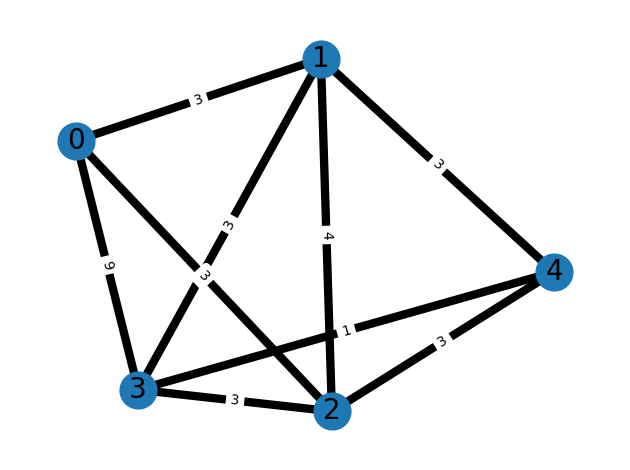

In [40]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility


# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()